```
Flores Aquino Luis Enrique
171564
```

# 0 INSTALACION
Instalamos las librerias y evtamos los warnings

In [3]:
import warnings
warnings.simplefilter(action="ignore")
# conda install -c conda-forge sweetviz 
#!pip install sweetviz
#!pip install sweetviz

# Análisis Exploratório de Datos con Python/Pandas

_Python_ es un lenguaje de programación de alto nivel que se puede utilizar para realizar varias tareas. En este curso utilizaremos _Python_ y algunas de sus librerías para realizar actividades prácticas relacionadas con la Minería de Datos.

Una distribución de _Python_ gratuita (para uso individual) que es fácil de instalar y mantener es [Anaconda](https://www.anaconda.com/products/individual).

Si no puede instalar _Python_ en su máquina, puede usar una versión en línea como [Google Colab](https://colab.research.google.com)

Hoy usaremos la biblioteca [_Pandas_](https://pandas.pydata.org/), que es una biblioteca de análisis y manipulación de datos de código abierto rápida, potente, flexible y fácil de usar.

# 1 DEPENDENCIAS

In [2]:
import pandas as pd # carregamento e manipulação de dados
import sweetviz as sv # ferramenta de análise exploratória
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import numpy as np # processamento matemático
from scipy.stats import norm # normal

# 2 LECTURA DE DATOS

Recuperamos los datos desde un link

In [4]:
data = pd.read_csv("http://vision.ime.usp.br/~fernando/nlp/data/Churn_Modelling.csv",index_col=0)

Vemos una muestra aleatoria de los datos - 20 en este caso

In [5]:
data.sample(20)

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
783          15654060     P'eng          517    France    Male   41       2   
6680         15722813     Byrne          470     Spain    Male   30       4   
8912         15781914   Simmons          718   Germany    Male   32       9   
4793         15809991   Ferrari          756     Spain    Male   19       4   
639          15588350  McIntyre          744    France  Female   43      10   
5657         15736769  Lucchesi          663    France  Female   27       9   
8403         15766683   Coombes          549   Germany    Male   36       6   
3168         15583137      Pope          637    France  Female   48       7   
8339         15792453      More          602     Spain  Female   42       1   
6059         15684868   Cameron          668   Germany    Male   56       9   
2227         15750808        Ma          790     Spain    Male   46       2   
6977         15785488    Palmer          701     Spain  Female   39       9   
5411         15723613   Jenkins          623    France  Female   28       4   
2319         15648005   Russell          672     Spain    Male   33       2   
8353         15641413  Crawford          587   Germany  Female   49       7   
8242         15592451  Lombardi          565    France    Male   32       9   
120          15600781        Wu          699   Germany    Male   34       4   
9318         15585249  Mironova          741    France    Male   42       6   
2739         15662098    Palmer          650     Spain    Male   41       3   
7344         15763194  Milanesi          643    France    Male   34       7   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
783             0.00              2          0               1   
6680       125385.01              1          1               0   
8912       169947.41              2          1               1   
4793       130274.22              1          1               1   
639        147832.15              1          0               1   
5657            0.00              2          1               0   
8403       139422.37              1          0               0   
3168       130806.99              2          1               1   
8339       138912.17              1          1               1   
6059       110993.79              1          1               0   
2227       131365.37              2          1               1   
6977            0.00              2          1               1   
5411            0.00              2          1               0   
2319            0.00              2          1               1   
8353       155393.98              2          1               0   
8242            0.00              2          1               0   
120        185173.81              2          1               0   
9318       106036.52              1          1               0   
2739       128808.65              3          0               0   
7344            0.00              2          0               1   

           EstimatedSalary  Exited  
RowNumber                           
783               75937.47       0  
6680              68293.93       0  
8912              27979.16       0  
4793             133535.29       0  
639               24234.11       0  
5657             150850.29       0  
8403              83983.39       1  
3168             132005.85       1  
8339             139494.75       0  
6059             134396.64       1  
2227             180290.68       0  
6977             110043.88       0  
5411              41227.67       0  
2319             182738.00       0  
8353              13308.20       1  
8242               5388.30       0  
120              120834.48       0  
9318             194686.78       1  
2739             113677.53       1  
7344             100304.13       0

Y la información básica del dataset

El cual cuenta con 12 columnas de las cuales 10 son numéricas, aunque esto debe ser re-analizado ya que hay variables booleanas siendo contadas como numéricas, sea el caso de las columnas HasCrCard, IsActiveMember, Exited

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Pasaremos a ver la distribución de su CreditStore y analizarlo en base a su media, mediana y moda

# 3 Análisis de una columna

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

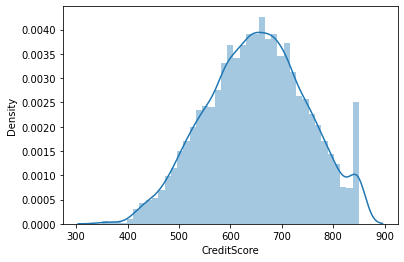

In [8]:
CreditScore = data['CreditScore']

sns.distplot(CreditScore)

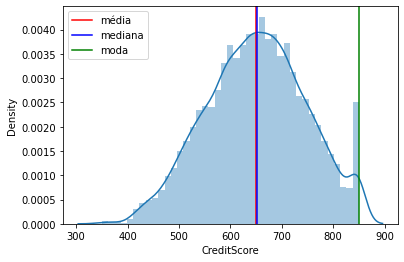

In [9]:
sns.distplot(CreditScore)
mean=CreditScore.mean()
median=CreditScore.median()
mode=CreditScore.mode()

plt.axvline(mean,color='r',label='média')
plt.axvline(median,color='b',label='mediana')
plt.axvline(mode[0],color='g',label='moda')
plt.legend()

Apreciamos una distribución no uniforme con tendencia a los 650, sin embargo; vemos que la moda se aproxima hacia el valor máximo, habría que analizar porque ese valor tiene un pico tan pronunciado

---



Comparando el kernel que obtenemos con una distribución normal, vemos que este se aproxima demasiado. Sin embargo; el pico que tenemos en la recta final es totalmente anómalo

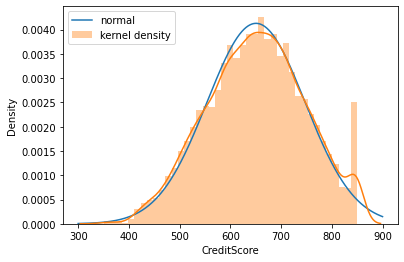

In [10]:
x = np.arange(300, 900, 0.1) # entire range of x, both in and out of spec

mean = CreditScore.mean() # según el principio de máxima verosimilitud, la media muestral es el mejor estimador de la media
stddev = CreditScore.std()

y = norm.pdf(x, mean, stddev)

plt.plot(x,y,label='normal')
sns.distplot(CreditScore,label='kernel density')
plt.legend()

Aplicando diagrama de cajas

In [11]:
Q1 = CreditScore.quantile(q=0.25)
Q2 = CreditScore.quantile(q=0.5)
Q3 = CreditScore.quantile(q=0.75)
IQR = Q3 - Q1
LI = max(Q1 - 1.5 * IQR, CreditScore.min()) 
LU = min(Q3 + 1.5 * IQR, CreditScore.max())

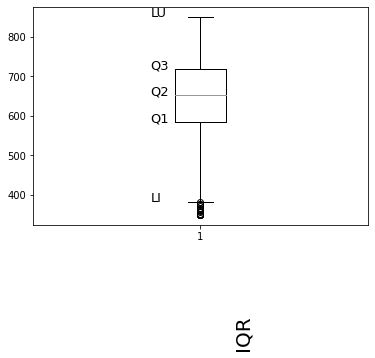

In [12]:
plt.boxplot(CreditScore)
plt.text(0.85,Q1,s='Q1',size=13)
plt.text(0.85,Q2,s='Q2',size=13)
plt.text(0.85,Q3,s='Q3',size=13)
plt.text(0.85,LI,s='LI',size=13)
plt.text(0.85,LU,s='LU',size=13)
plt.text(1.1,16,s='IQR',rotation=90,size=20)
plt.show()

## Herramientas para agilizar el proceso

Calcular estadísticas manualmente invocando funciones y creando gráficos puede resultar bastante engorroso. Varias herramientas son capaces de generar informes estandarizados para análisis de datos exploratorios. Uno de ellos es `sweetviz`. 

# 4 Utilización de [sweetviz](https://pypi.org/project/sweetviz/) para agilizar la visualización y análisis de los daots

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



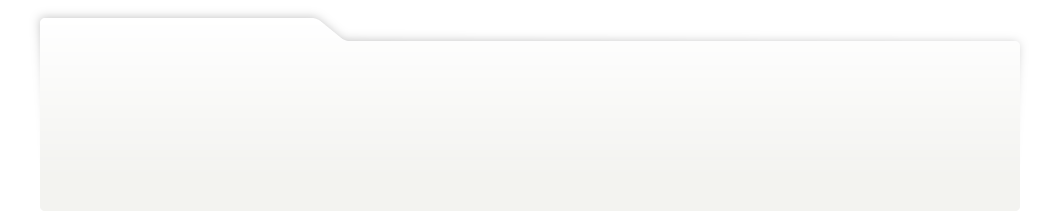
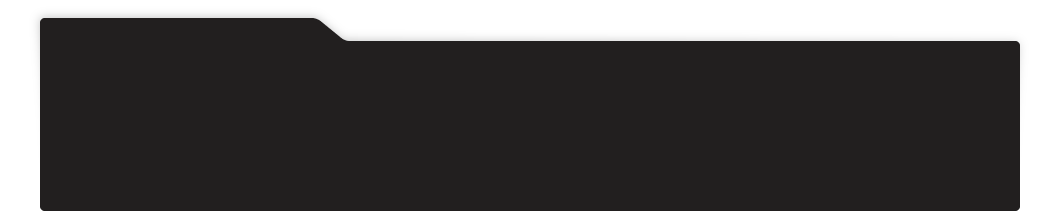
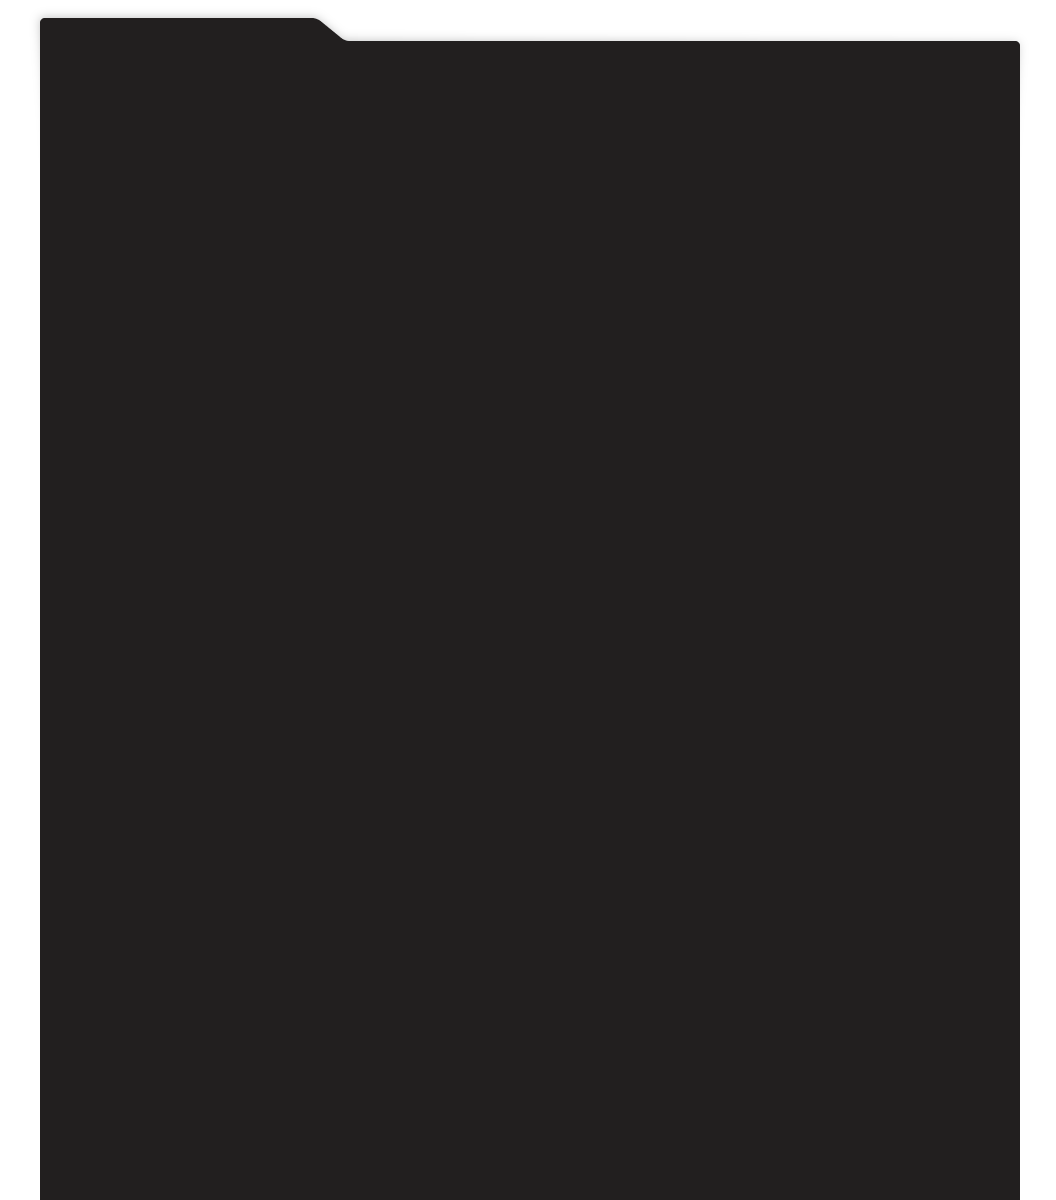
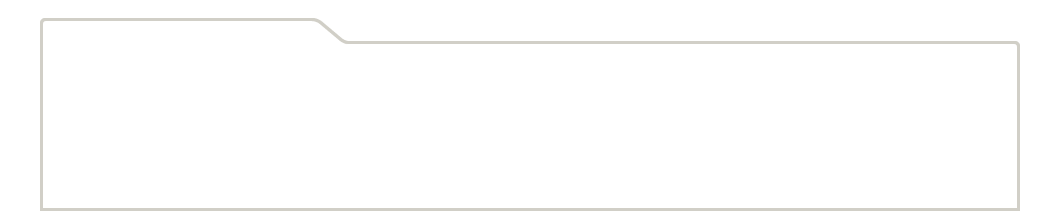
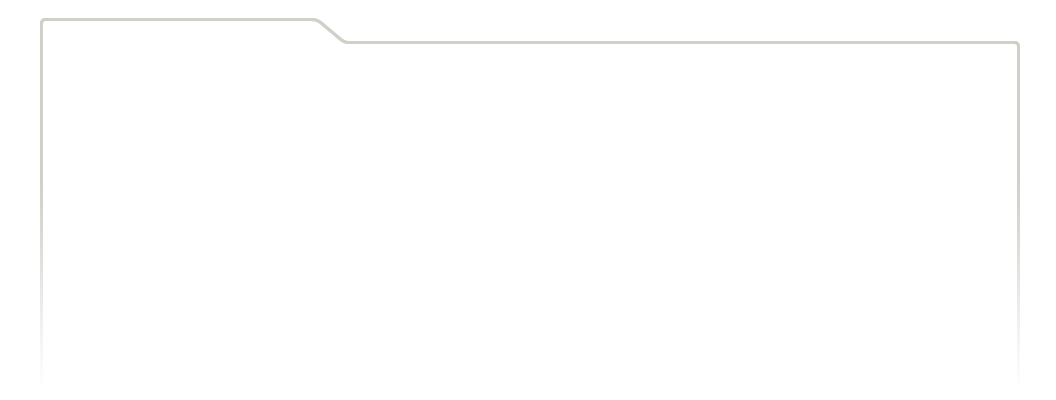
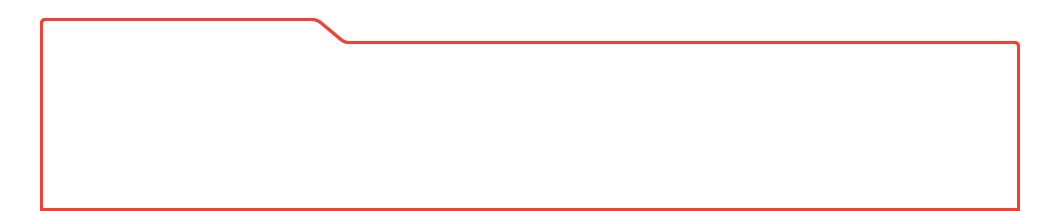
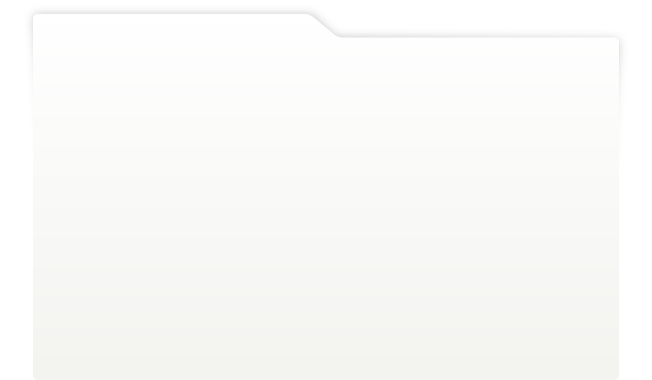
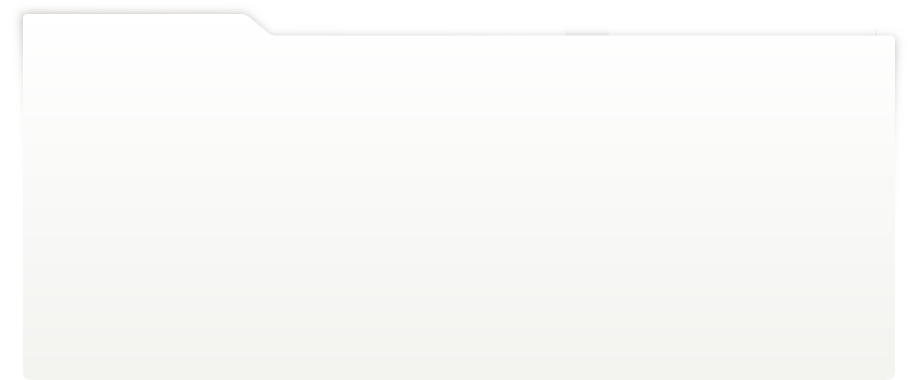
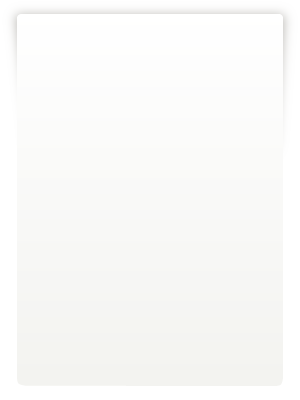
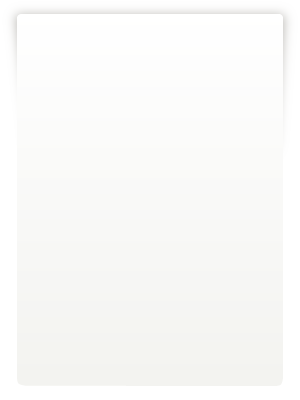
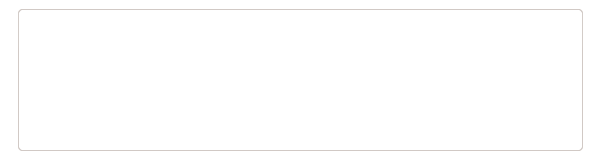
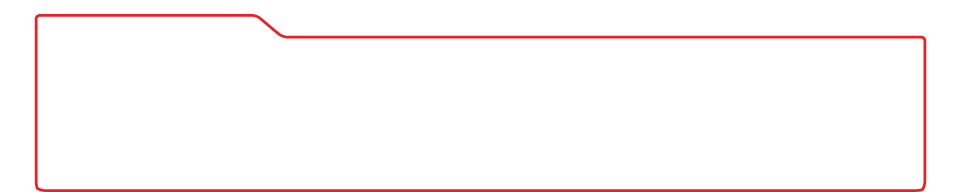
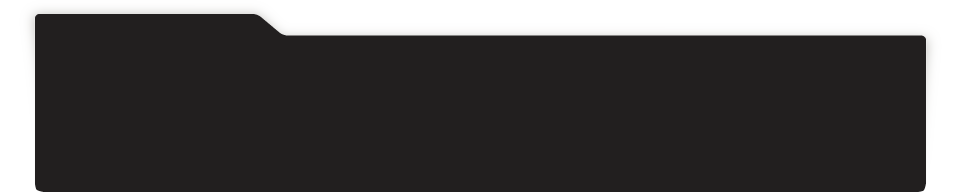
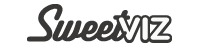
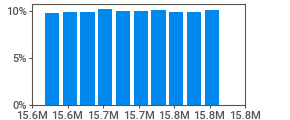
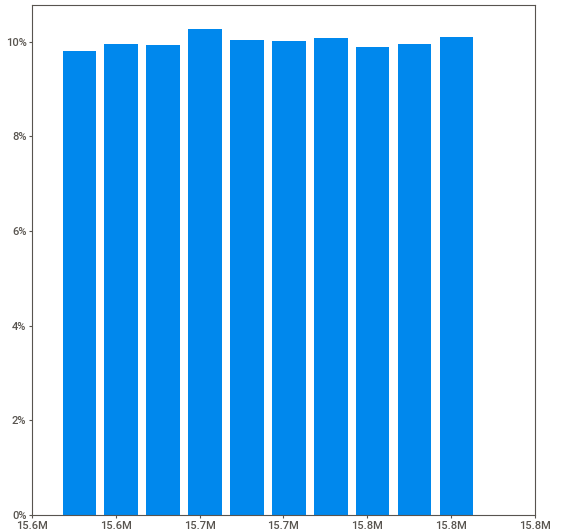
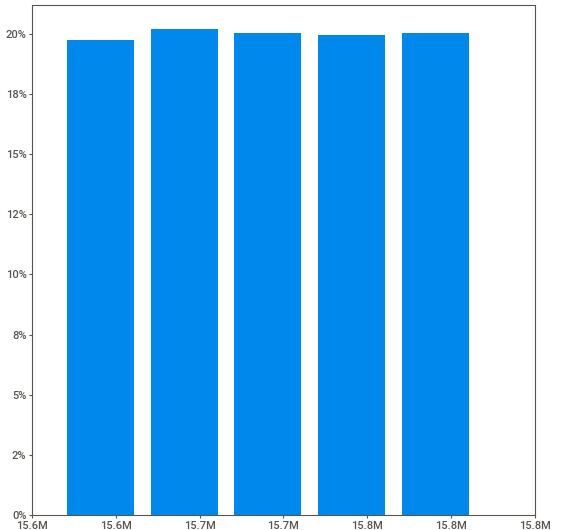
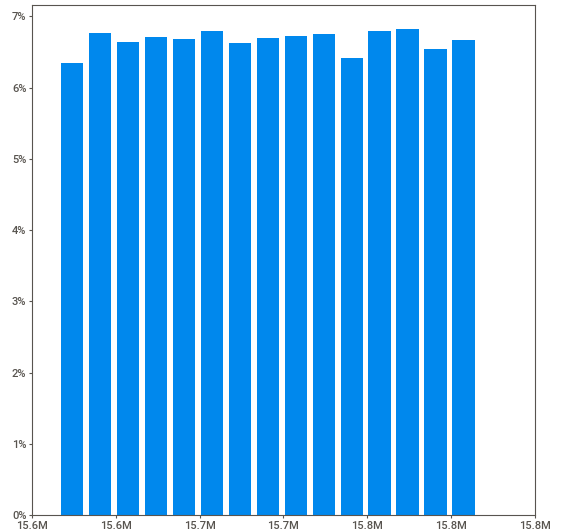
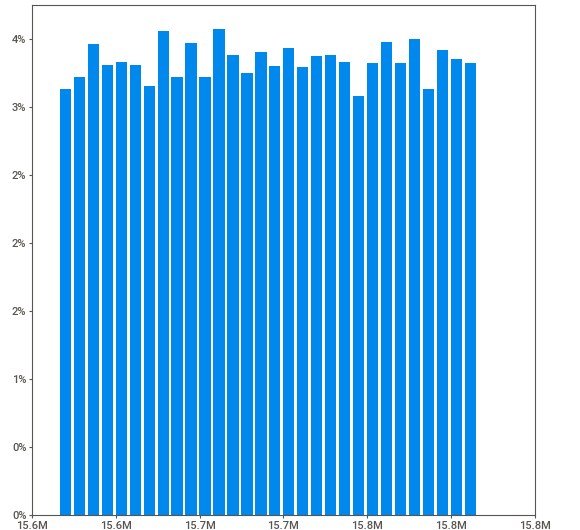
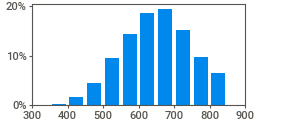
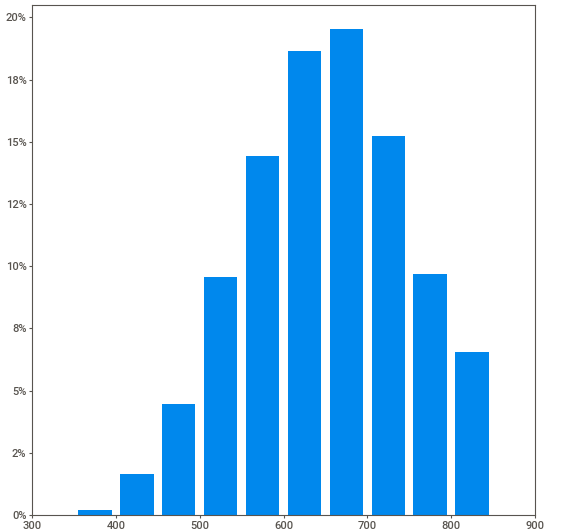
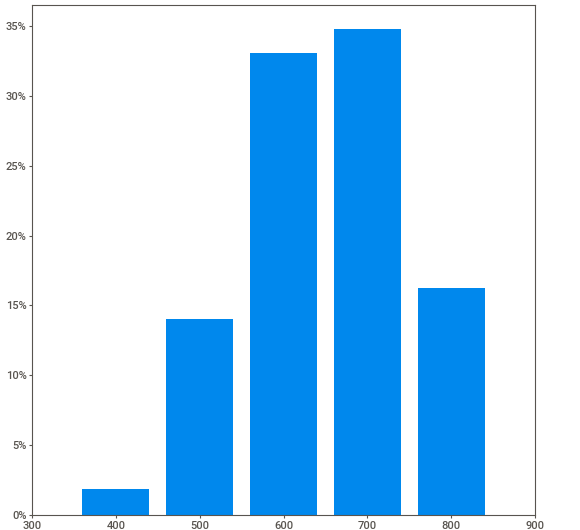
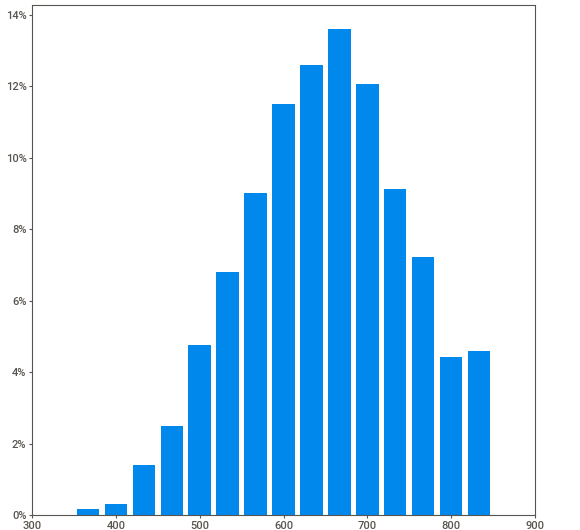
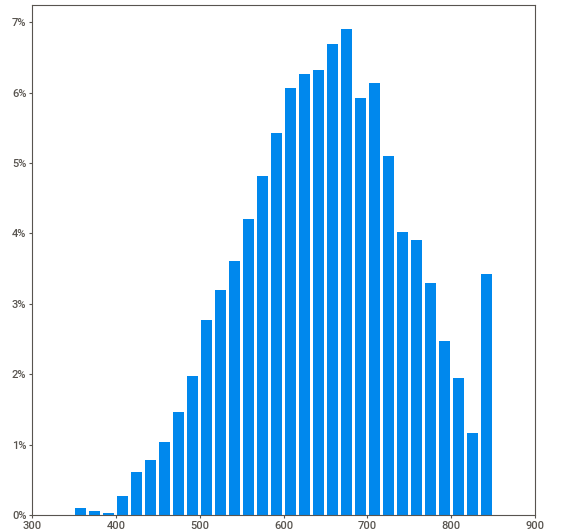
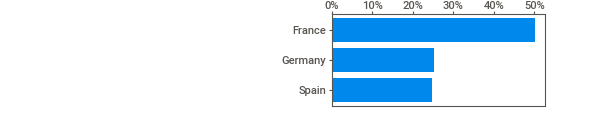
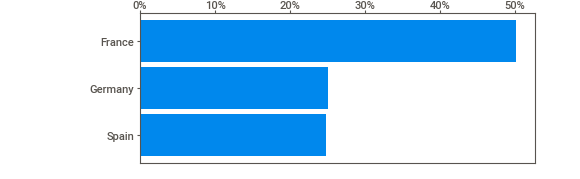
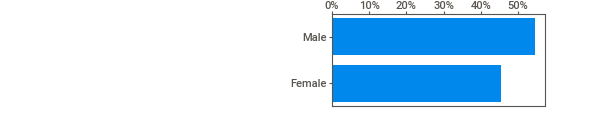
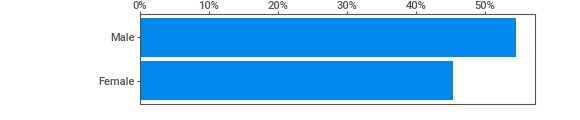
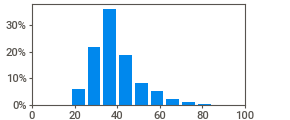
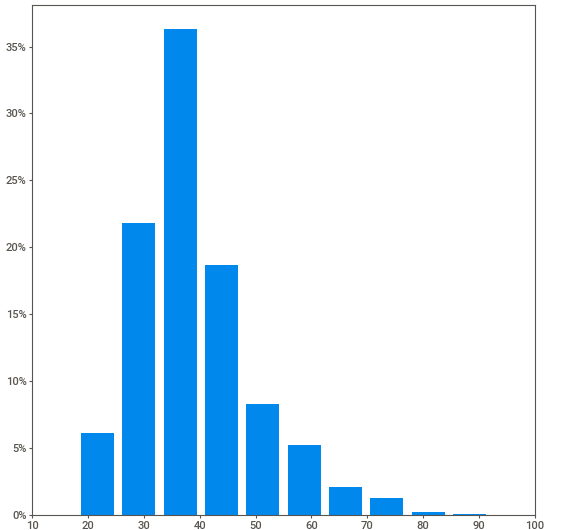
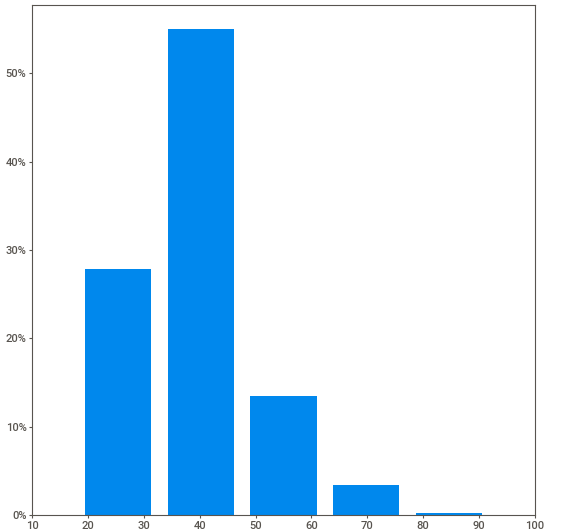
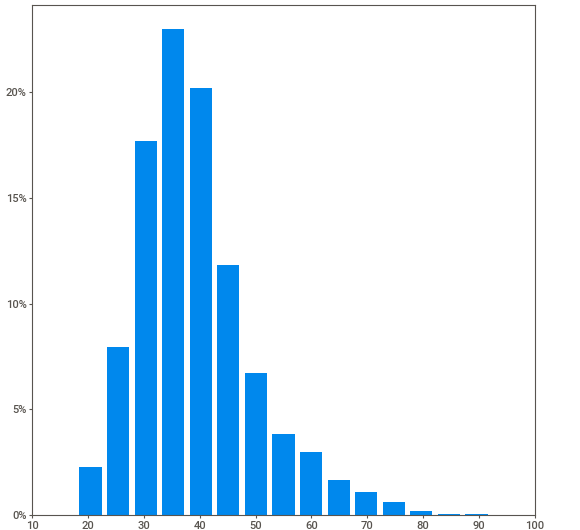
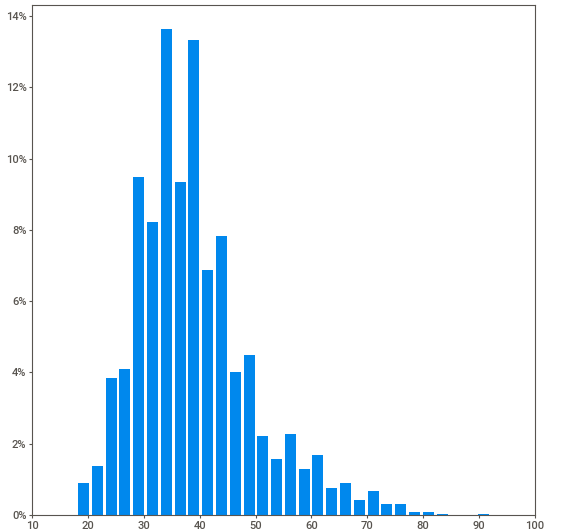
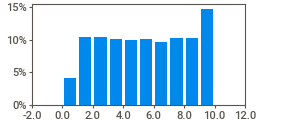
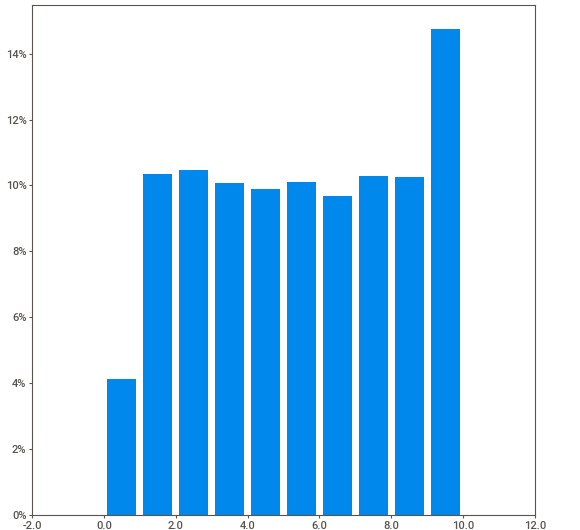
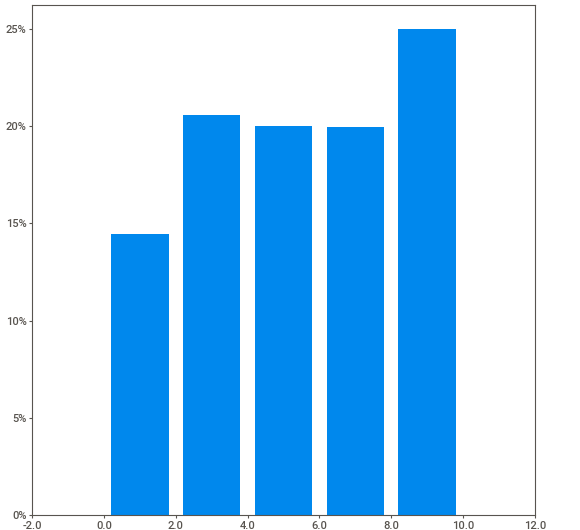
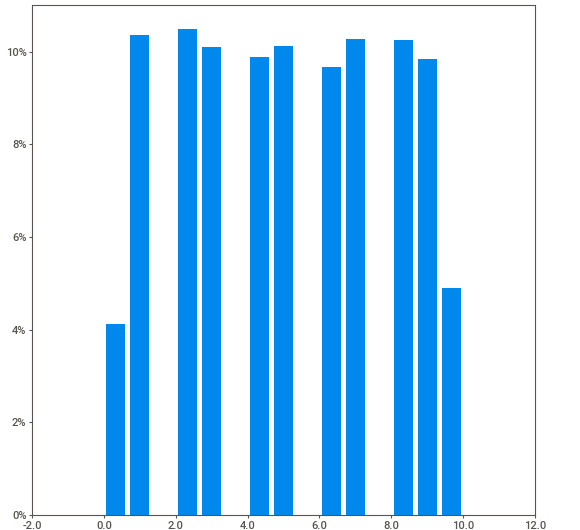
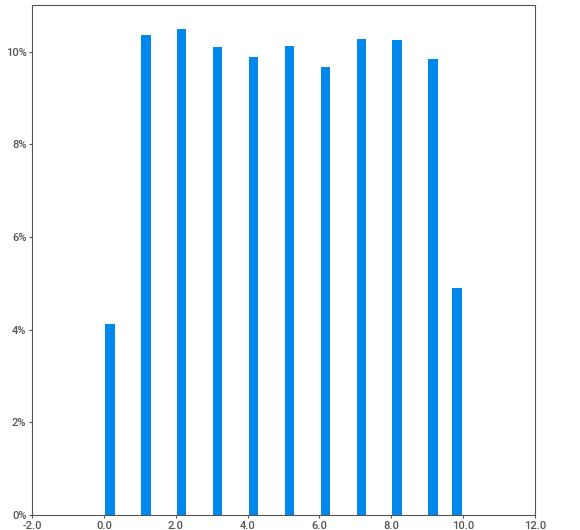
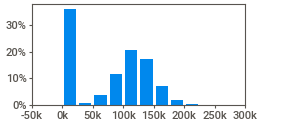
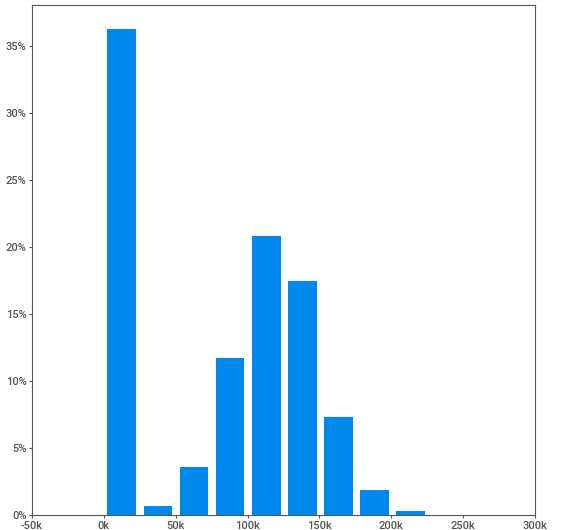
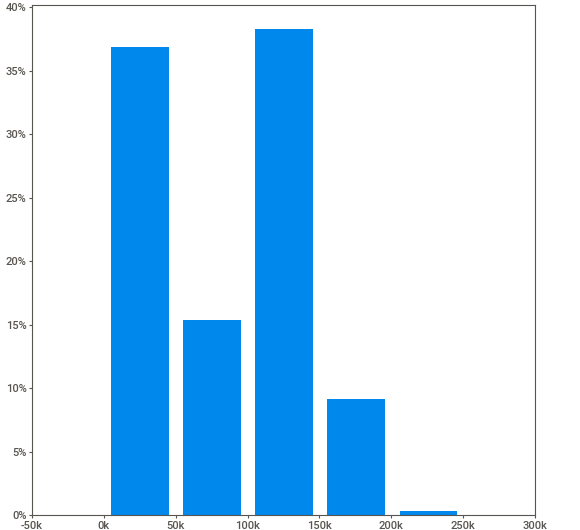
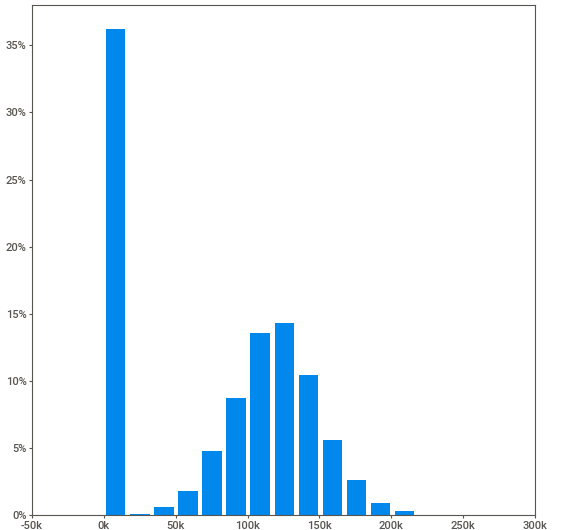
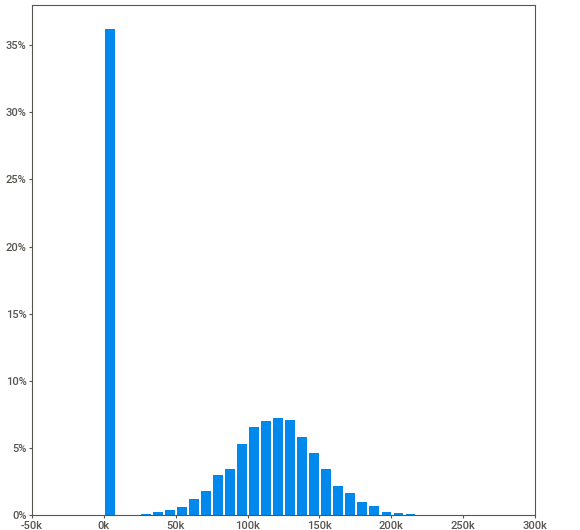
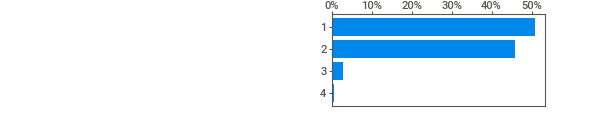
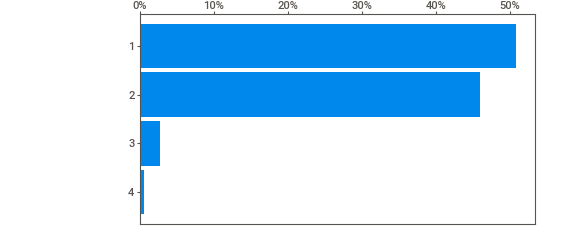
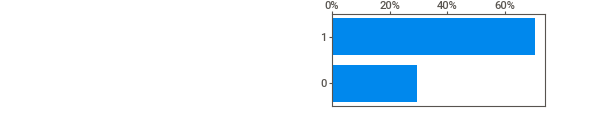
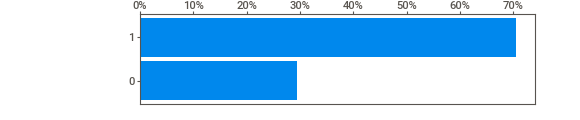
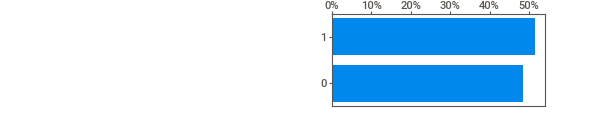
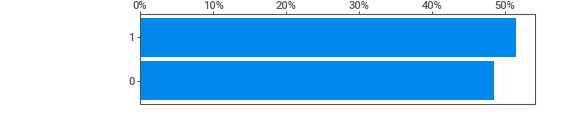
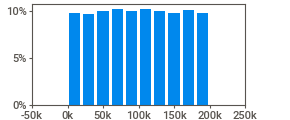
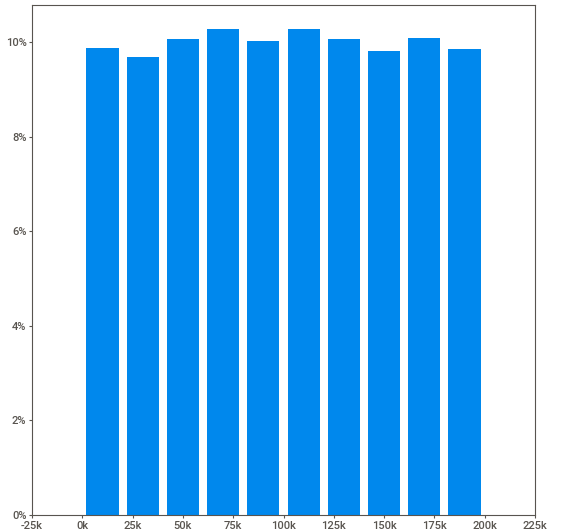
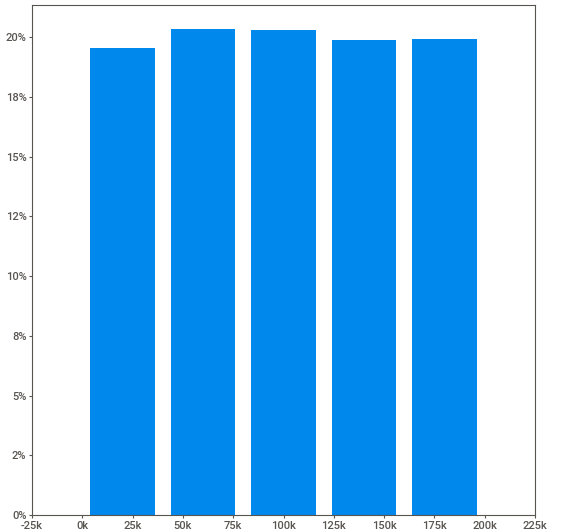
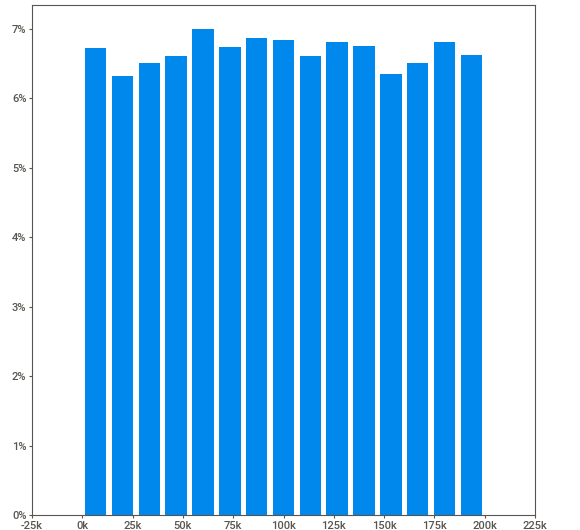
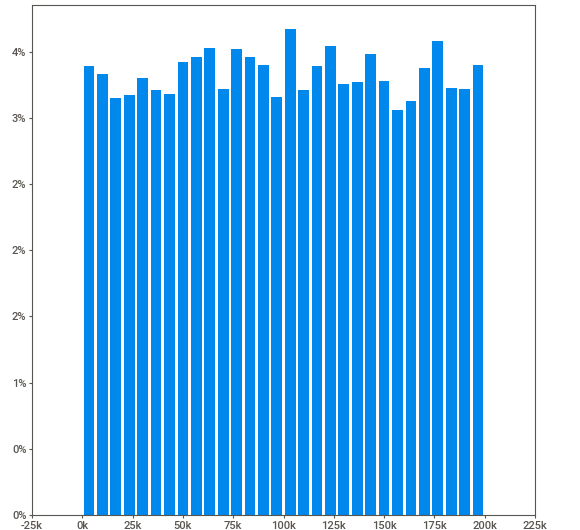
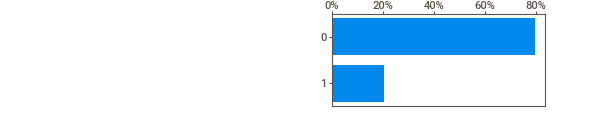
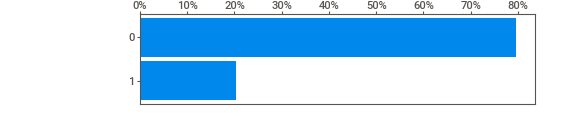
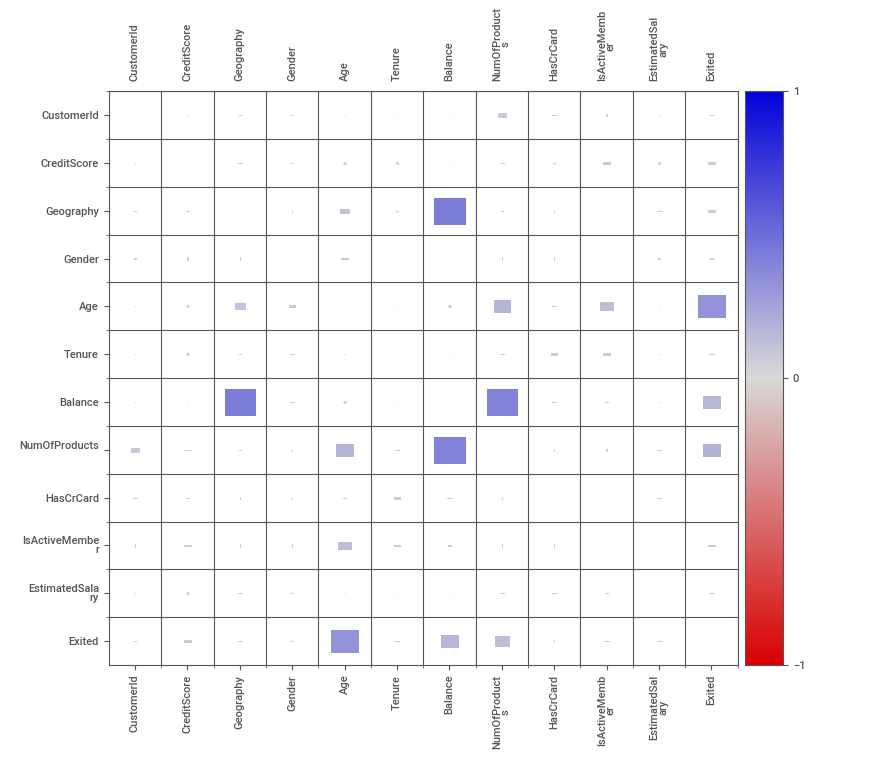
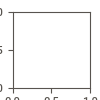

In [13]:
report = sv.analyze(data)
report.show_notebook()

## 4.1 Comparación en base a género

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



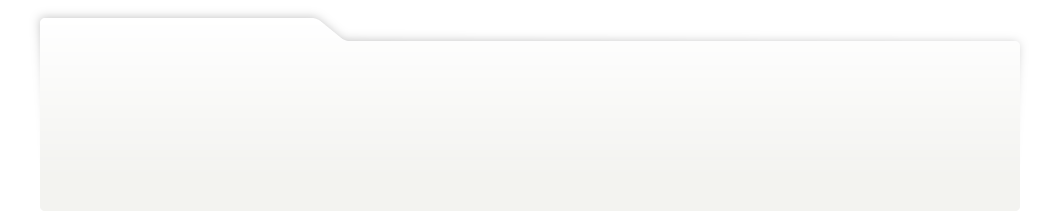
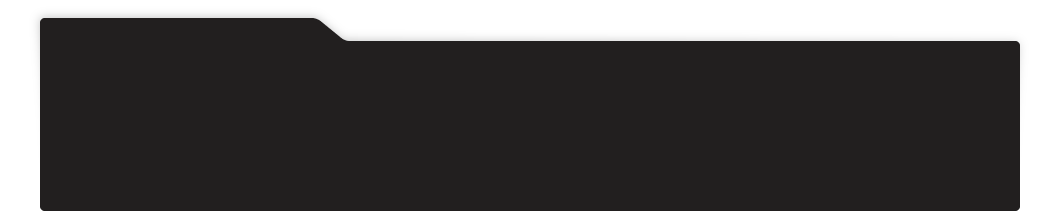
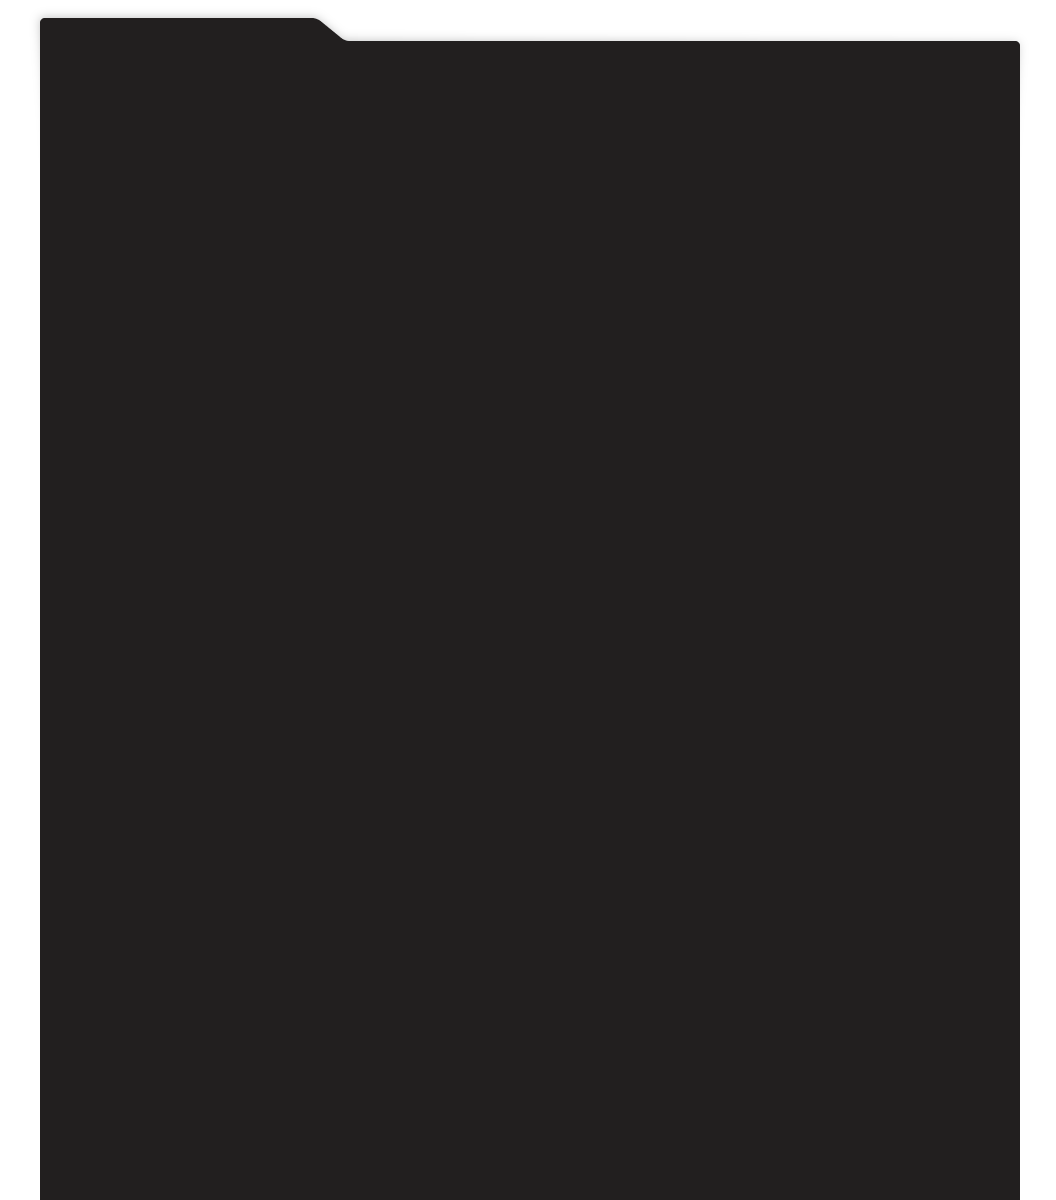
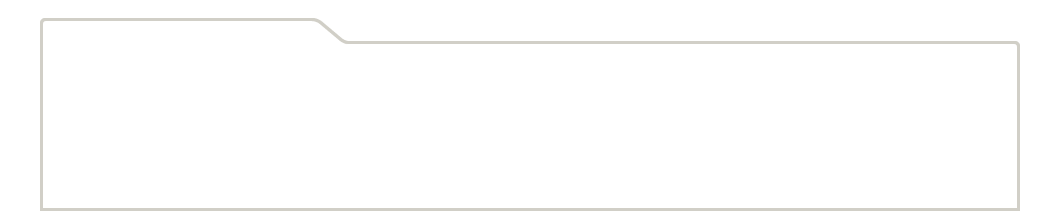
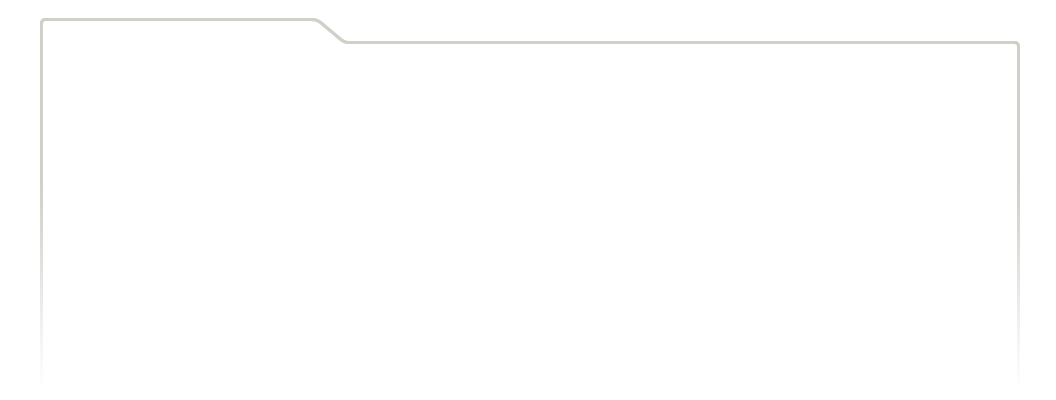
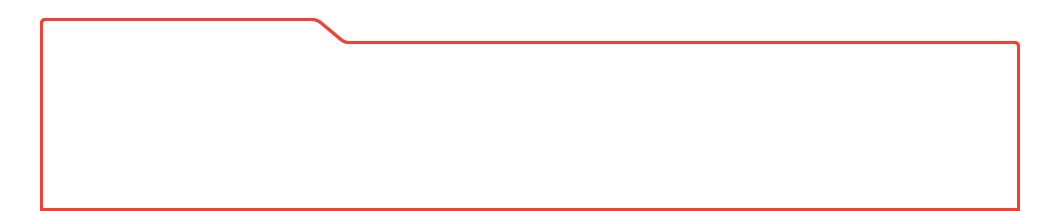
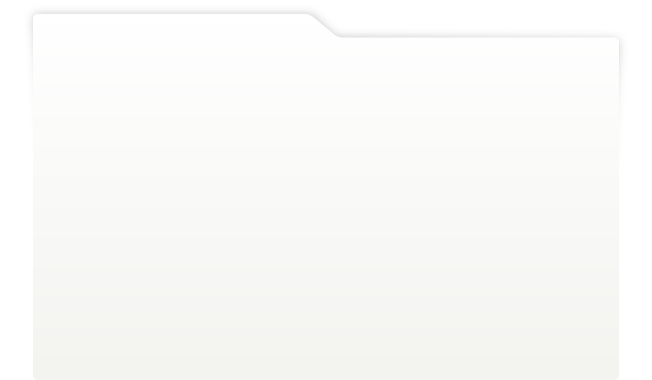
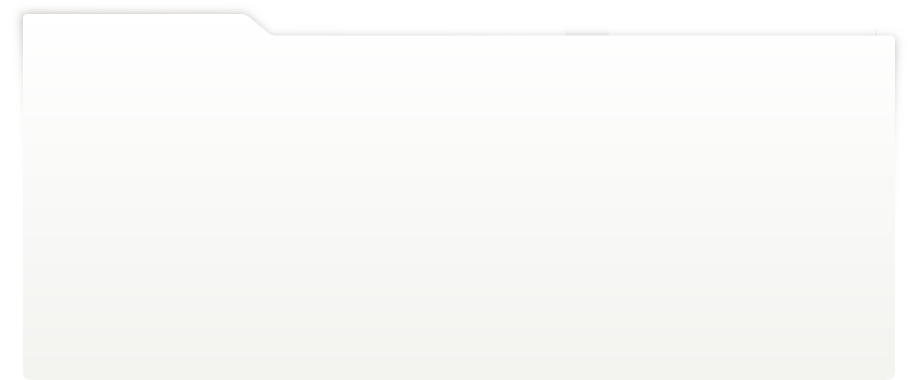
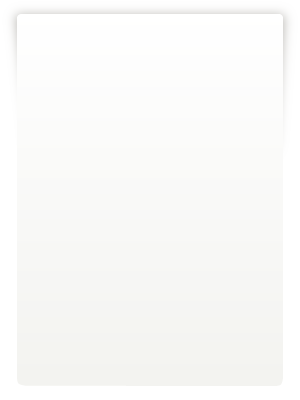
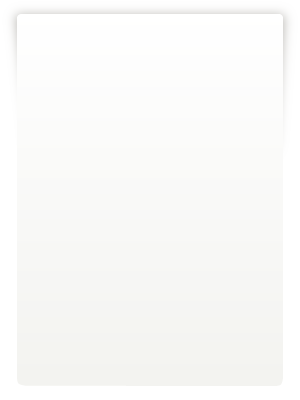
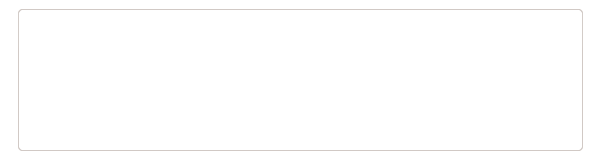
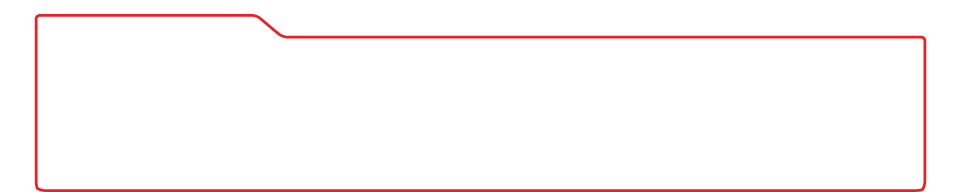
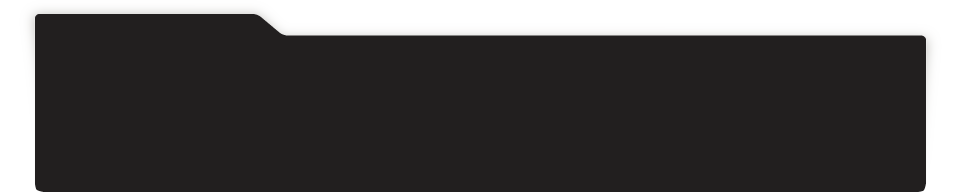
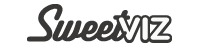
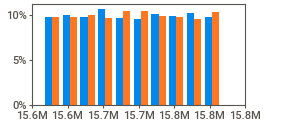
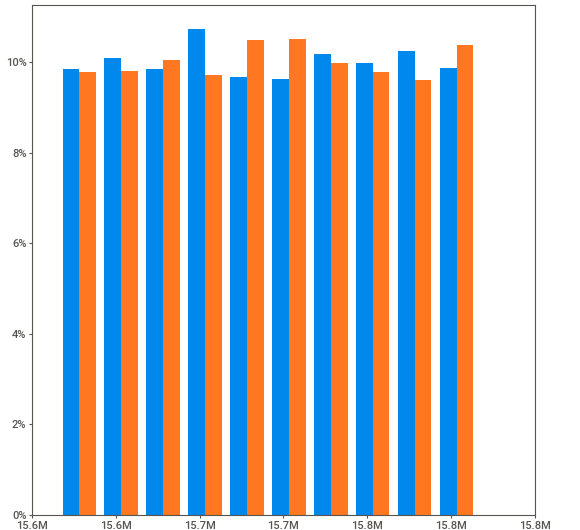
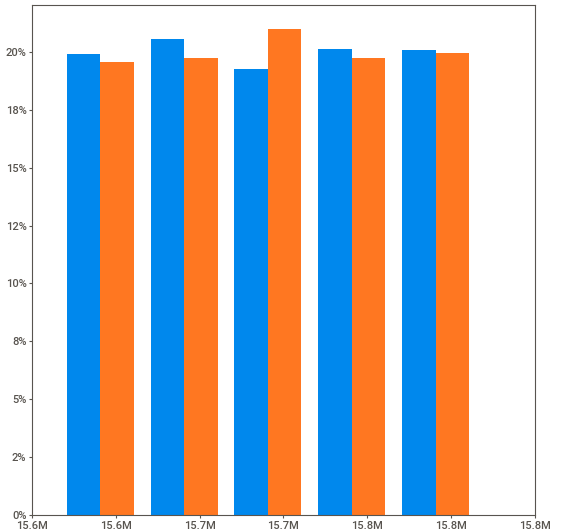
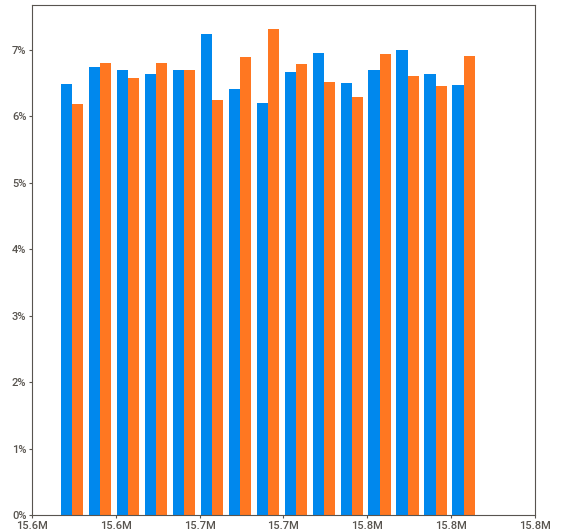
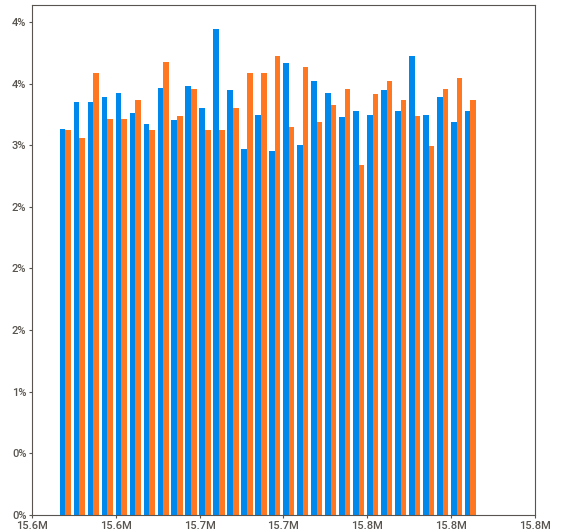
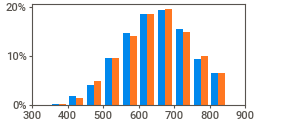
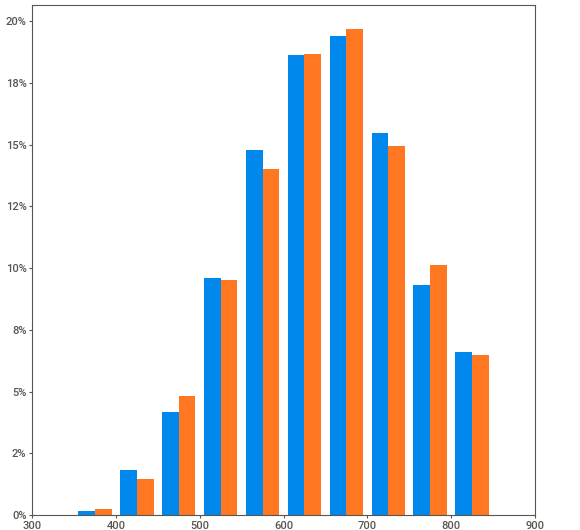
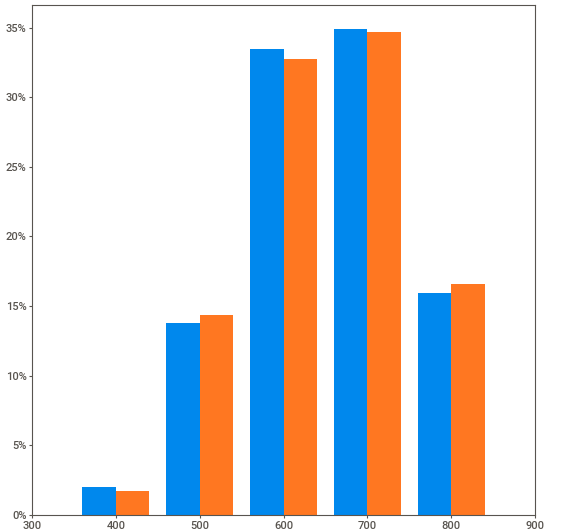
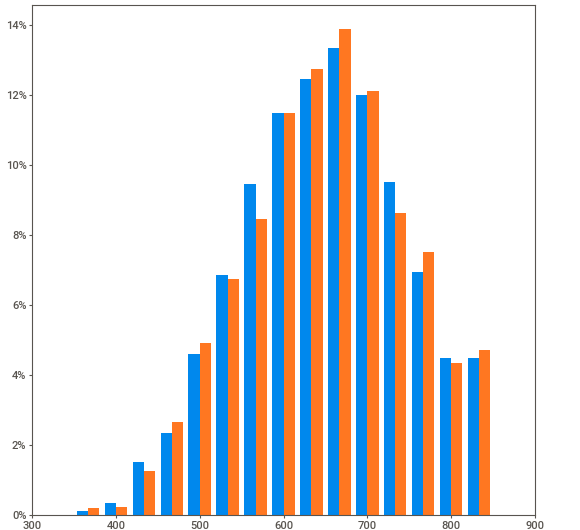
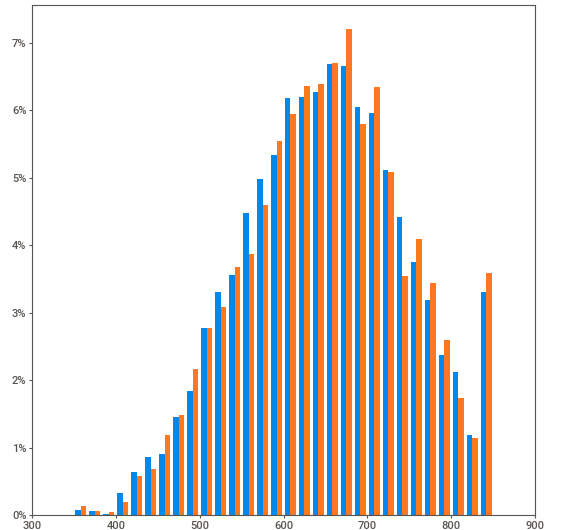
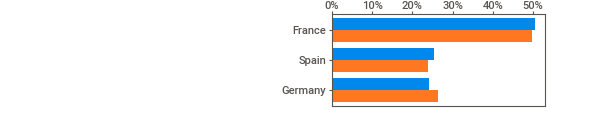
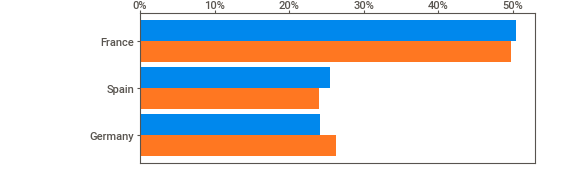
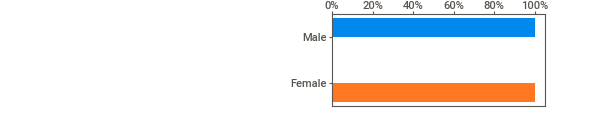
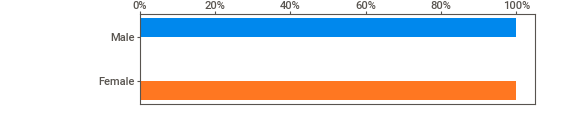
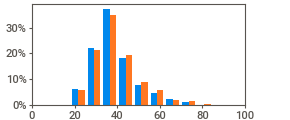
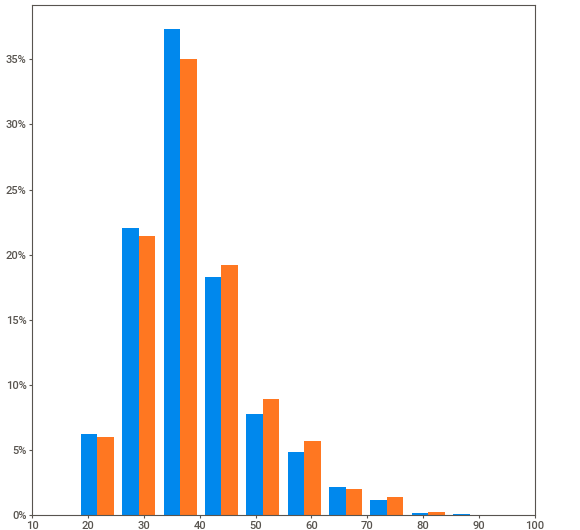
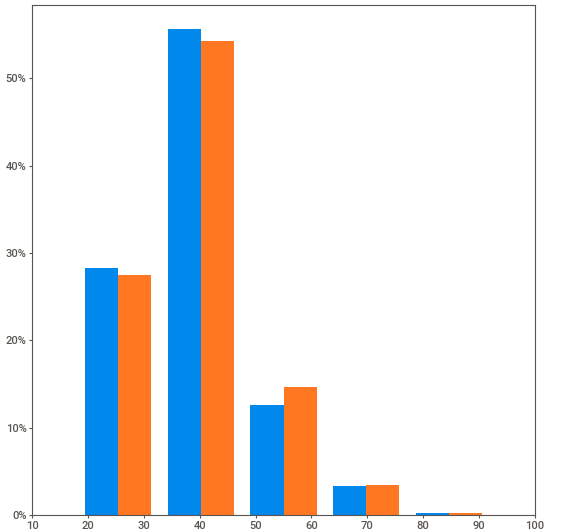
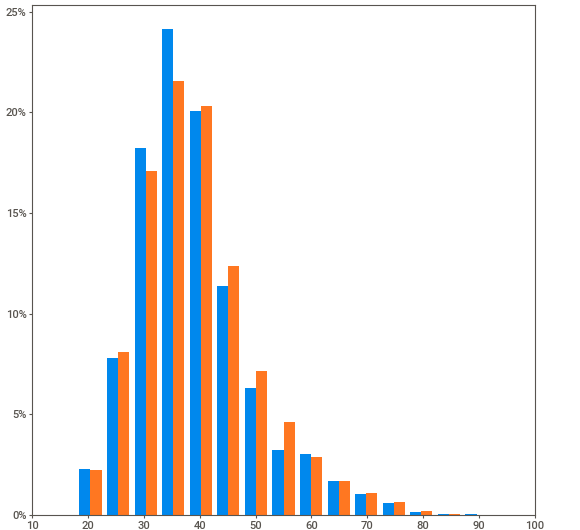
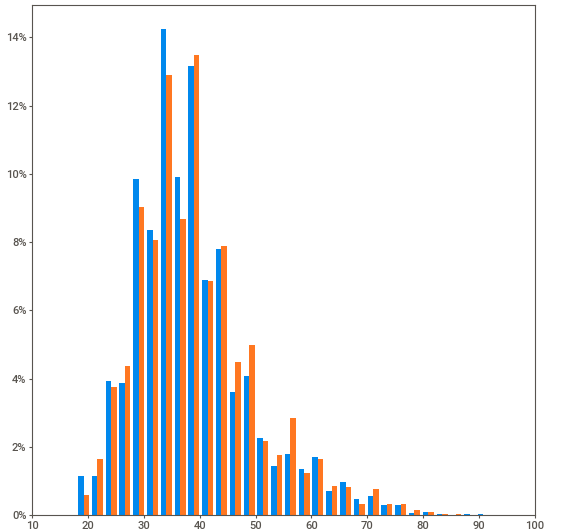
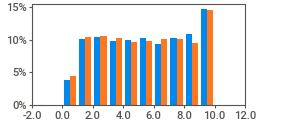
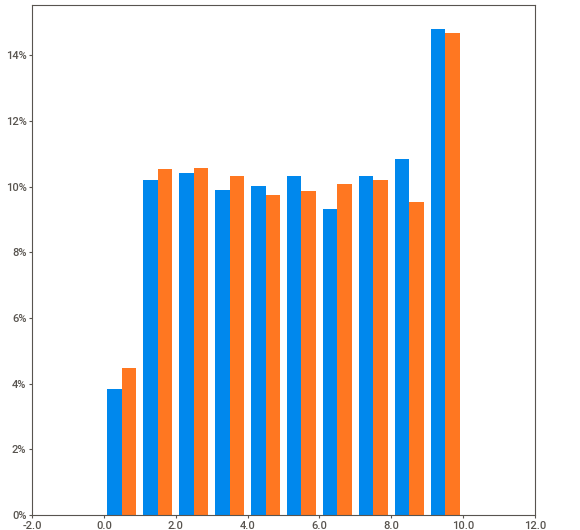
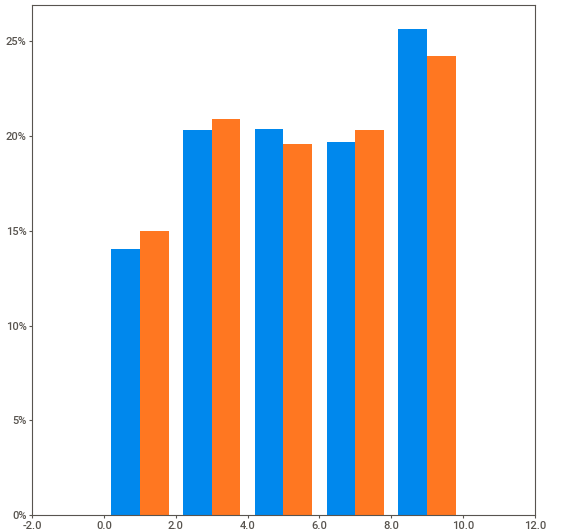
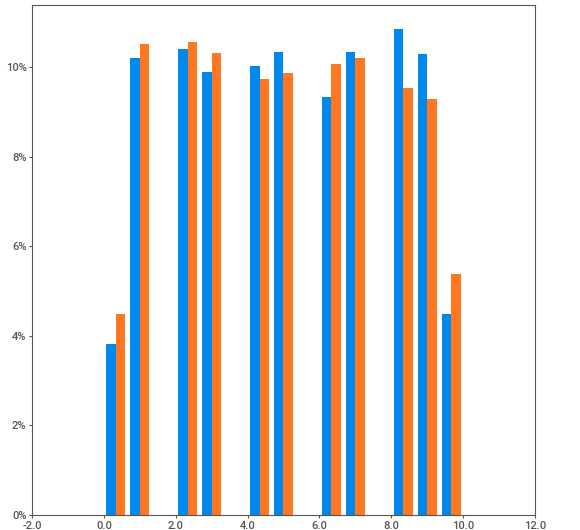
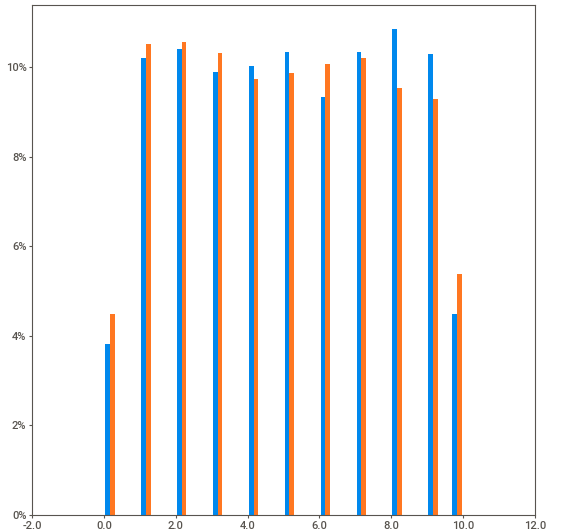
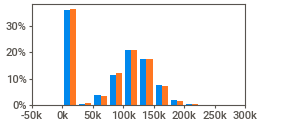
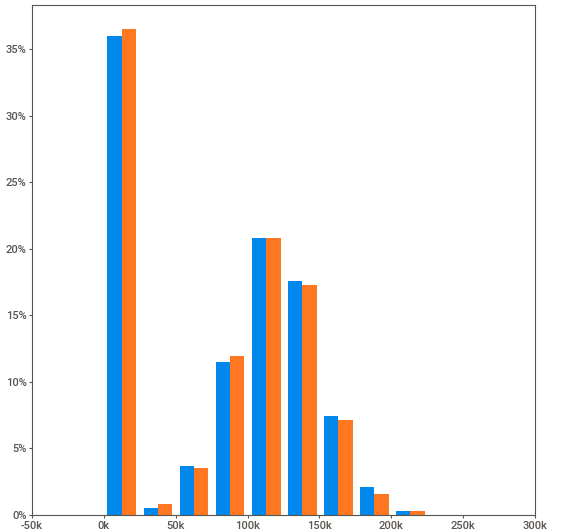
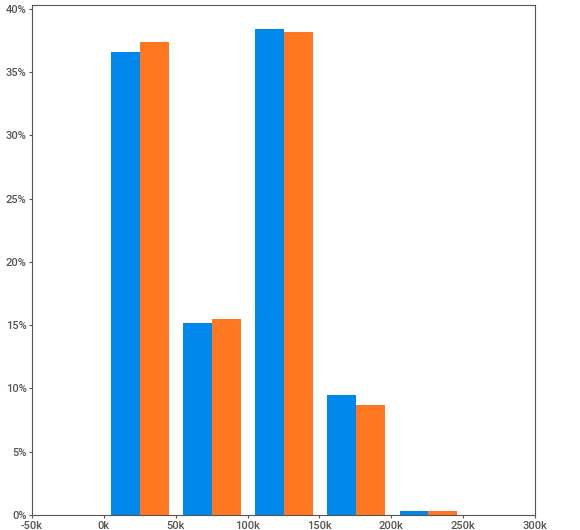
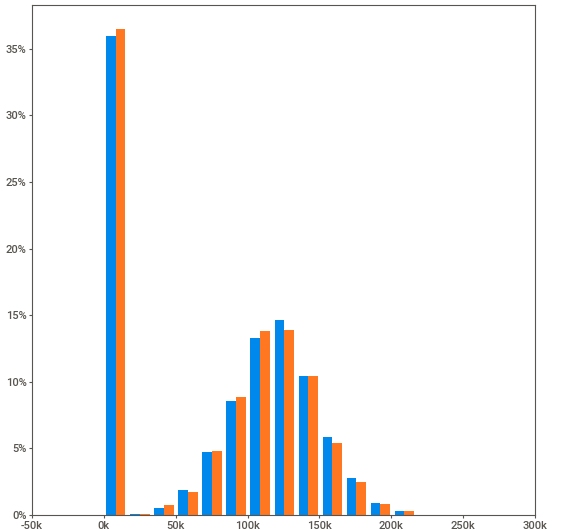
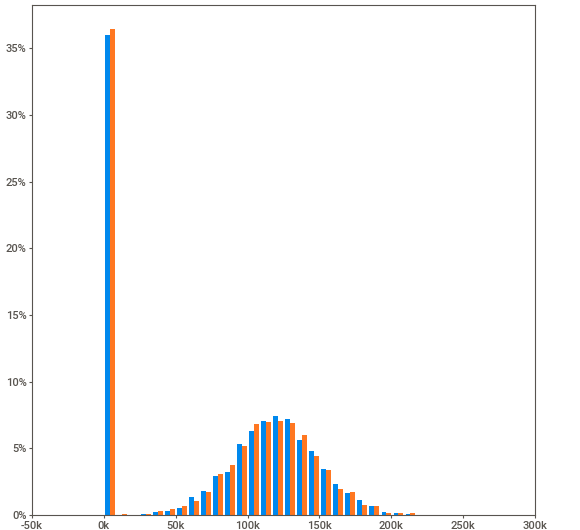
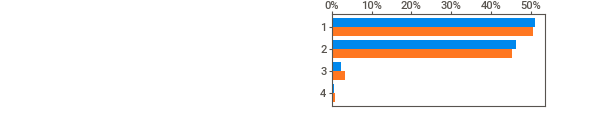
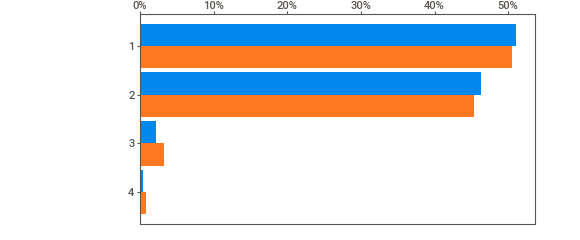
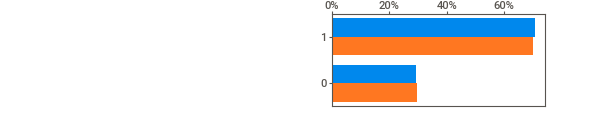
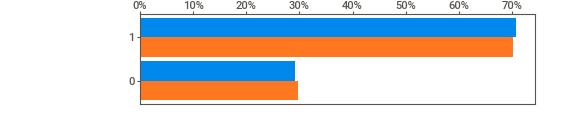
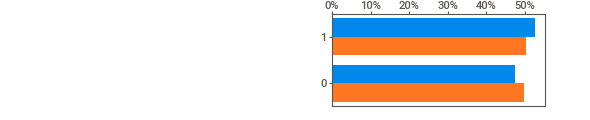
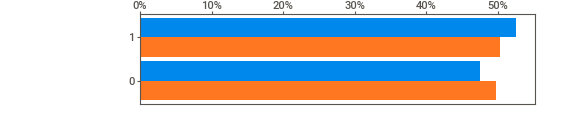
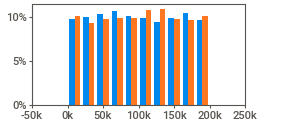
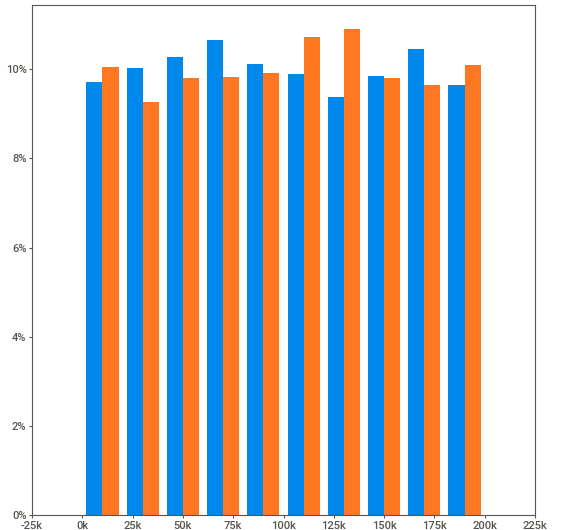
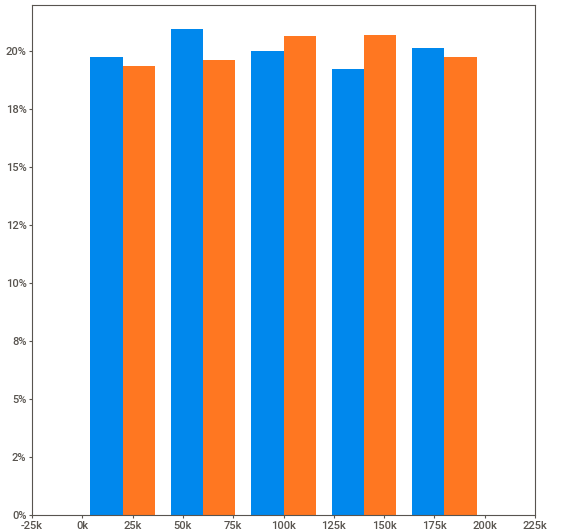
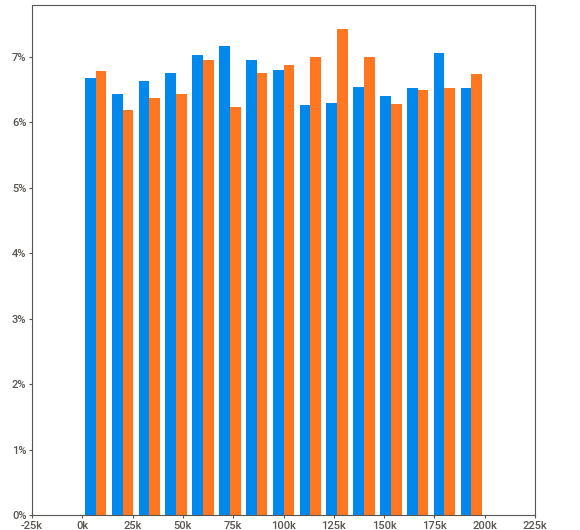
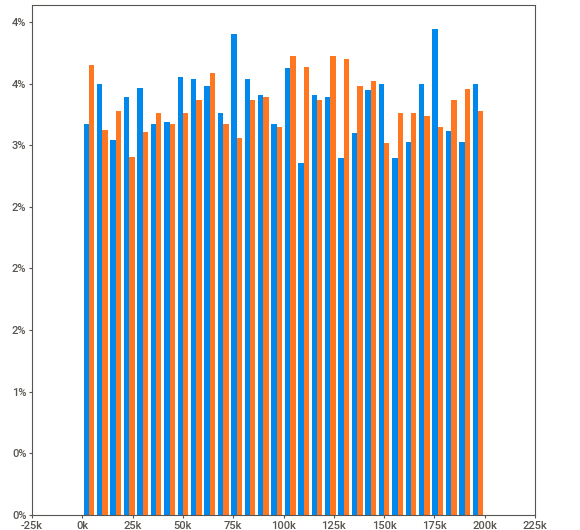
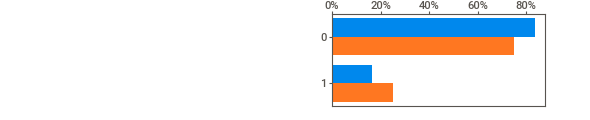
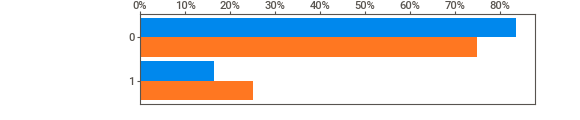
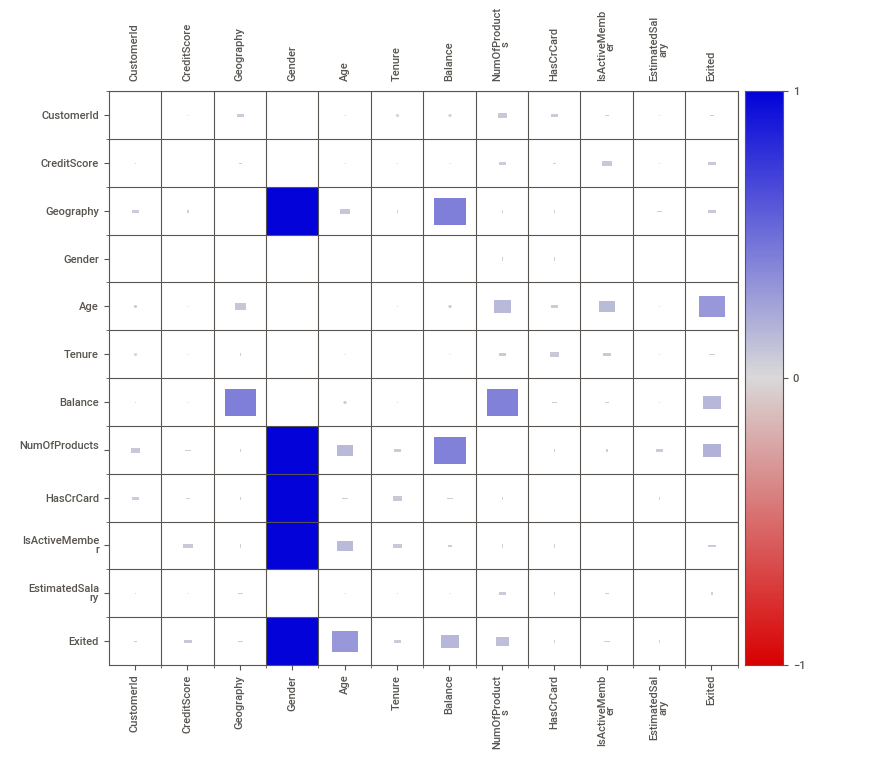
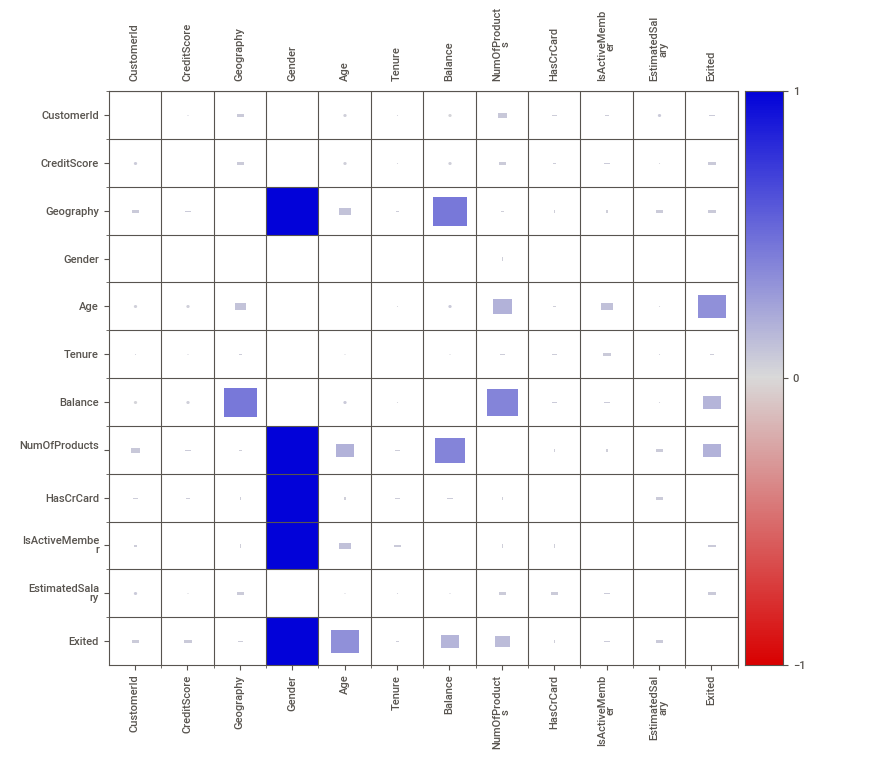

In [14]:
report = sv.compare_intra(data,data["Gender"] == "Male",["Male","Female"])
report.show_notebook() 

## 4.2 Comparando los usuarios Franceses con el resto (Aleman-Español)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



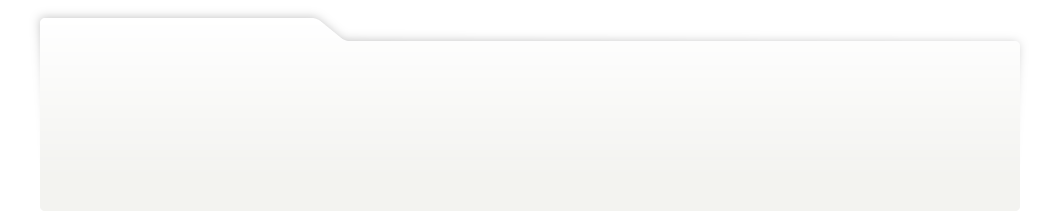
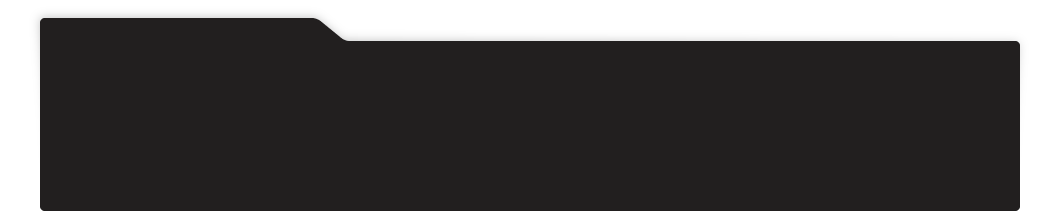
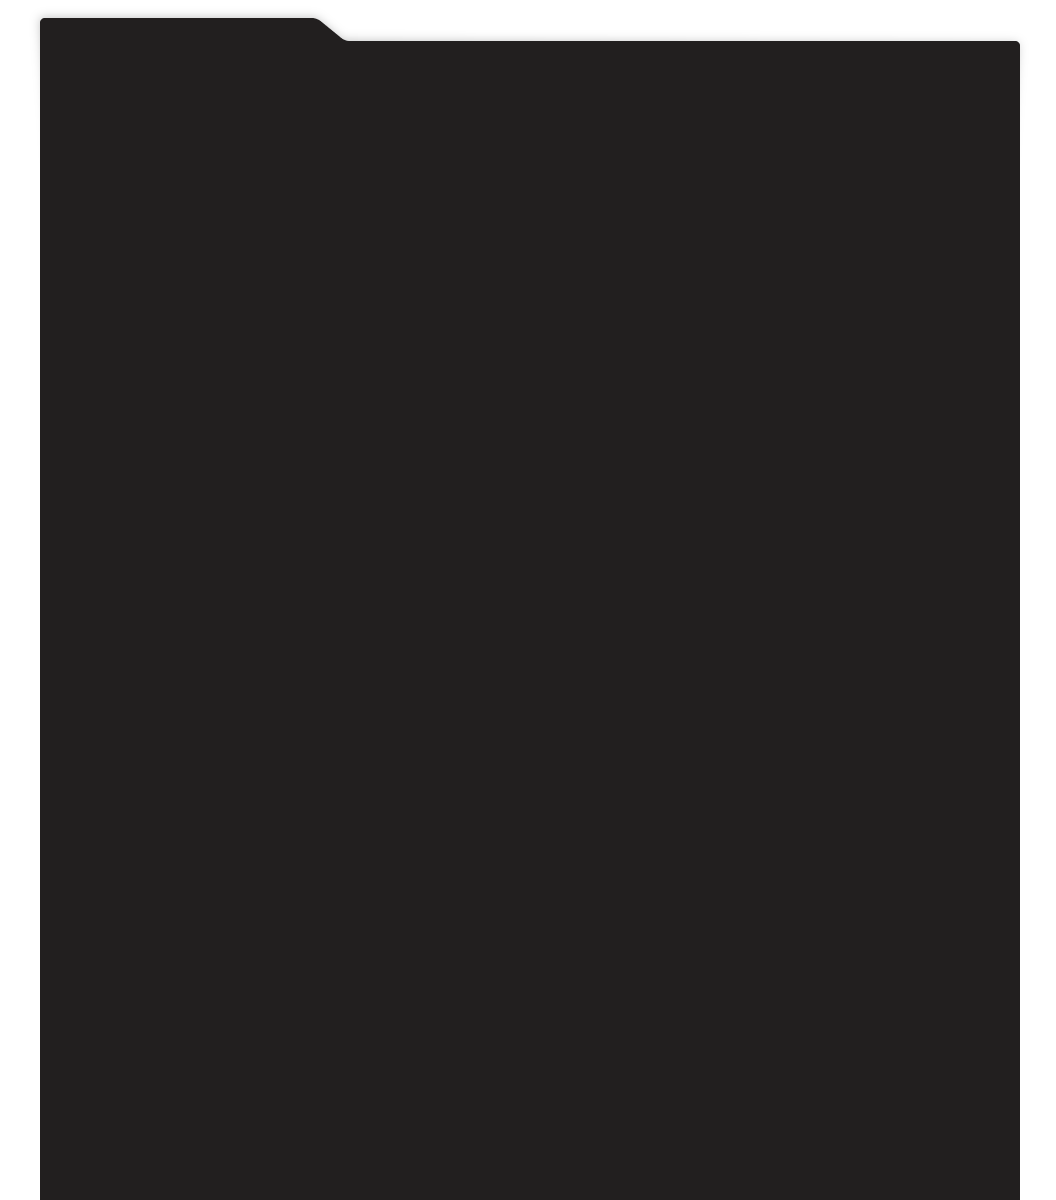
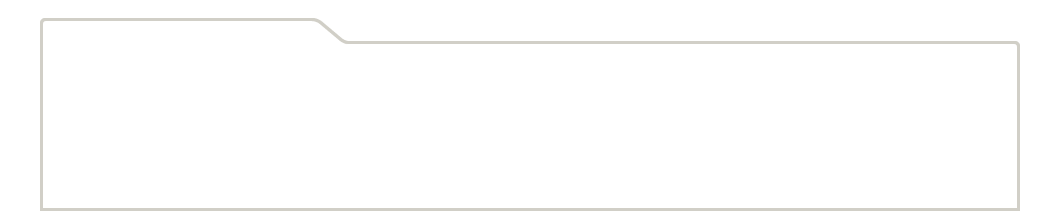
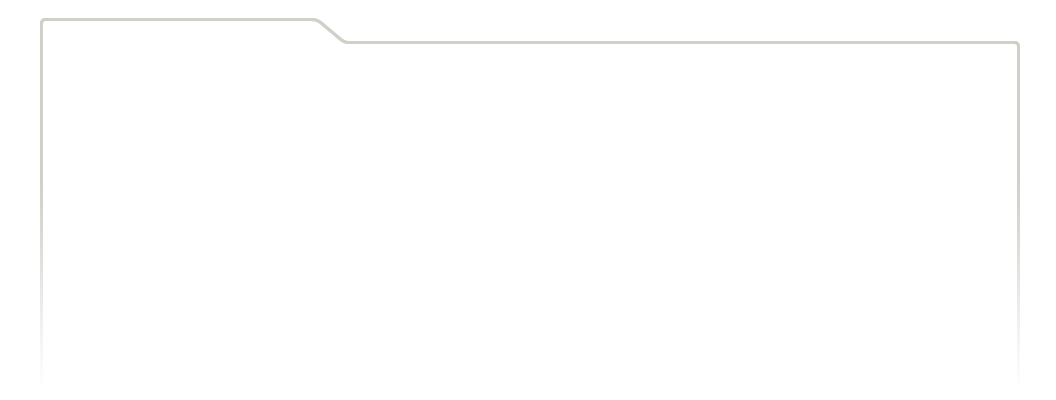
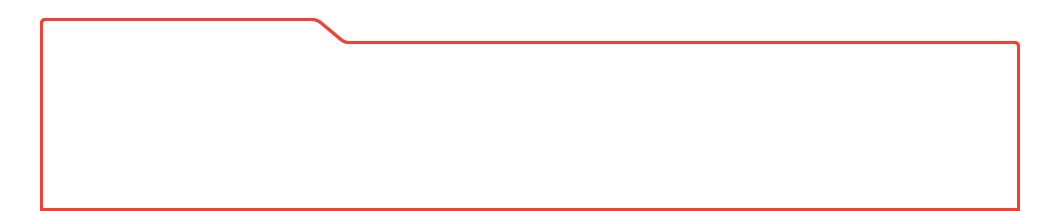
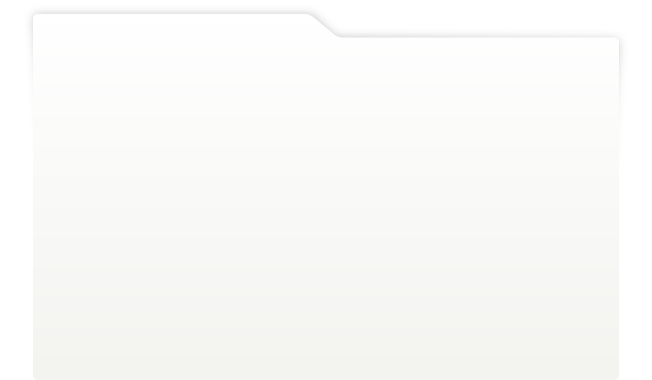
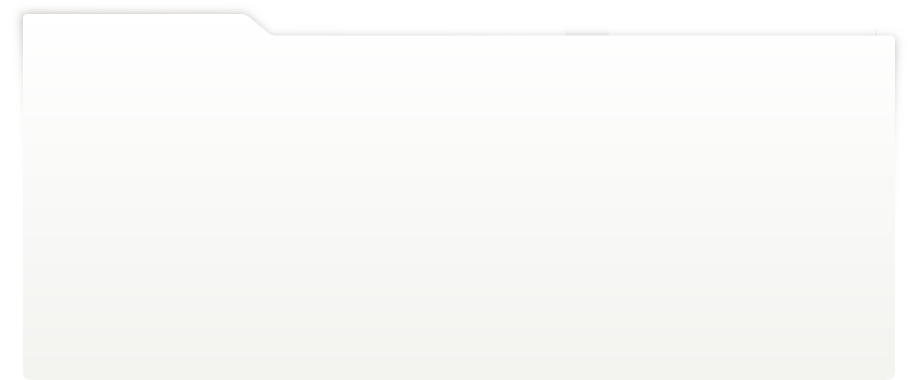
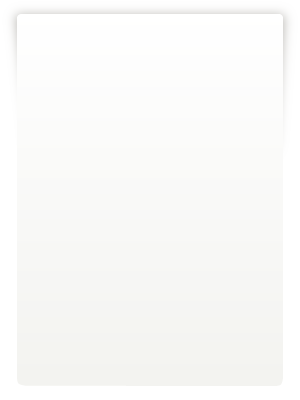
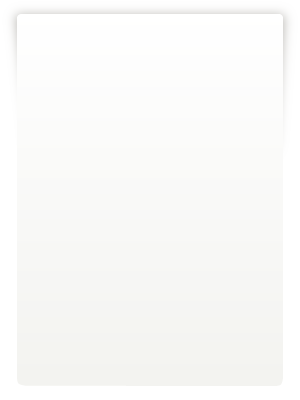
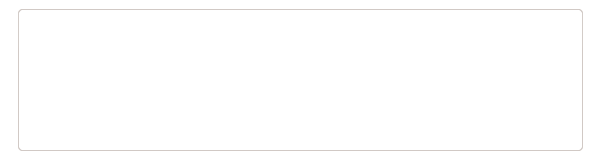
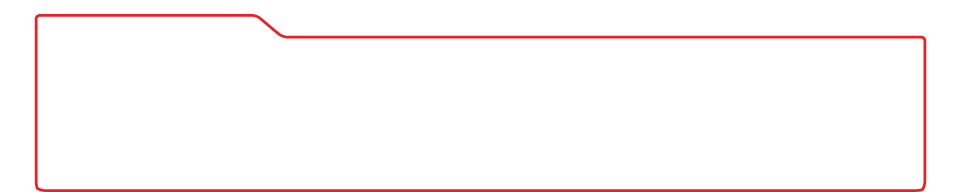
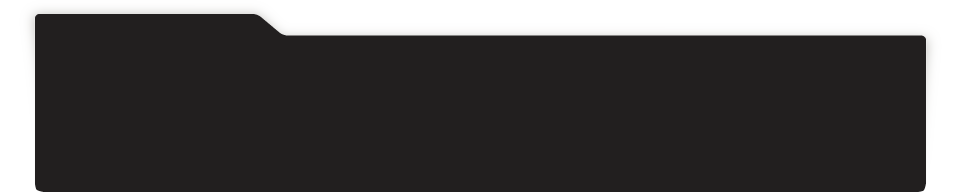
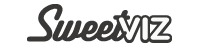
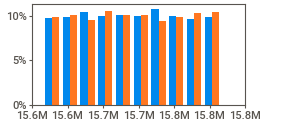
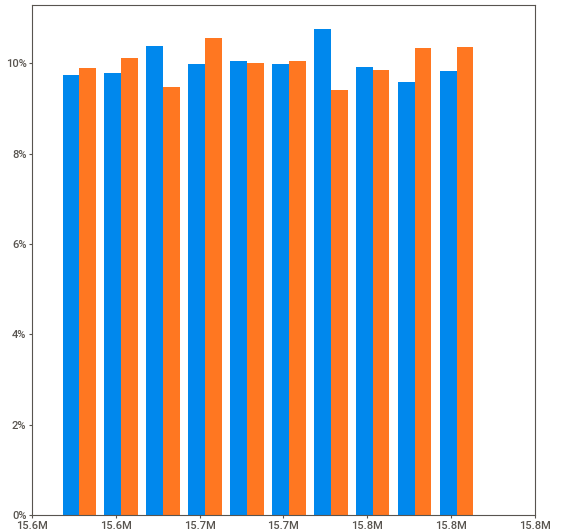
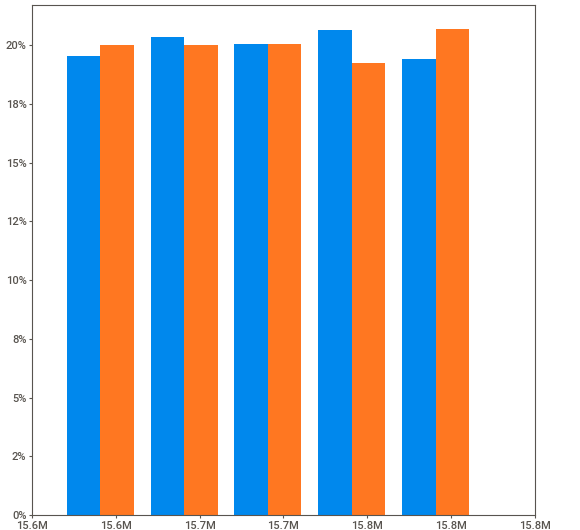
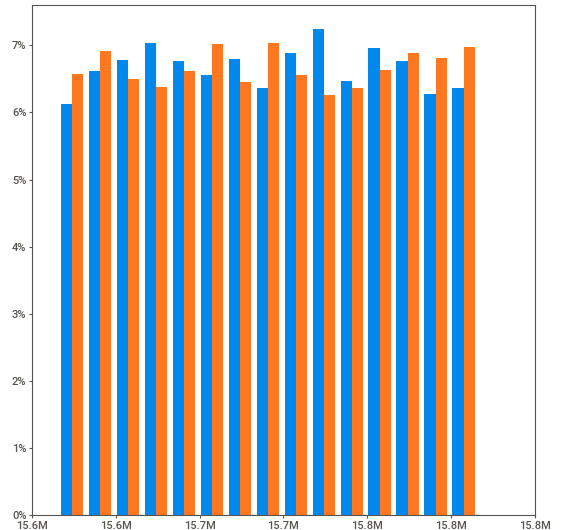
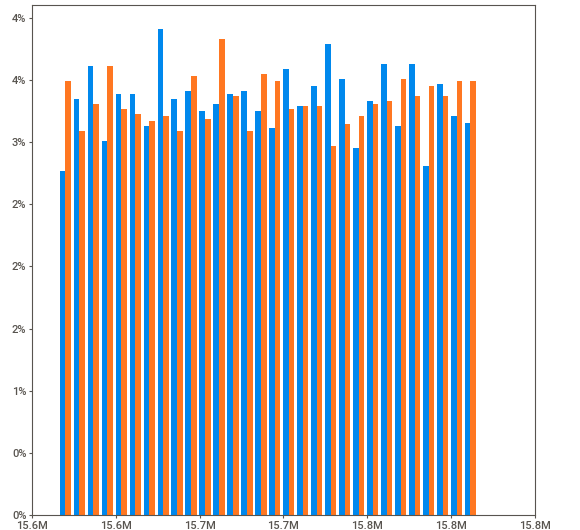
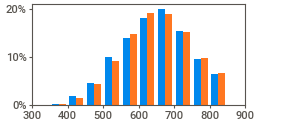
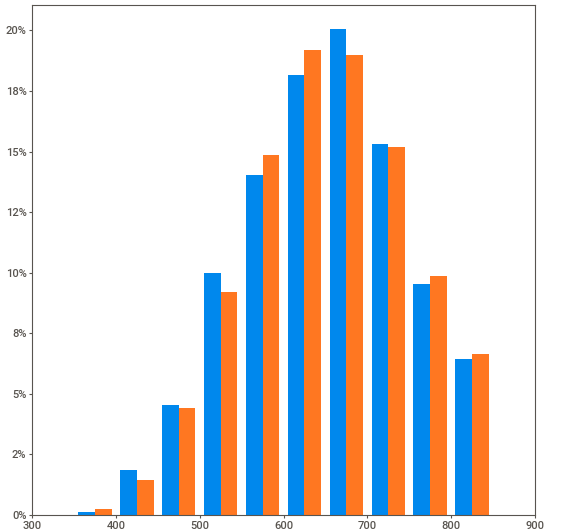
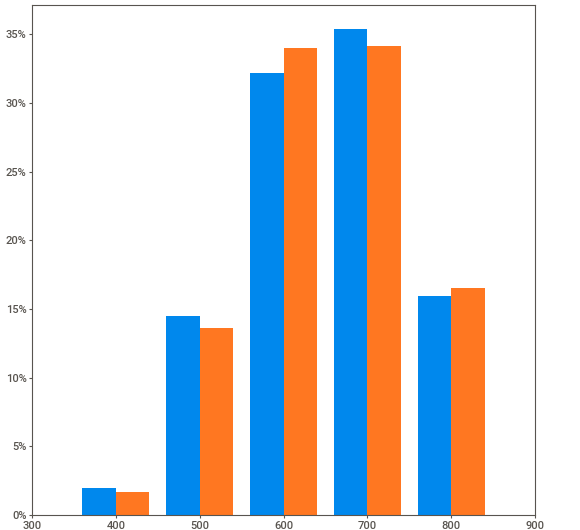
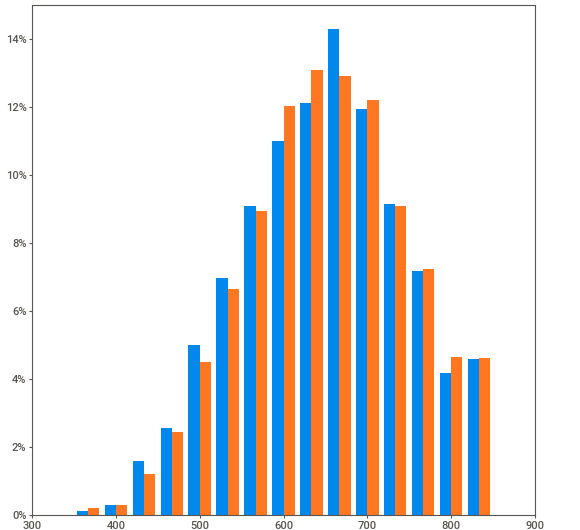
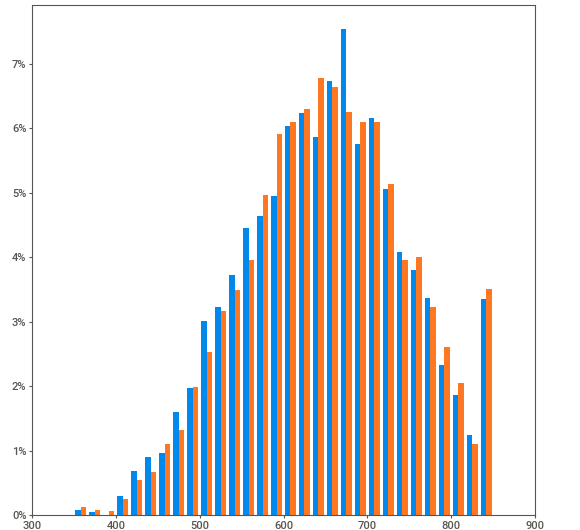
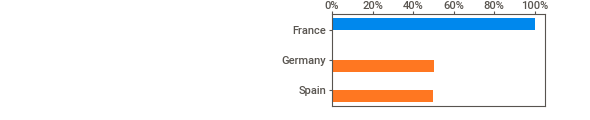
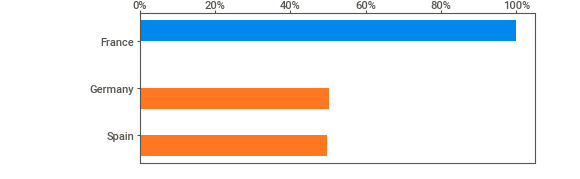
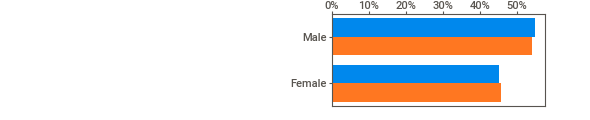
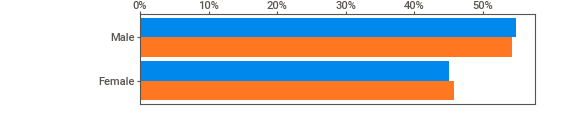
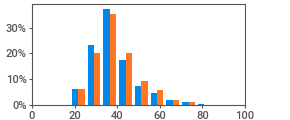
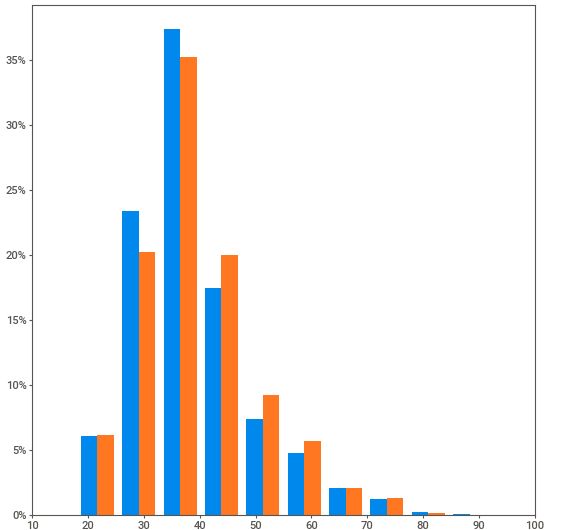
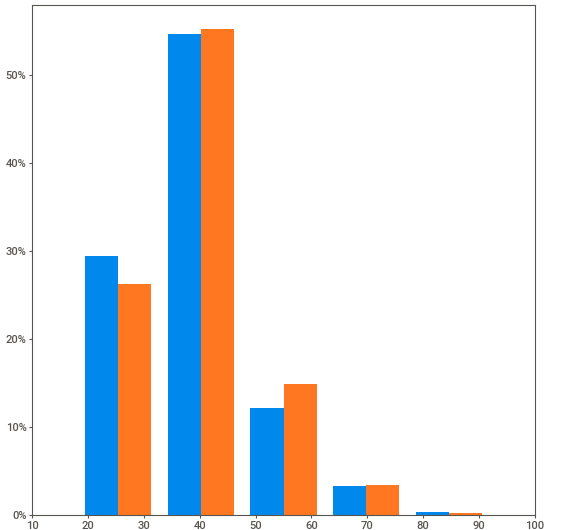
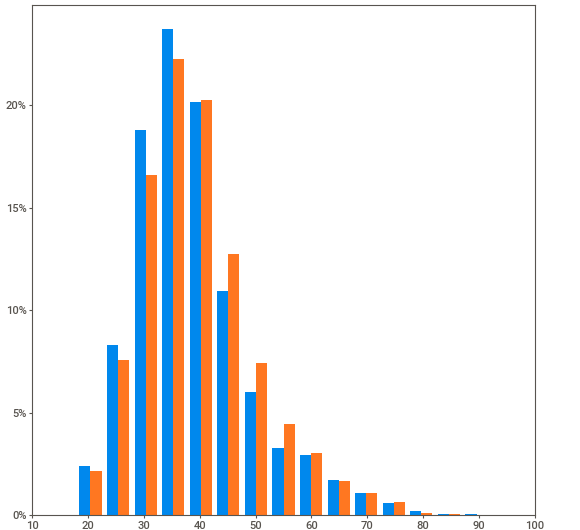
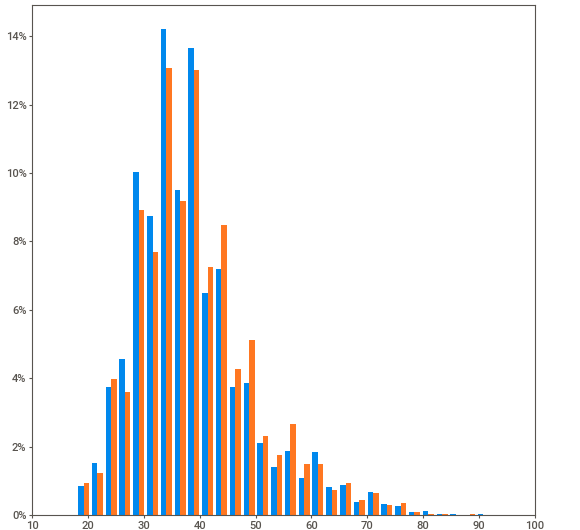
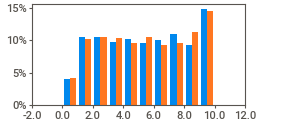
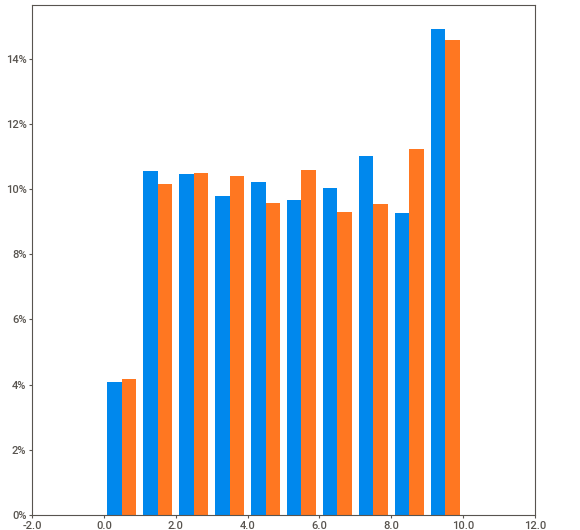
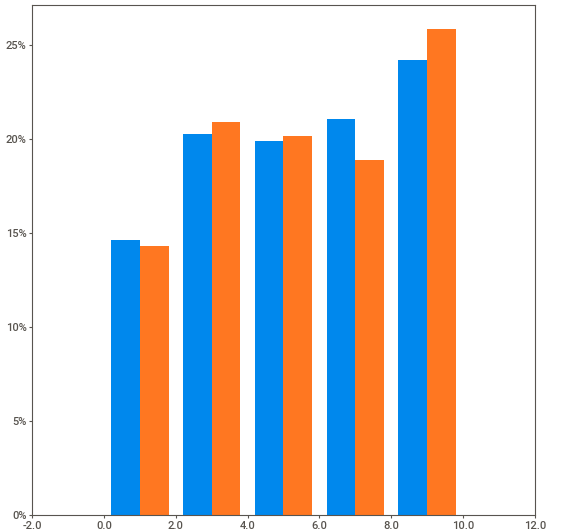
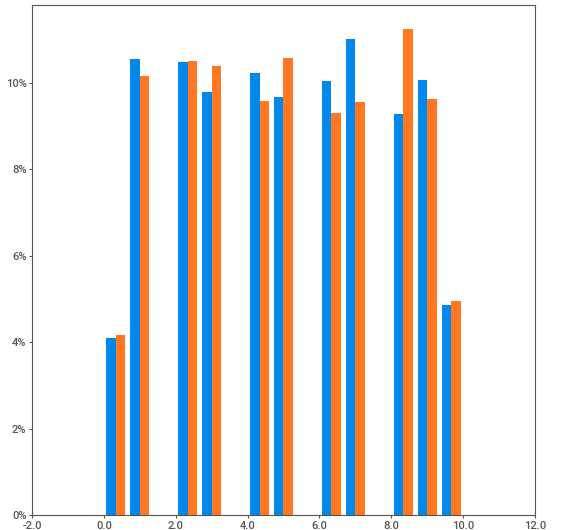
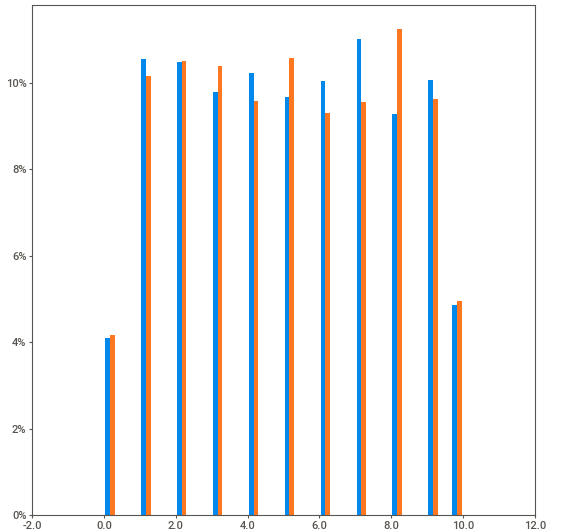
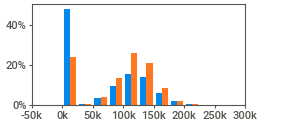
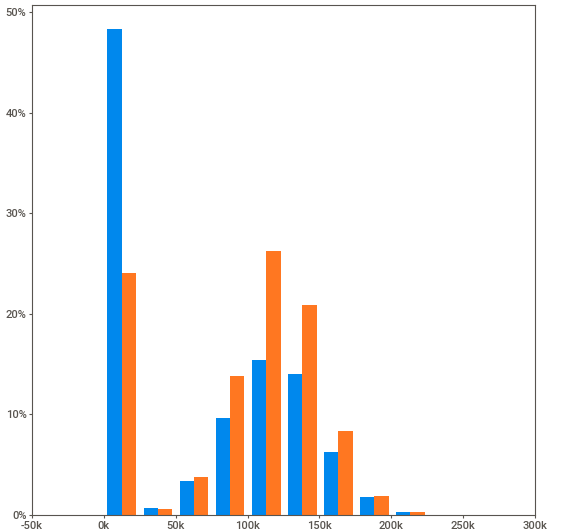
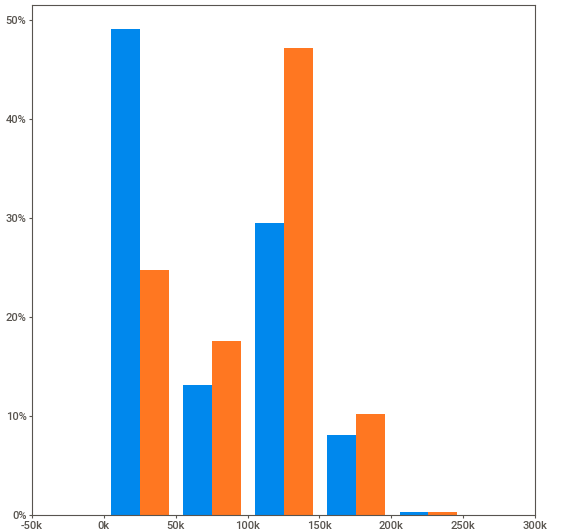
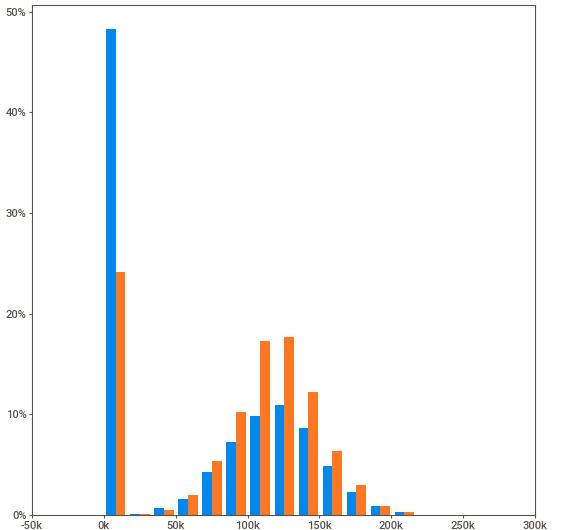
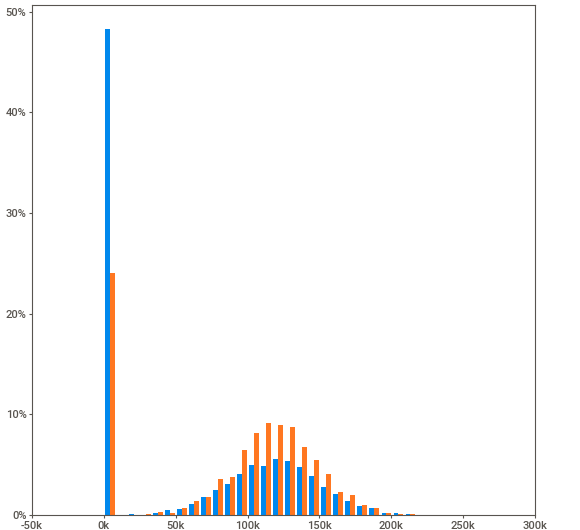
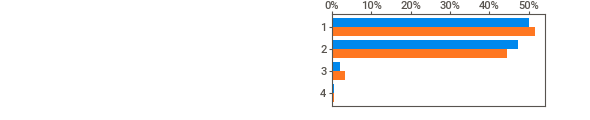
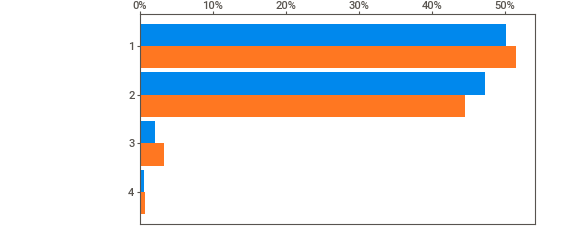
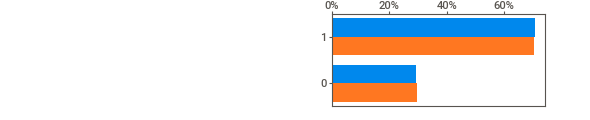
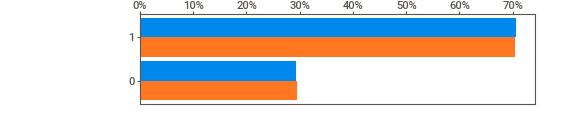
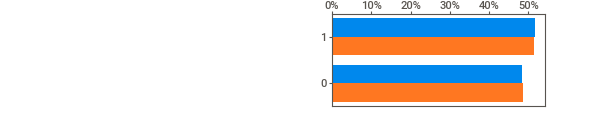
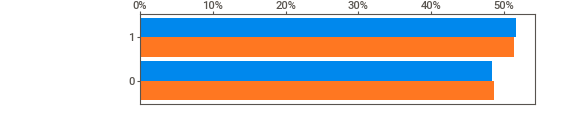
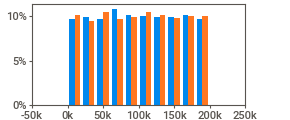
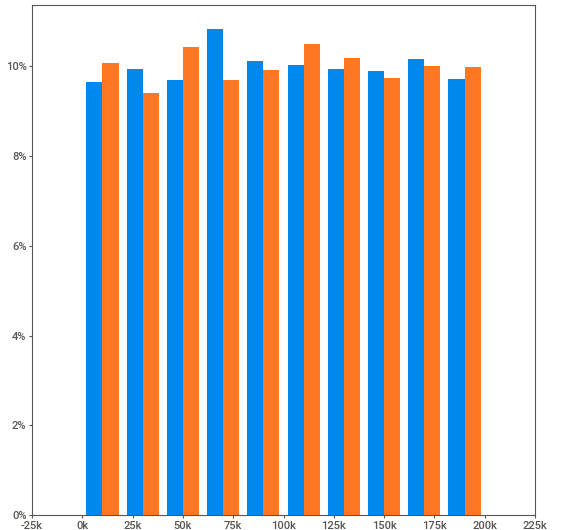
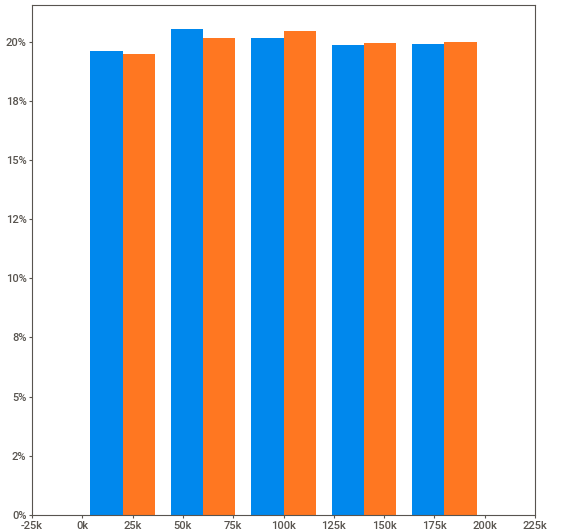
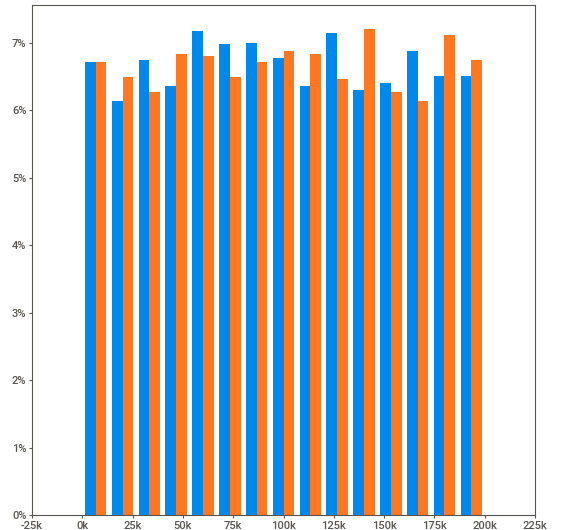
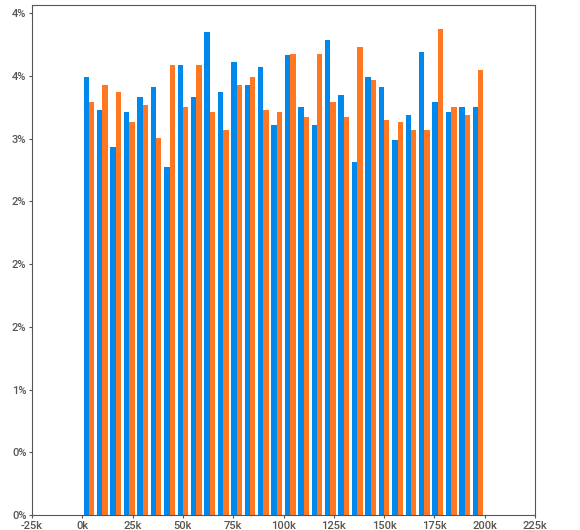
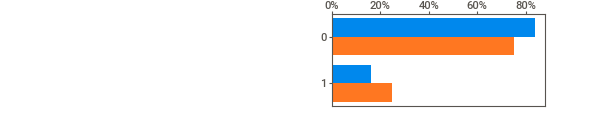
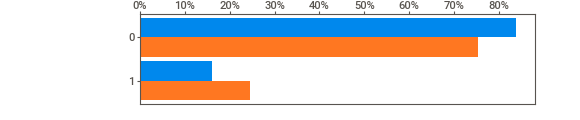
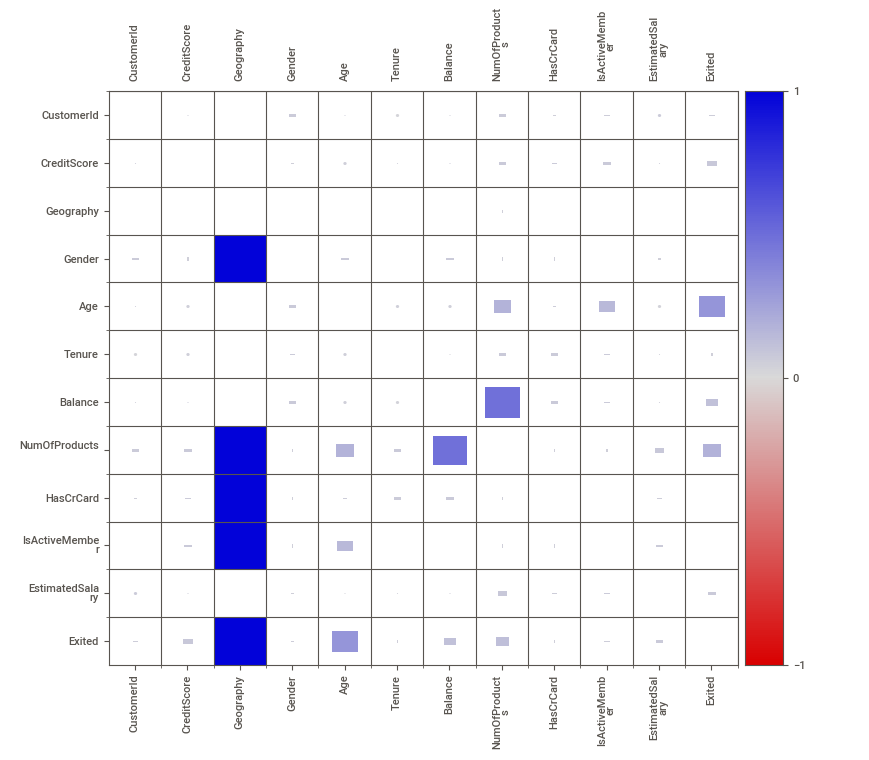
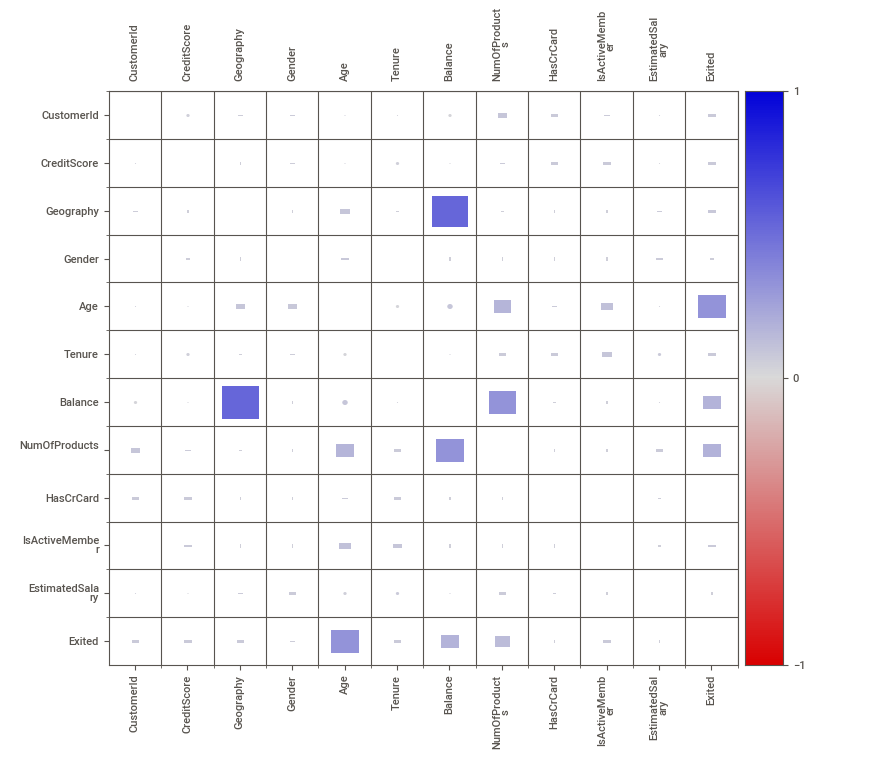

In [15]:
report = sv.compare_intra(data,data["Geography"] == "France",["France","Spain-Germany"])
report.show_notebook()

4.3 Análisis de las comparaciones

En el caso base (sin realizar comparaciones), no se ve ningún comportamiento anómalo, y así como se indicaba el género parece no tener asociaciones importantes con el resto de la data. Por otro lado la nacionalidad sí tiene una gran relación con otro valor, el balance para el caso francés prolifera el 0, mientras que el caso Spain-German presenta un mayor volumen de a partir de la parte media

---

# 5 Valores Faltantes

Generaremos un 30% de data faltante para las columnas Balance y Age, para luego compara el cómo afecta esto en las gráficas, comparandola con el dataset base

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



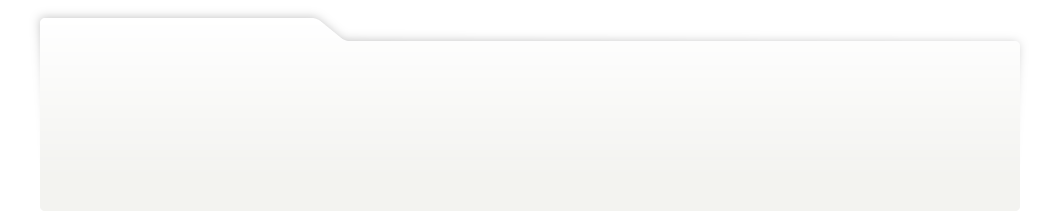
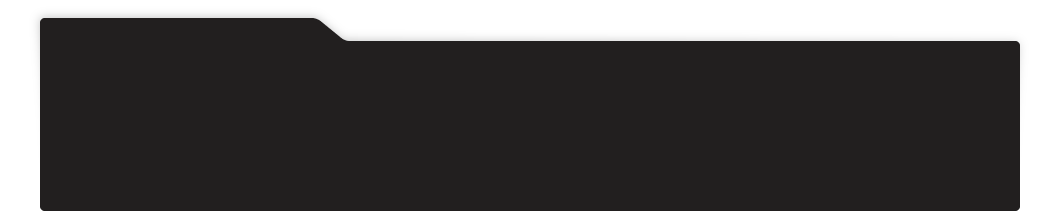
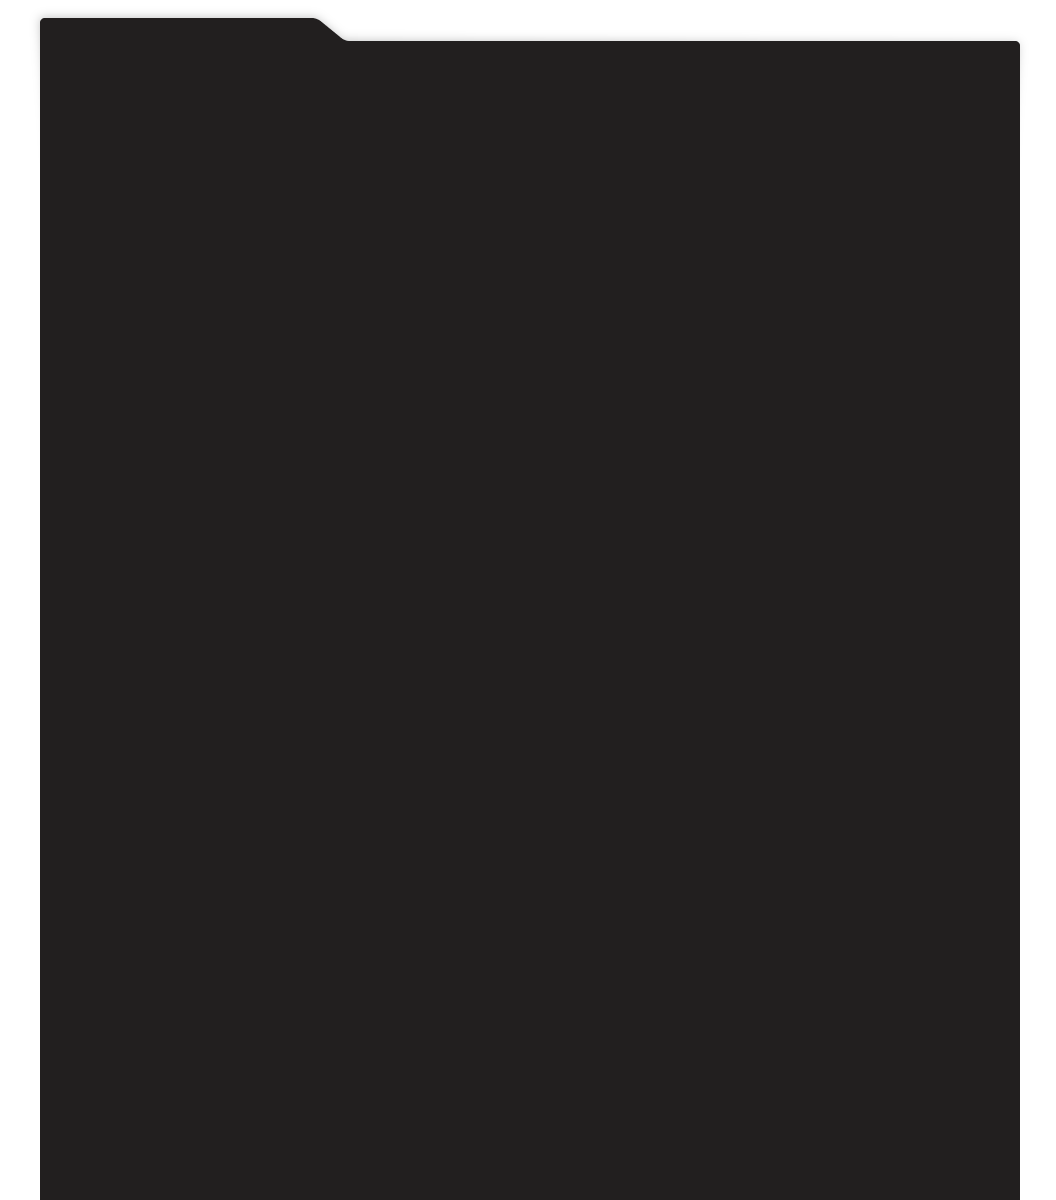
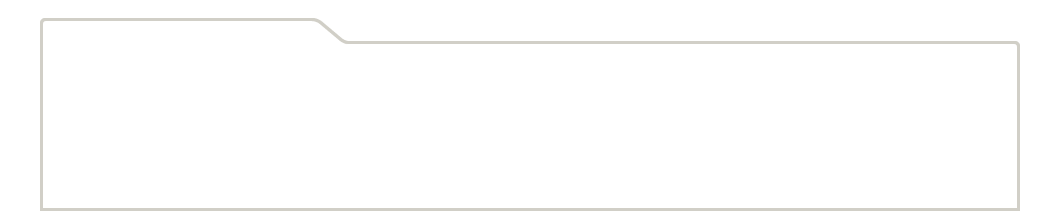
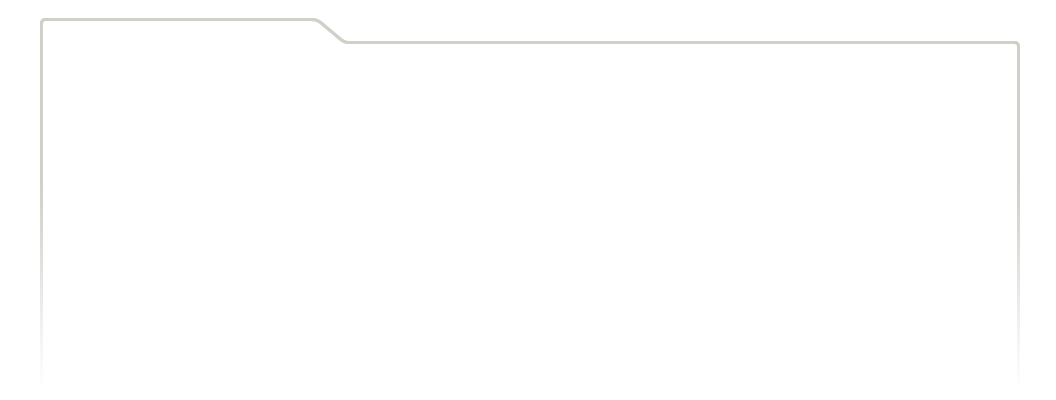
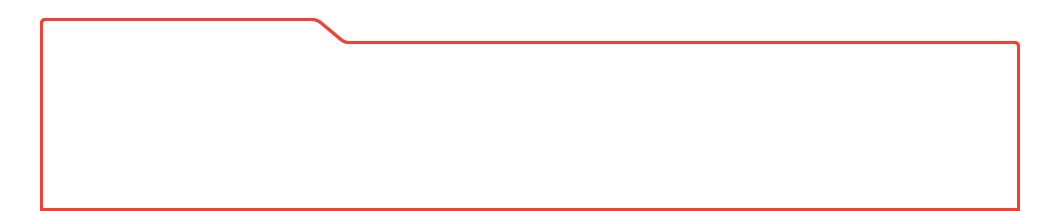
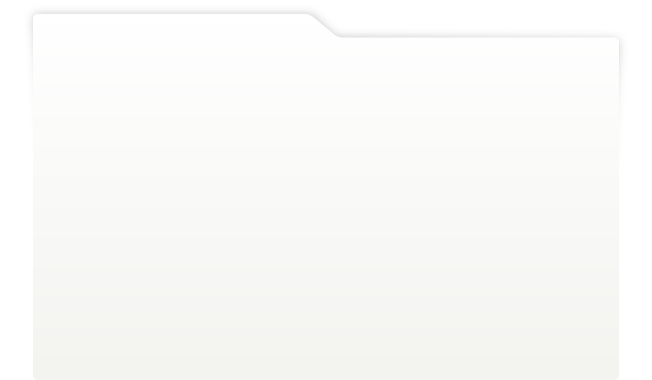
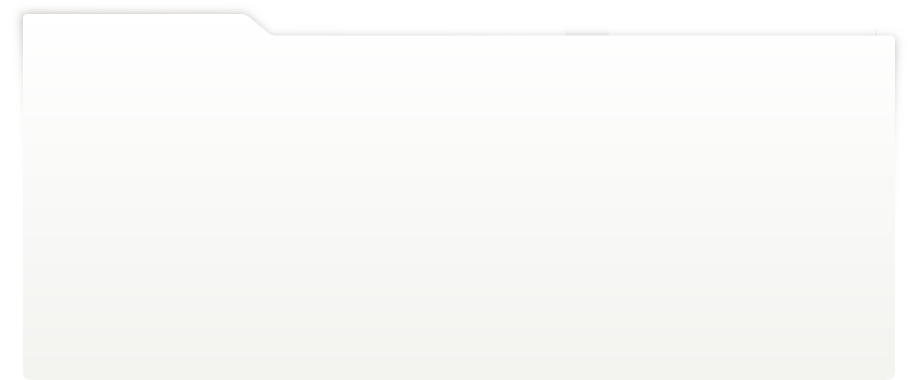
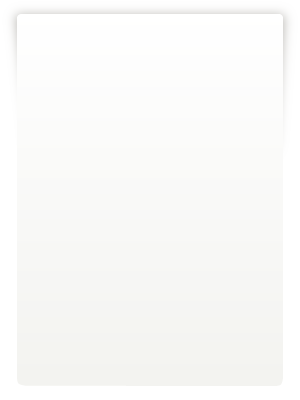
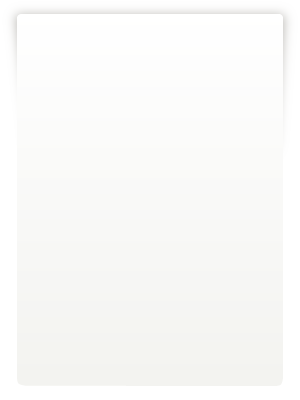
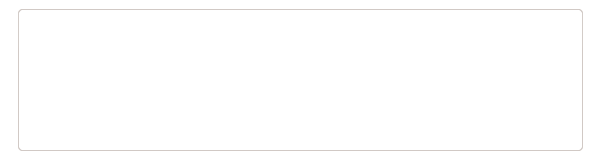
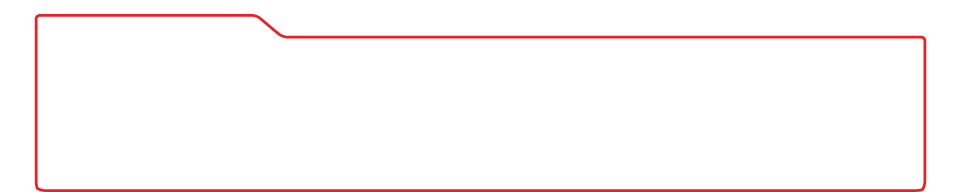
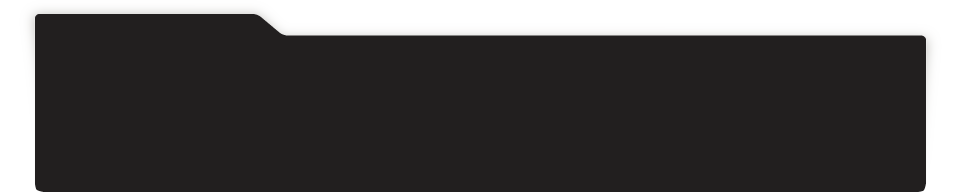
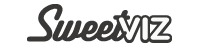
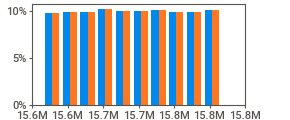
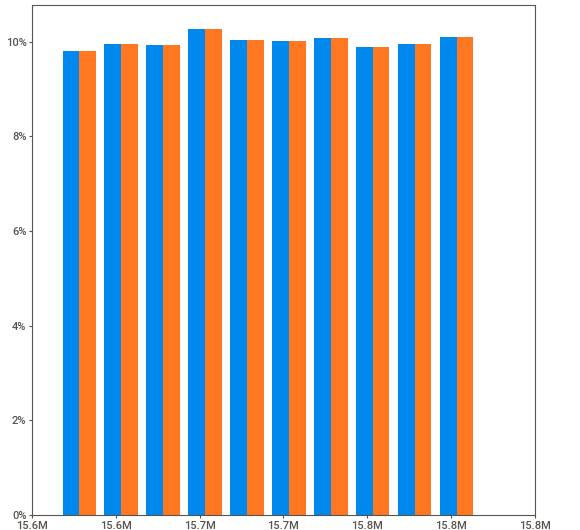
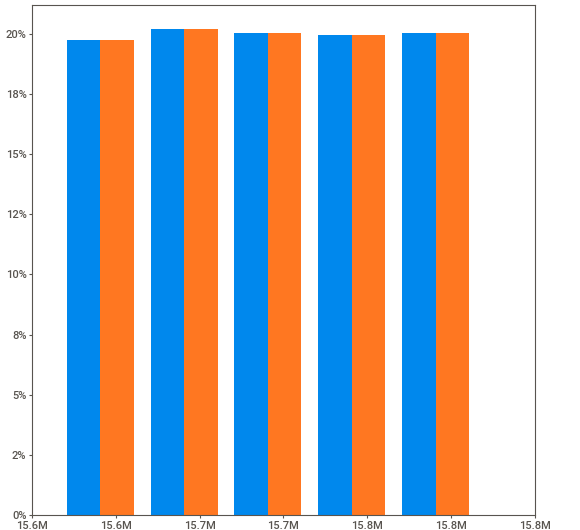
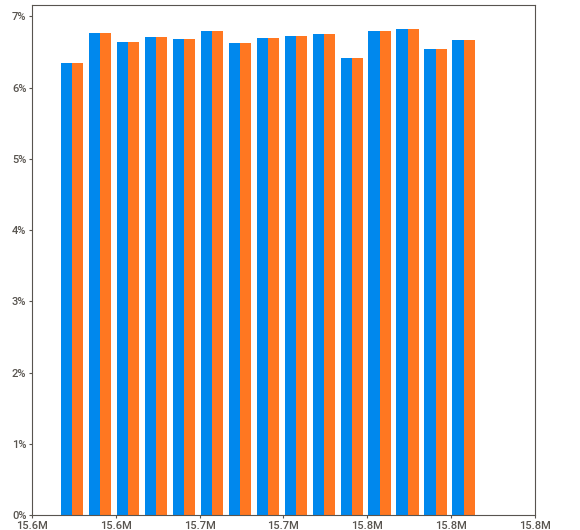
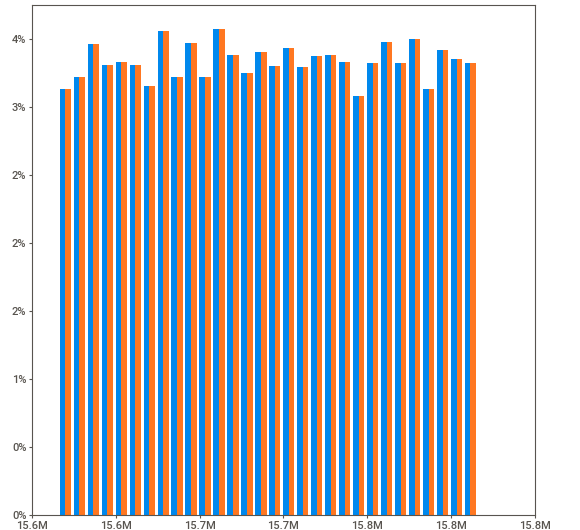
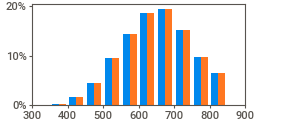
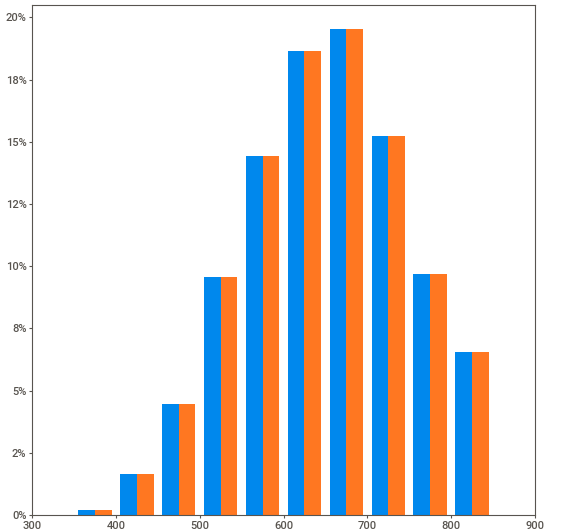
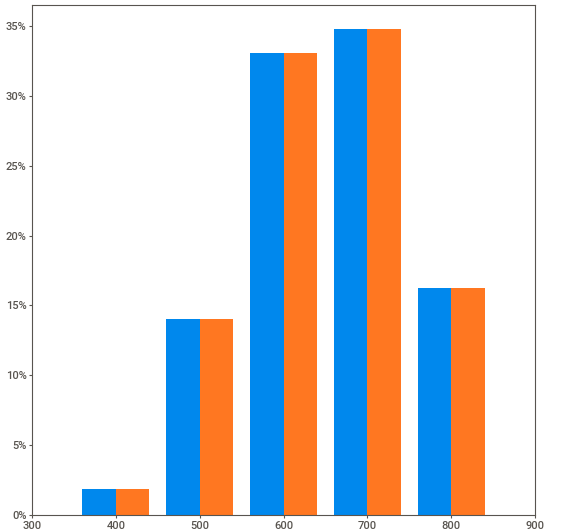
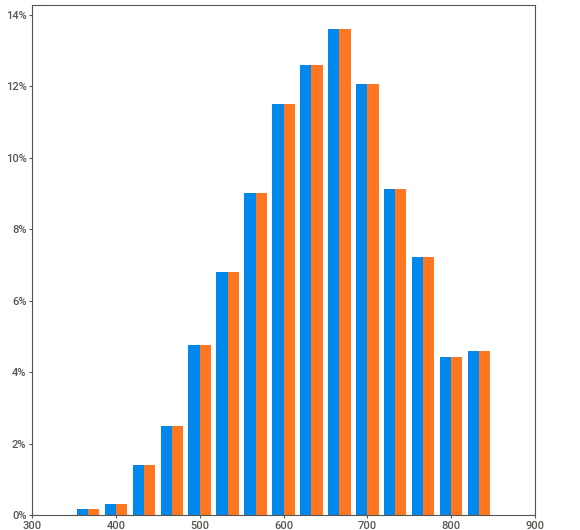
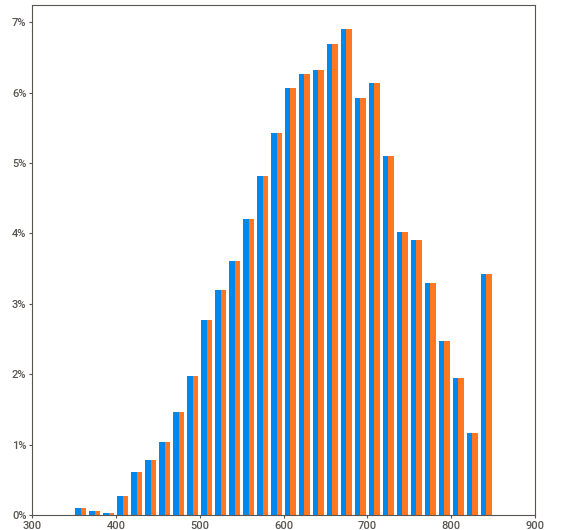
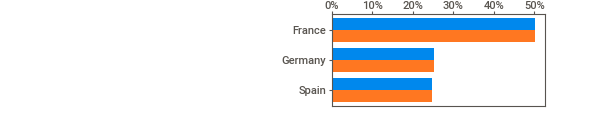
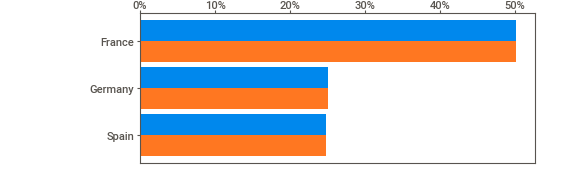
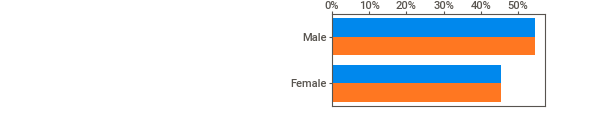
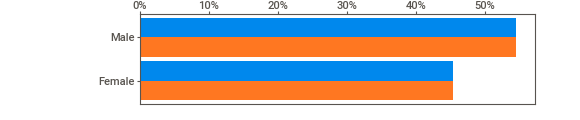
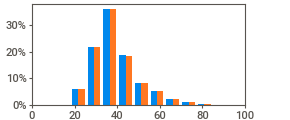
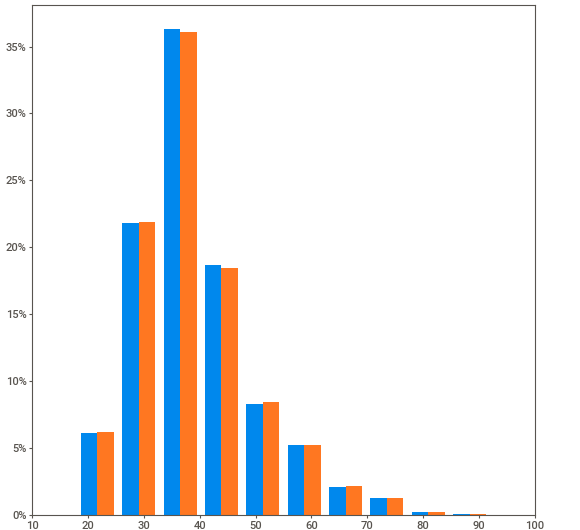
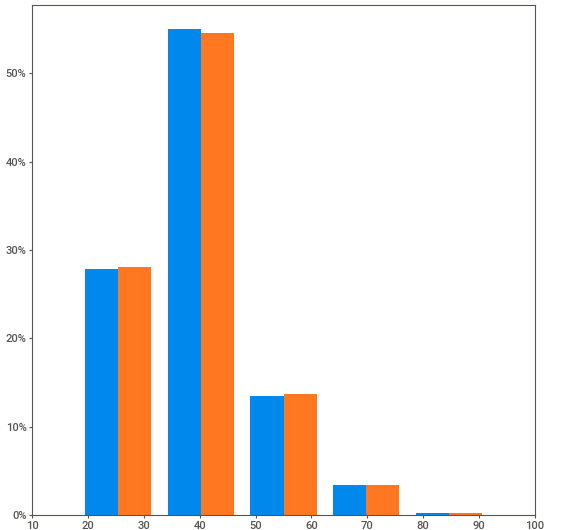
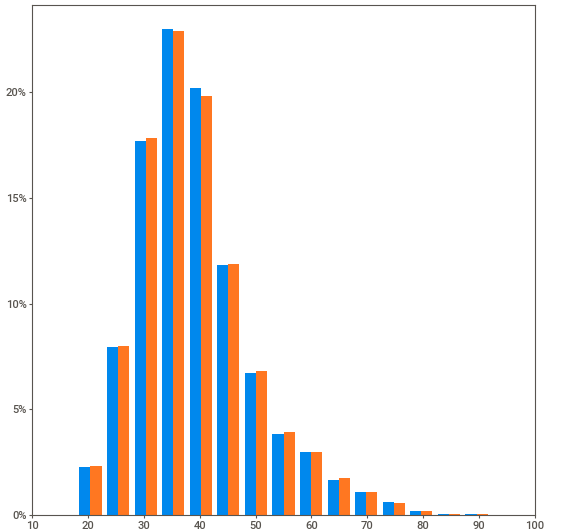
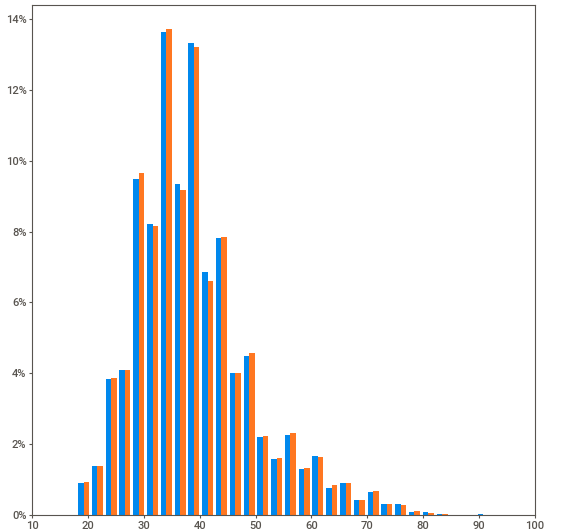
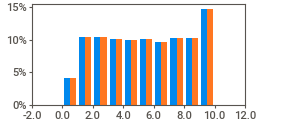
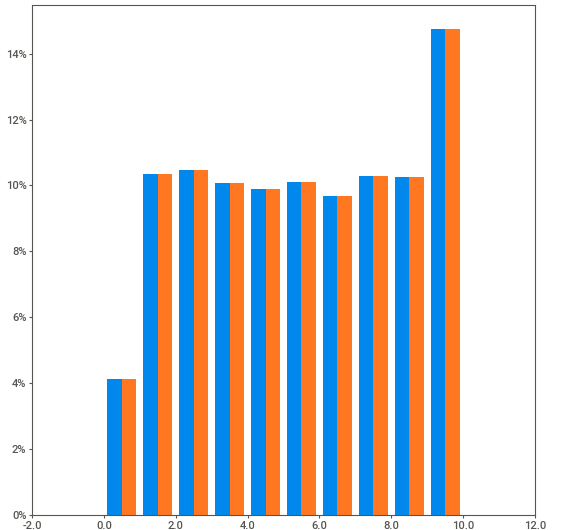
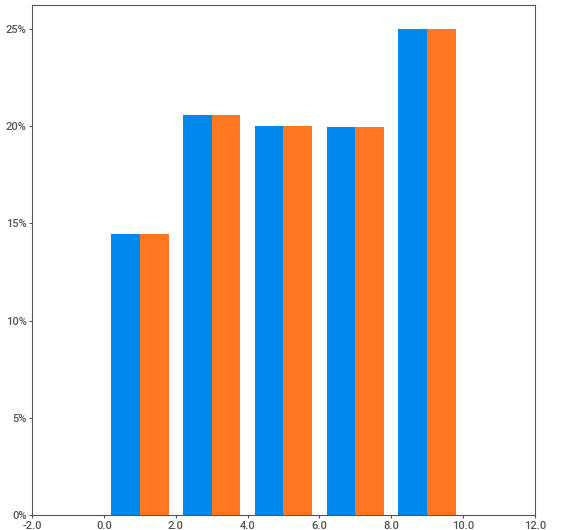
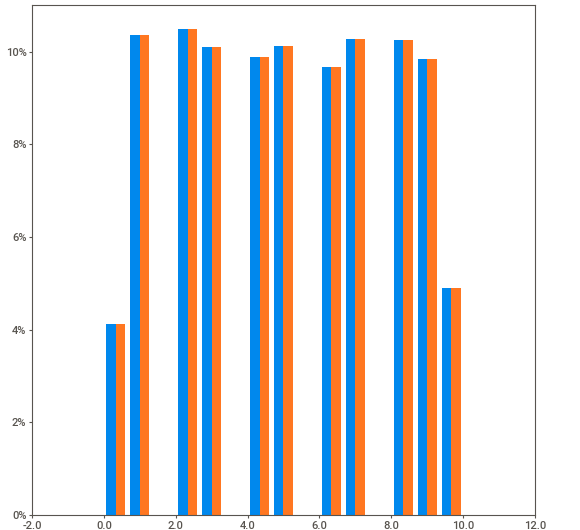
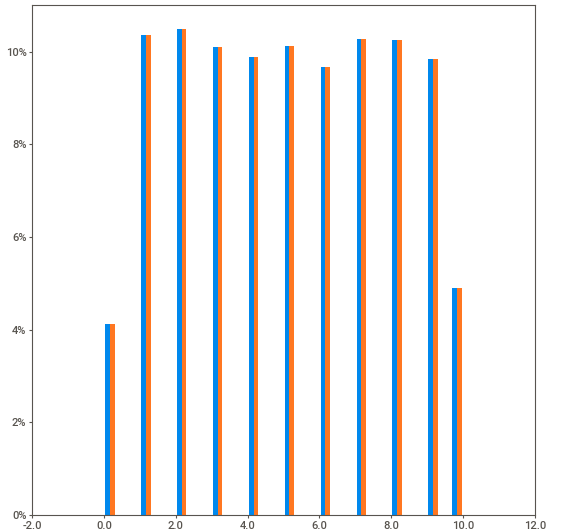
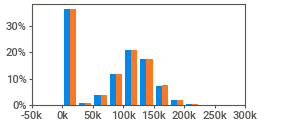
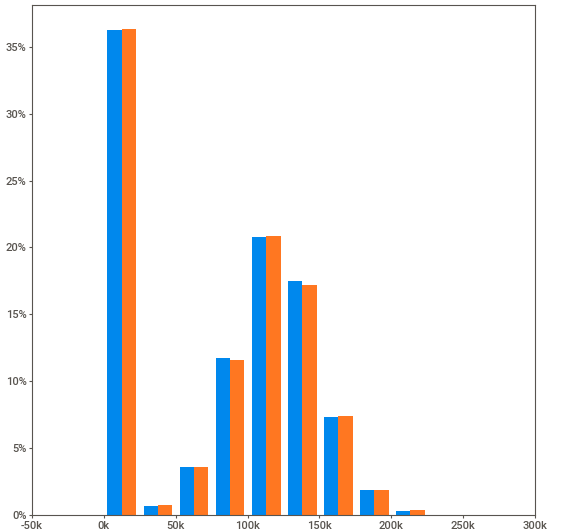
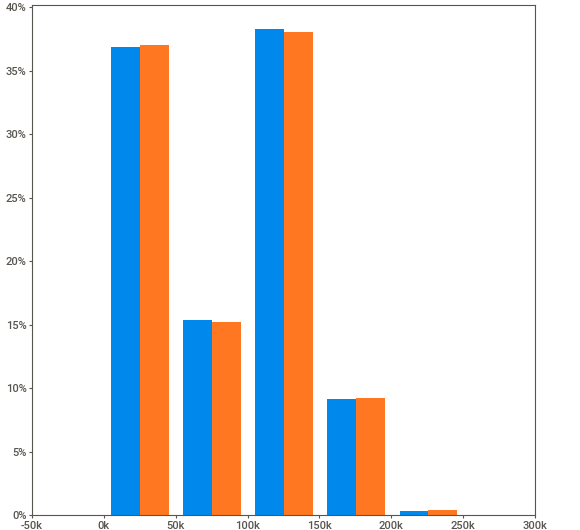
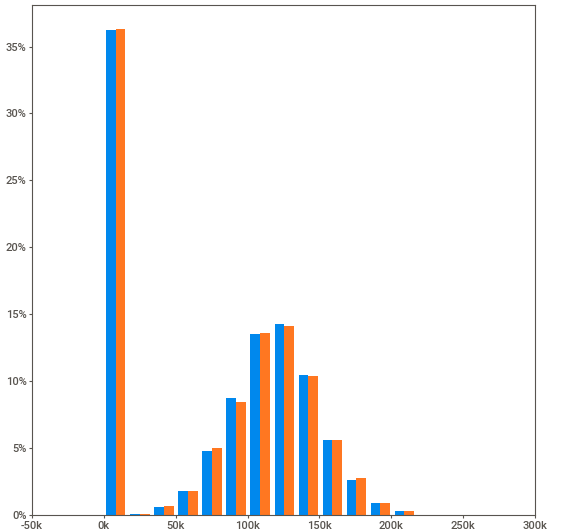
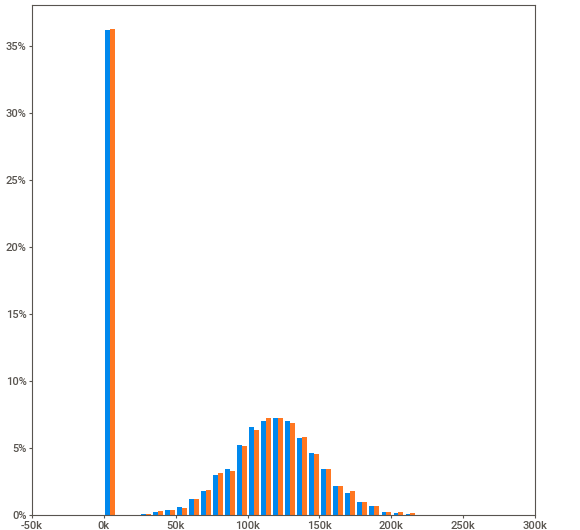
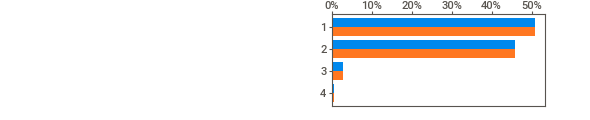
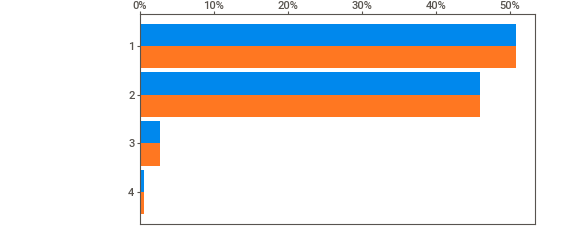
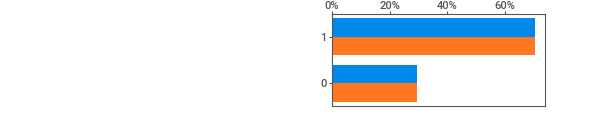
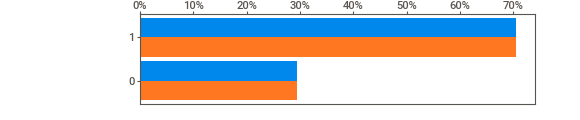
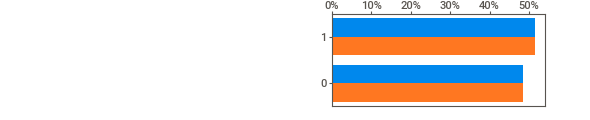
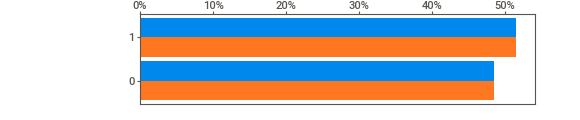
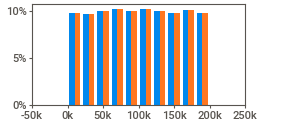
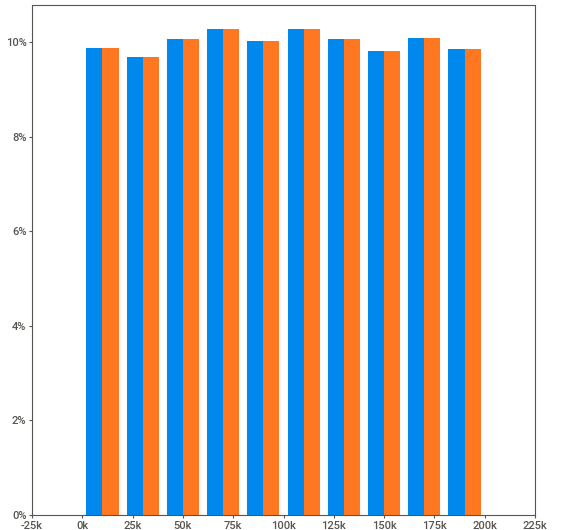
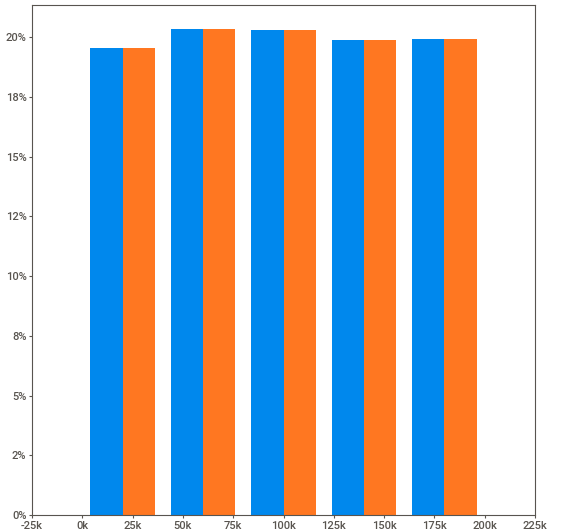
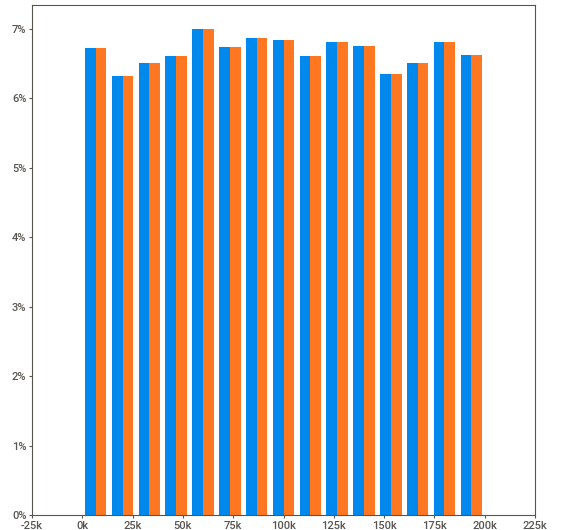
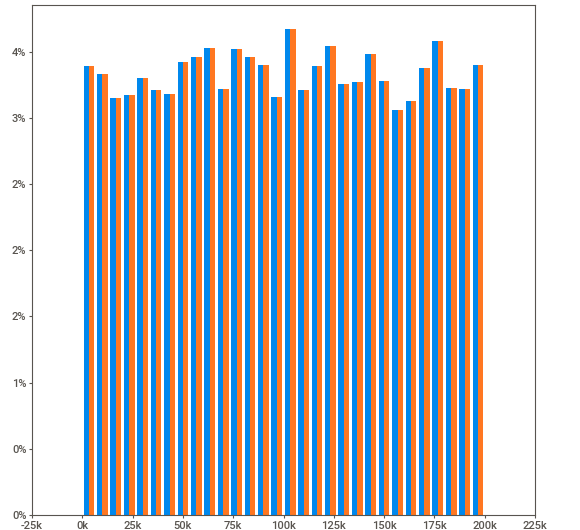
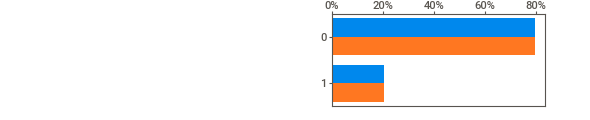
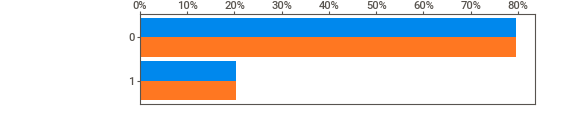
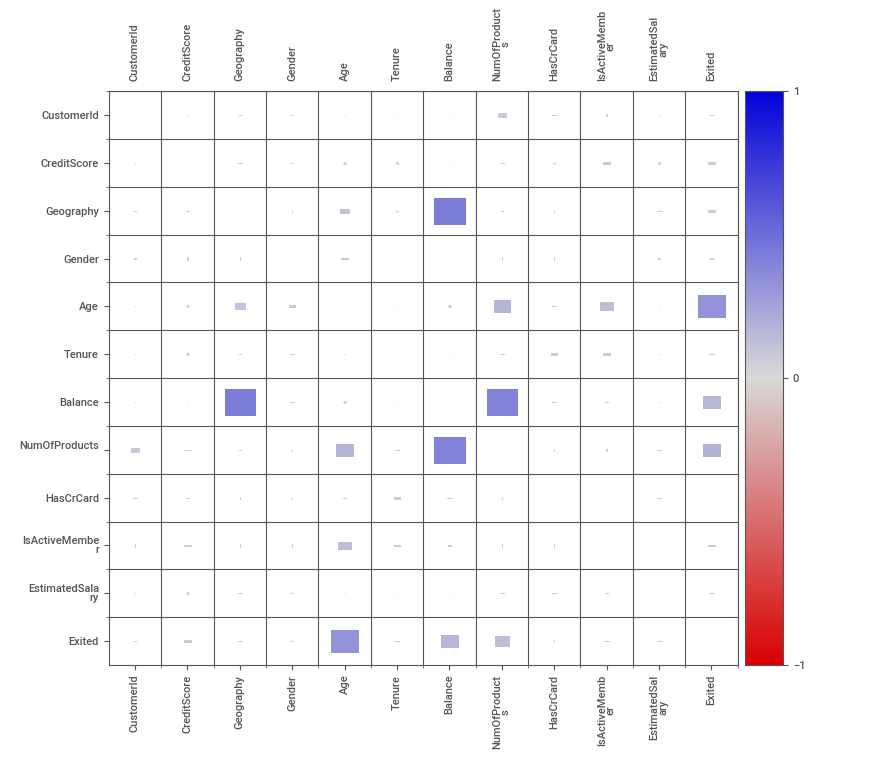
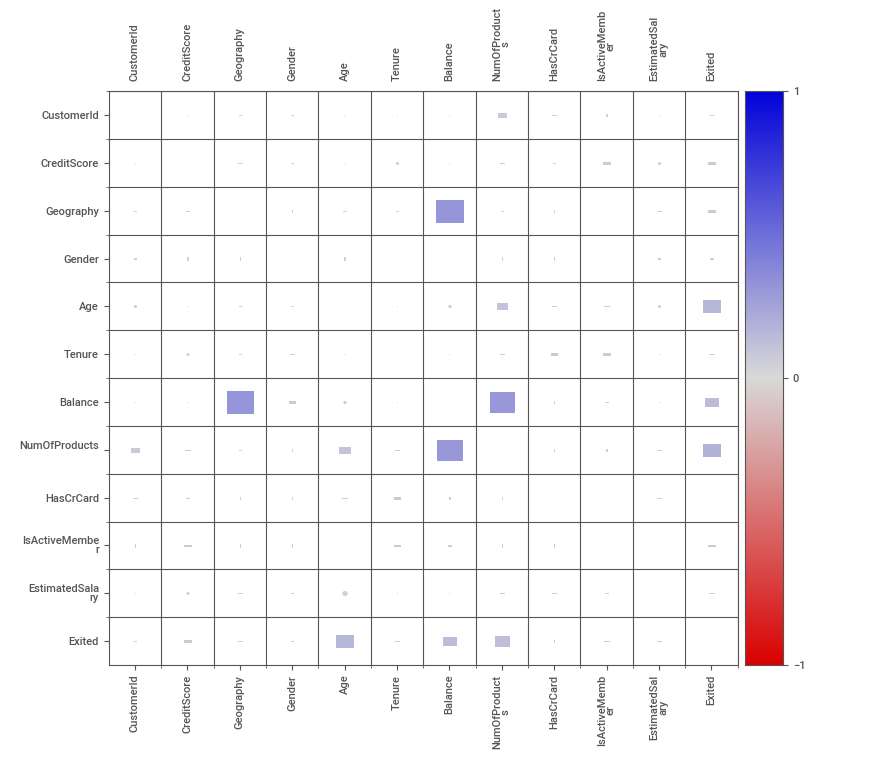

In [17]:
data_NA = data.copy()
sample = np.random.choice(list(data_NA.index),int(len(data)*0.3))
data_NA.loc[sample,['Balance','Age']] = np.nan
report = sv.compare([data,"Original"],[data_NA,"Ausentes"])
report.show_notebook()

# 5.1 Utilizando DROP para eliminar tuplas con datos faltantes

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



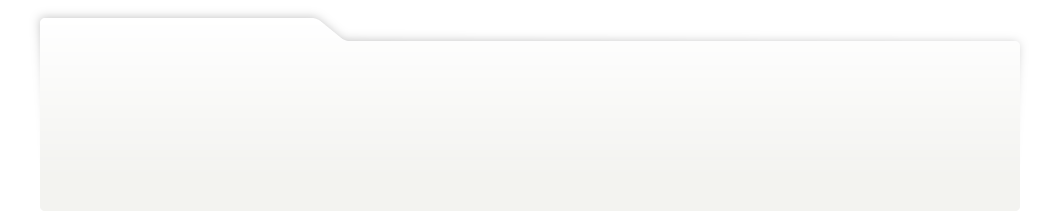
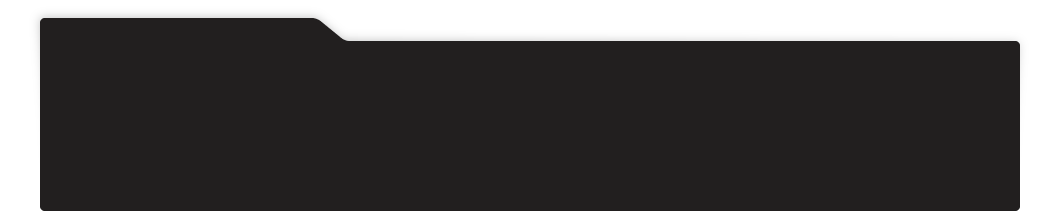
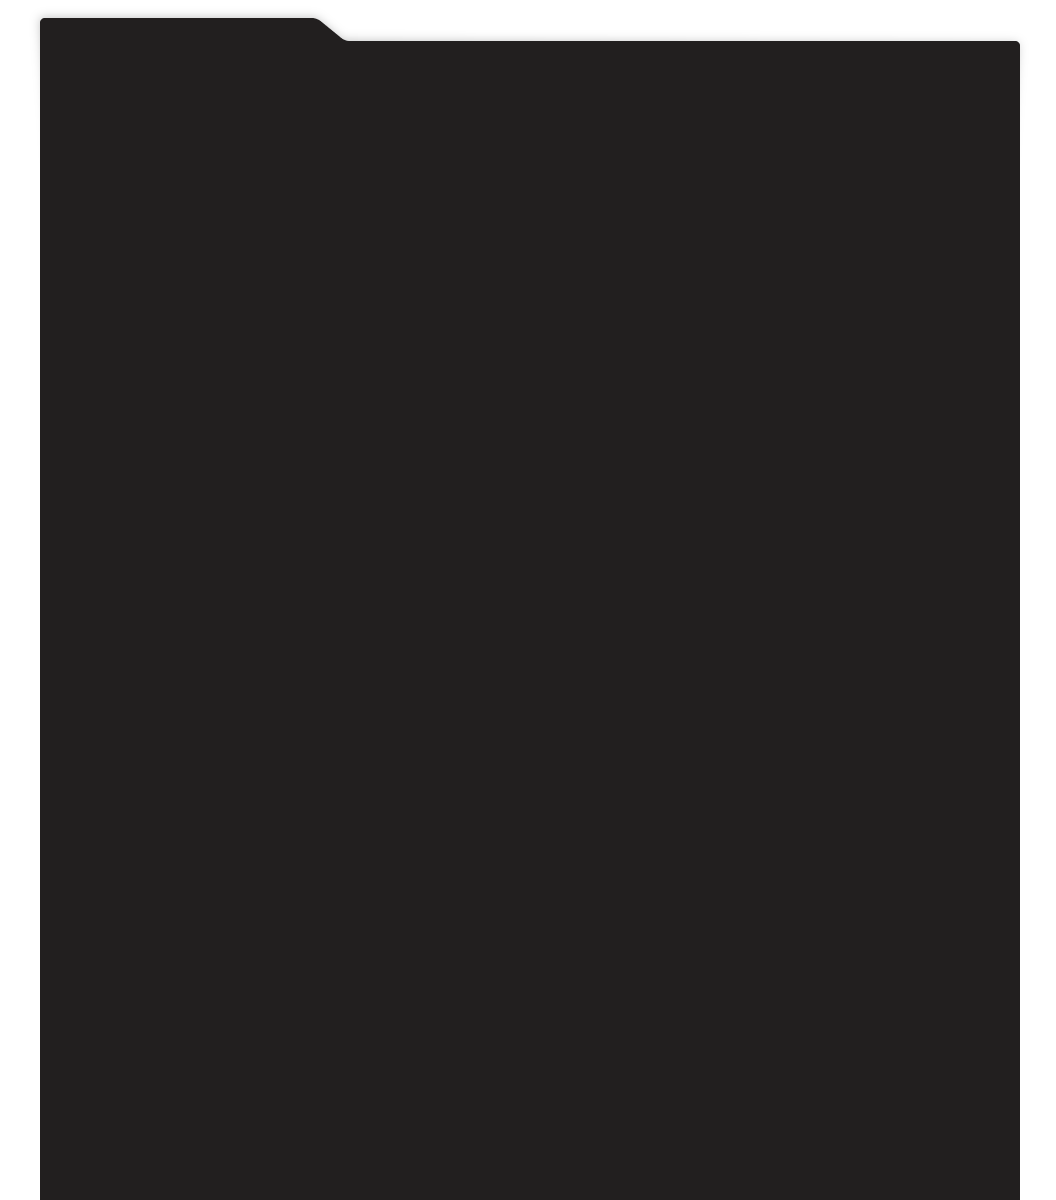
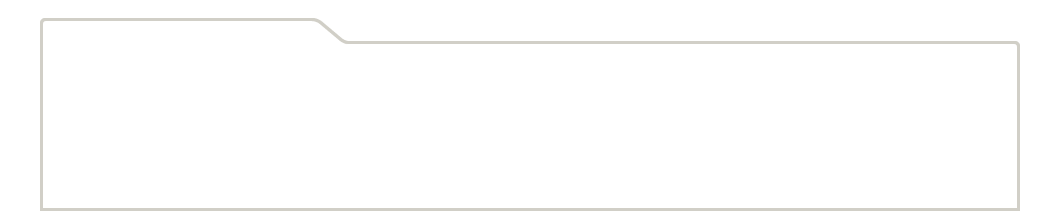
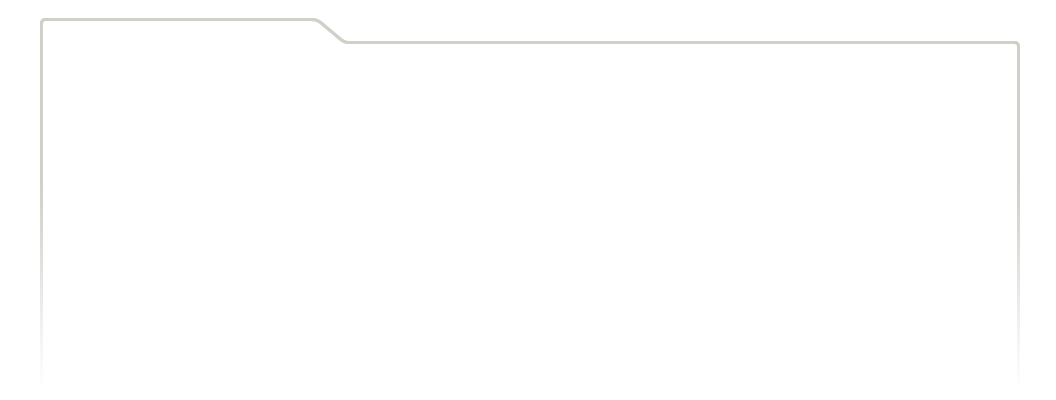
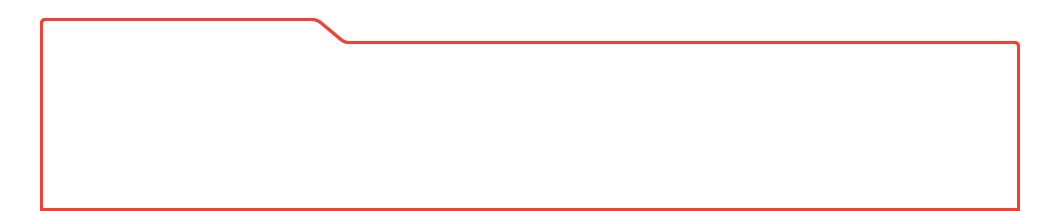
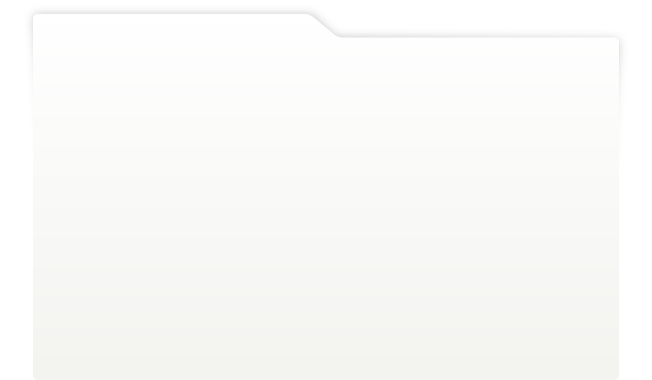
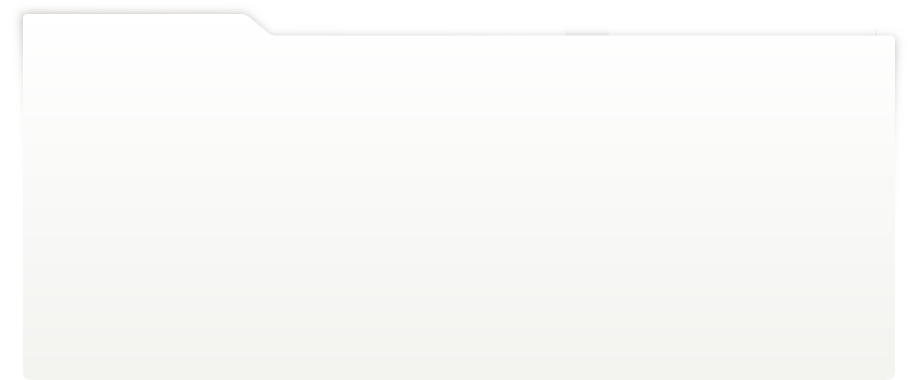
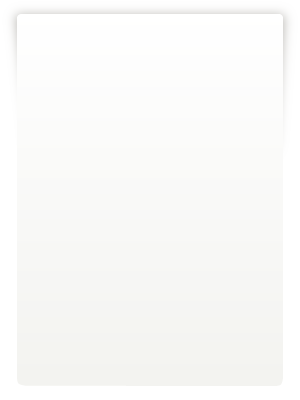
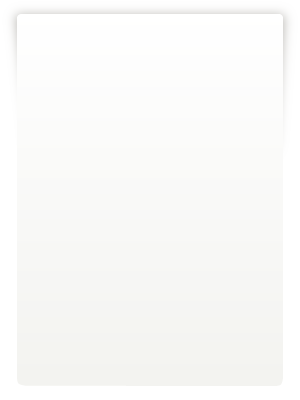
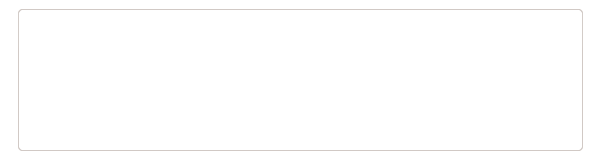
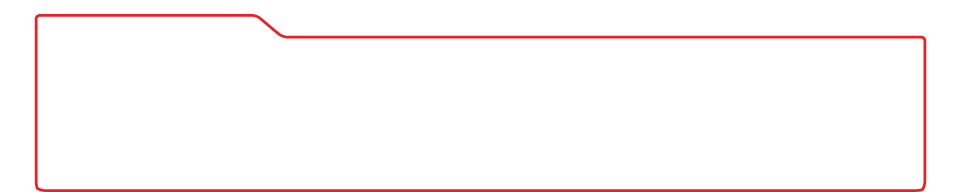
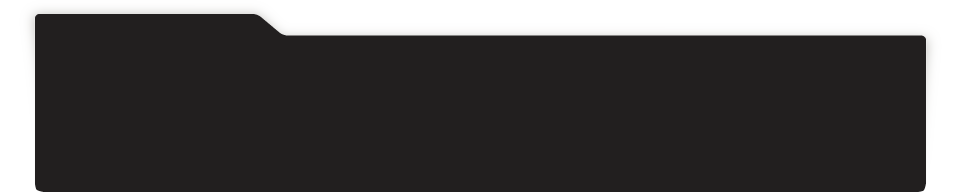
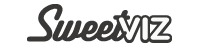
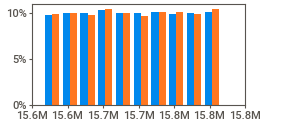
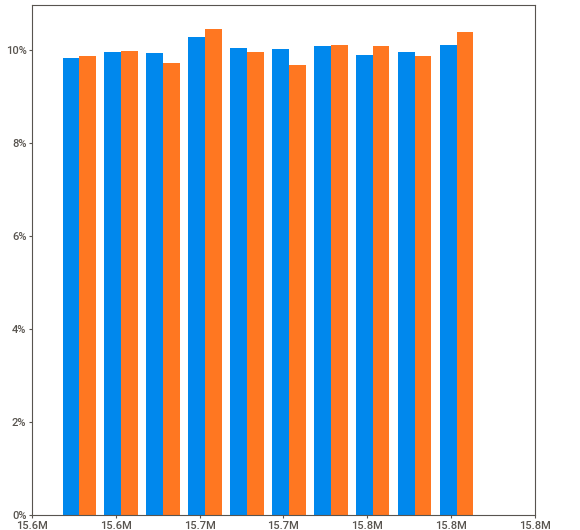
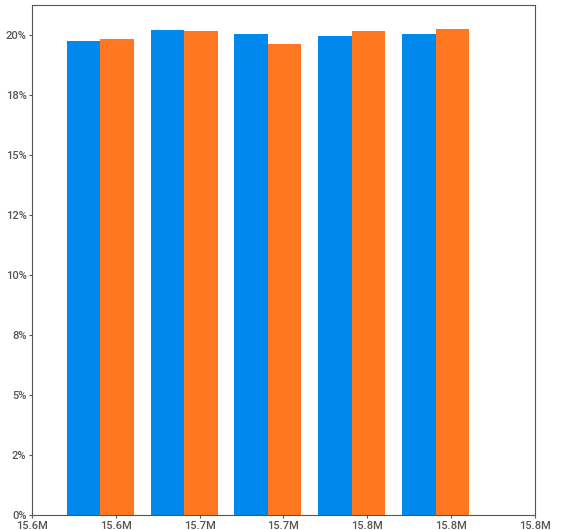
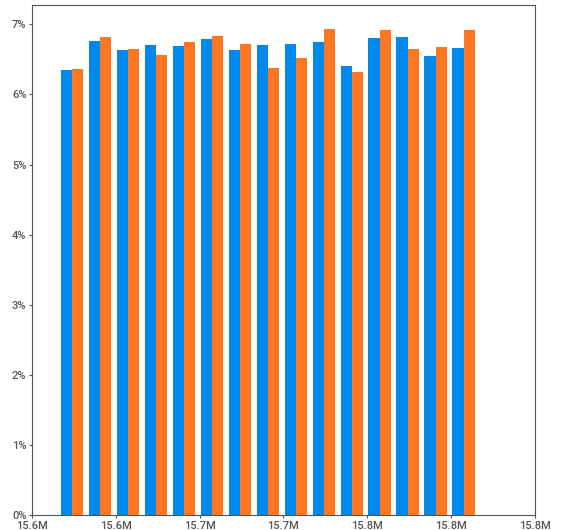
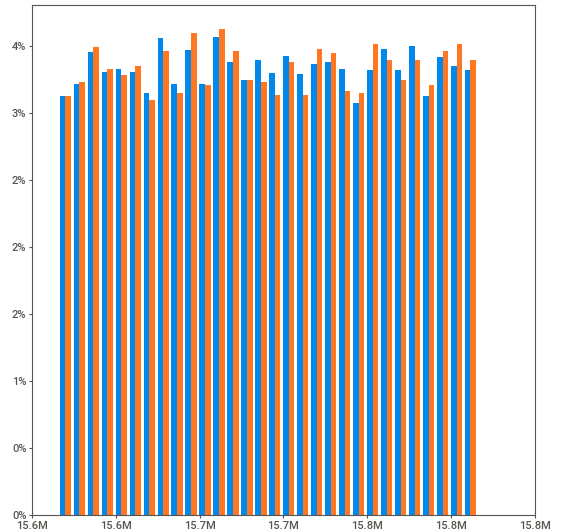
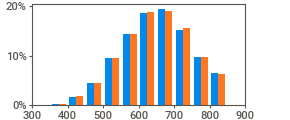
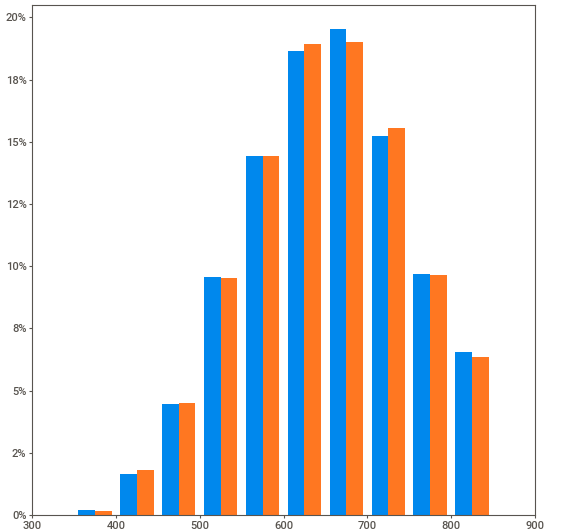
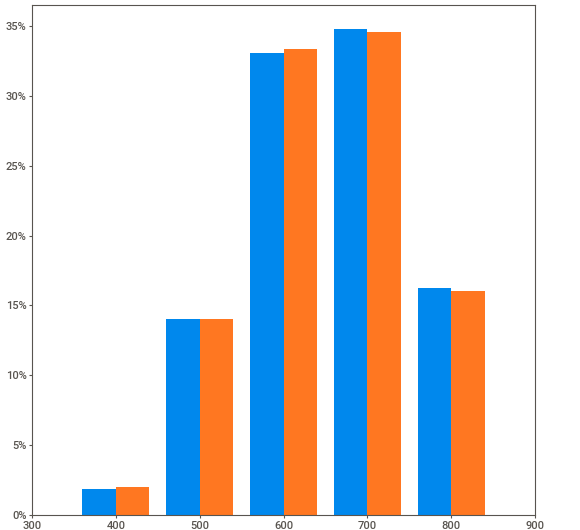
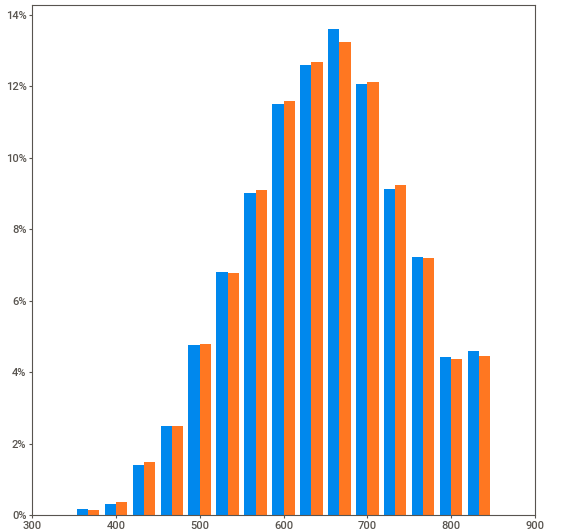
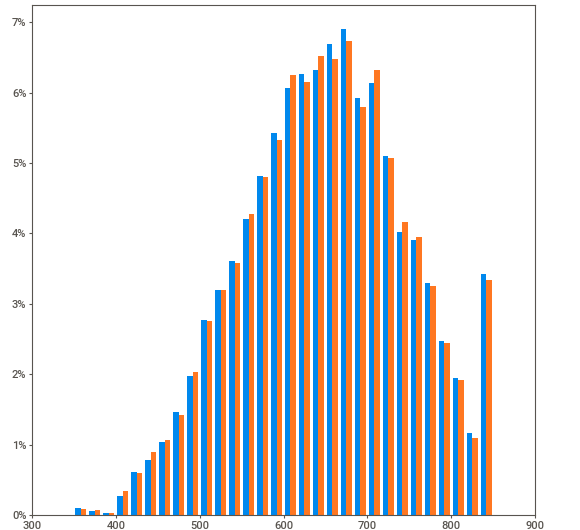
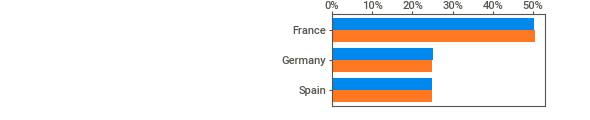
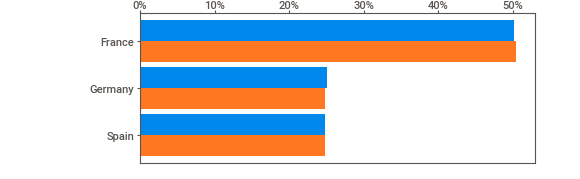
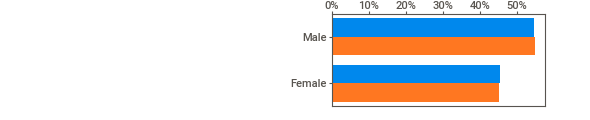
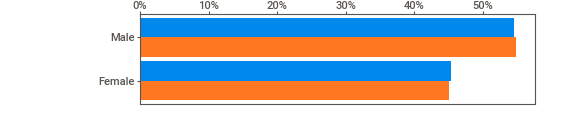
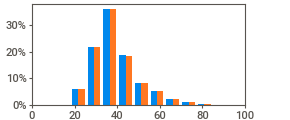
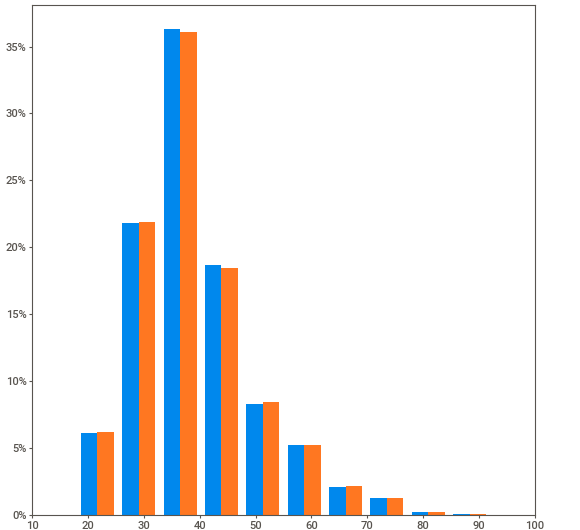
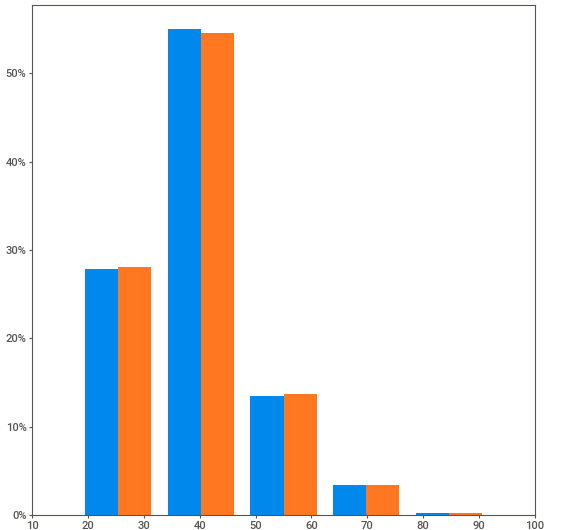
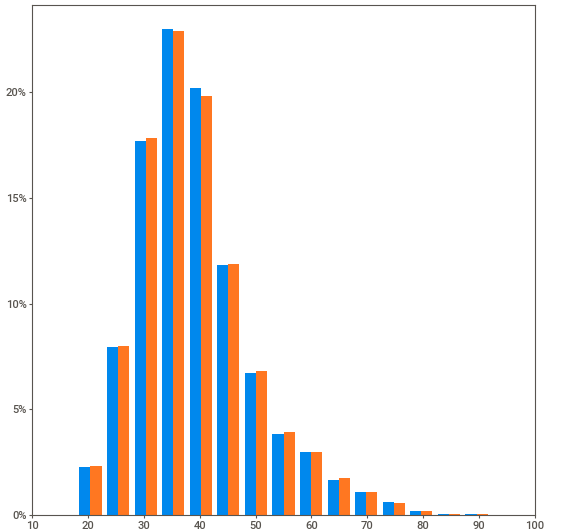
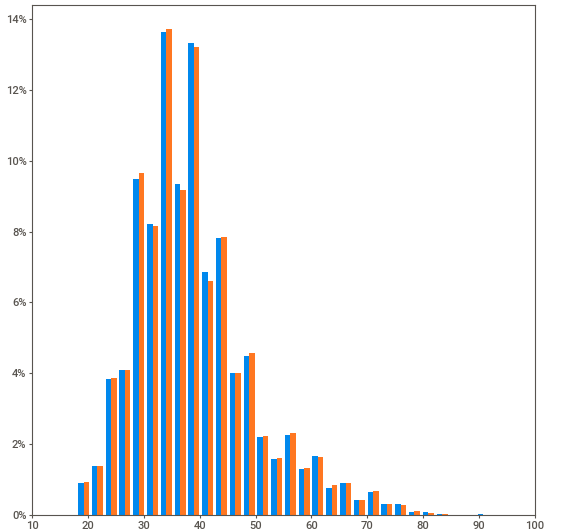
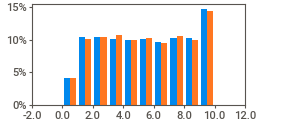
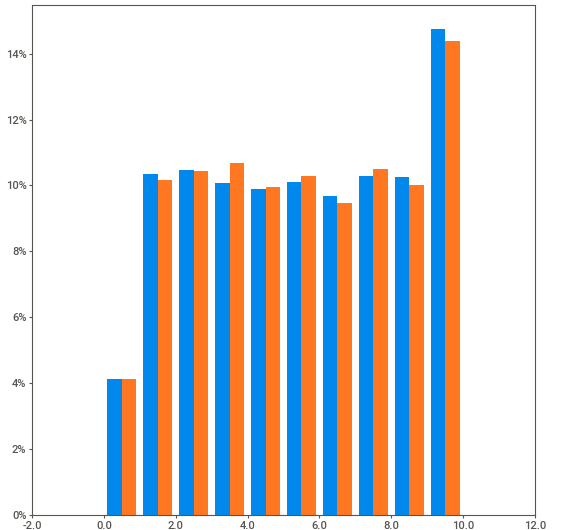
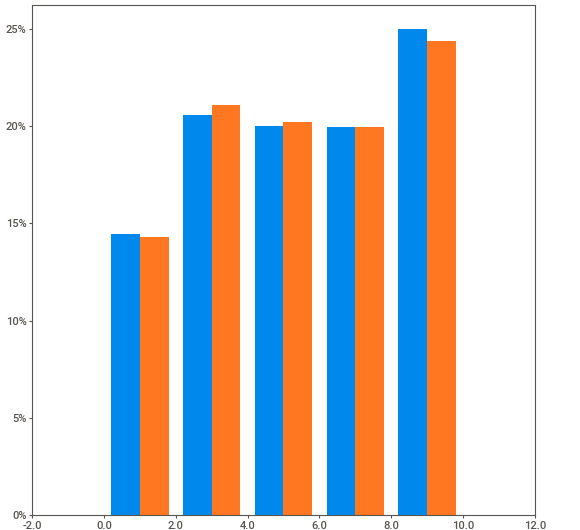
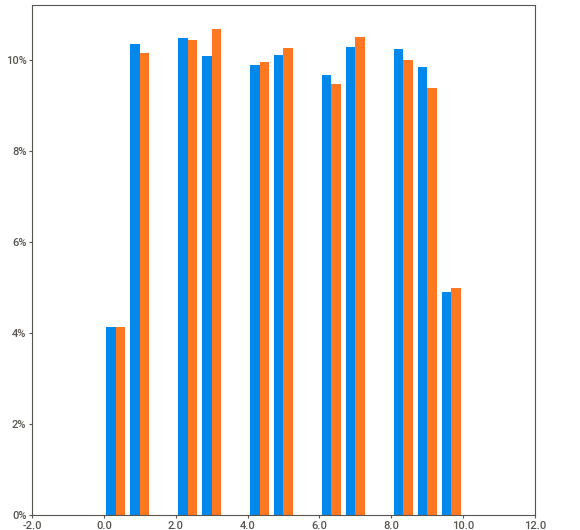
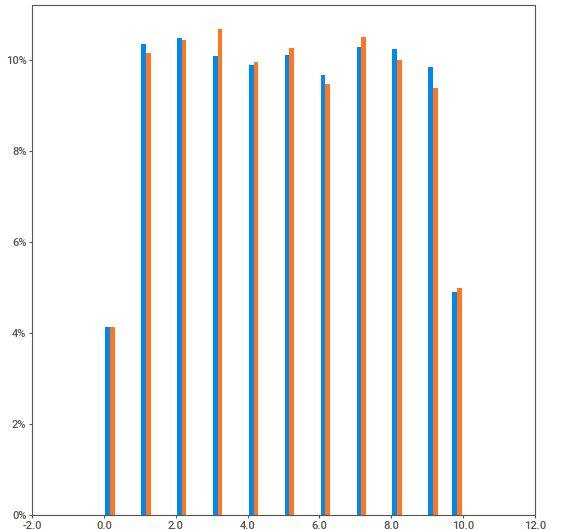
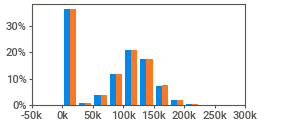
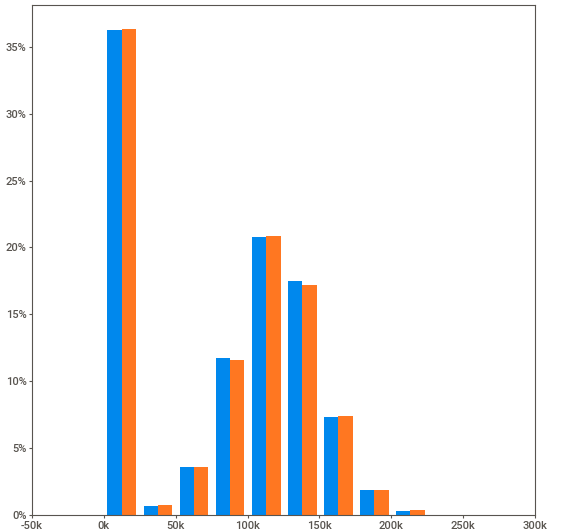
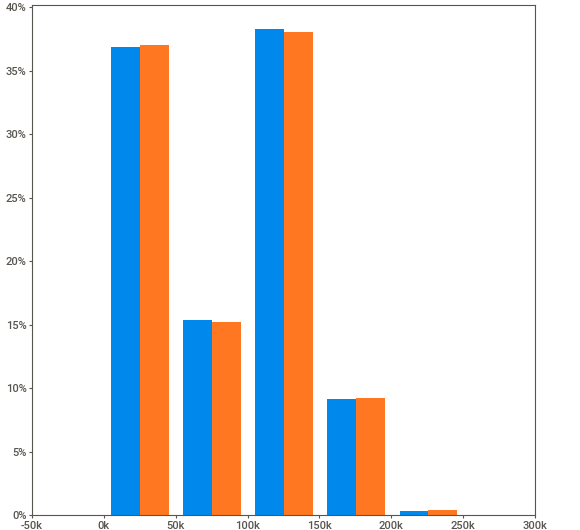
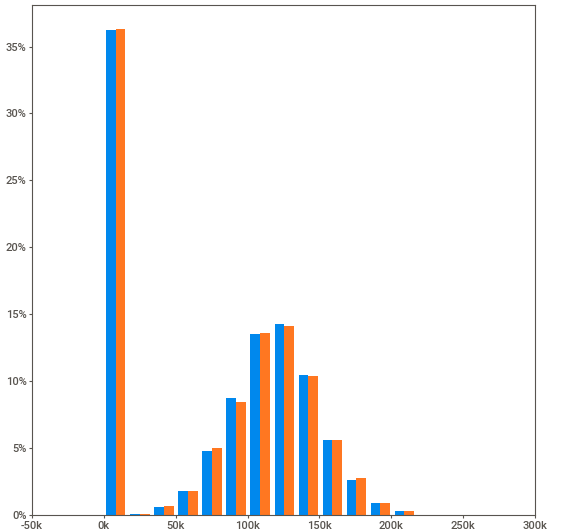
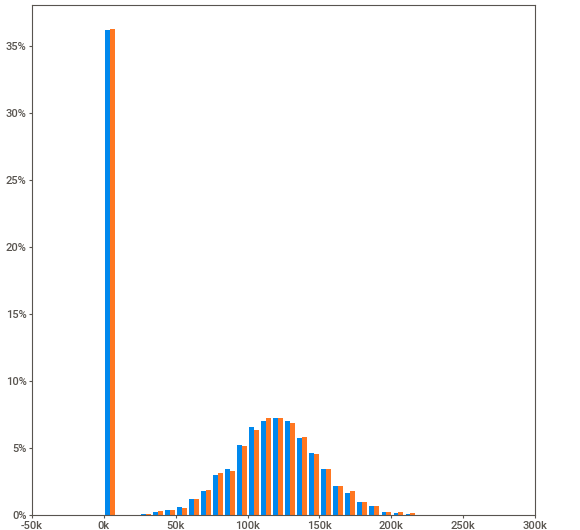
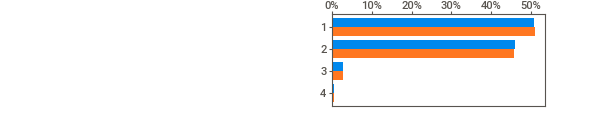
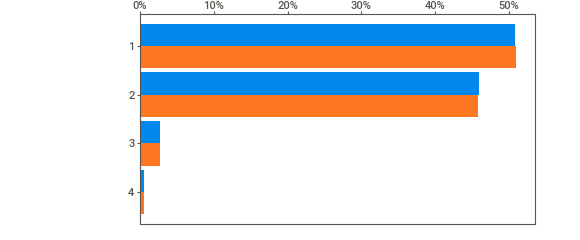
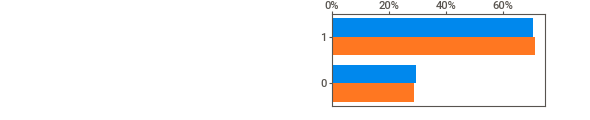
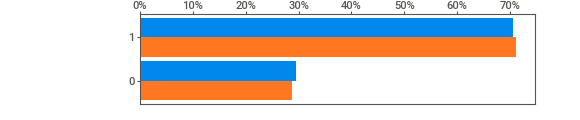
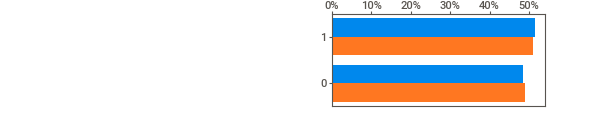
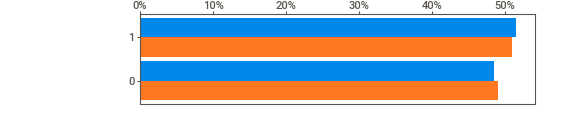
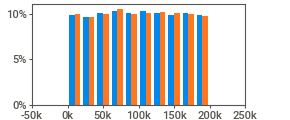
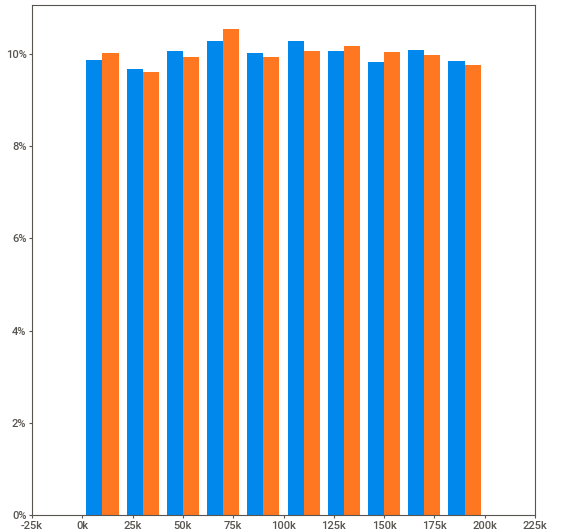
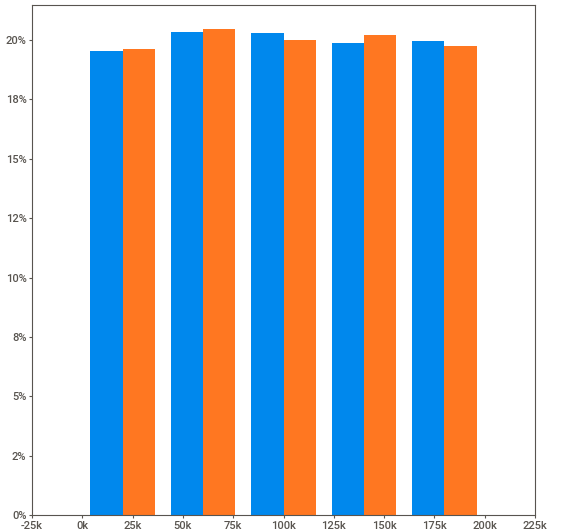
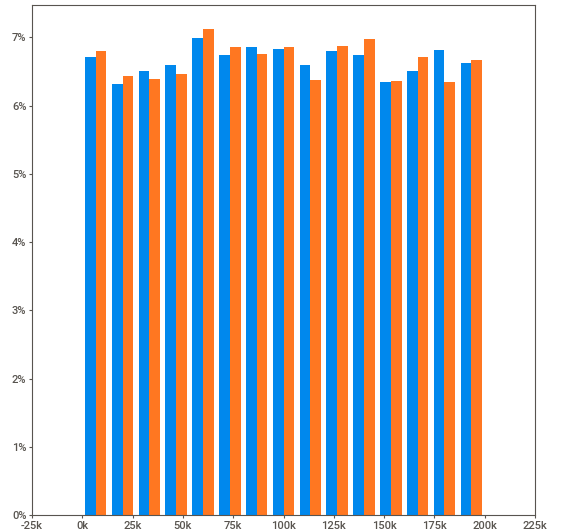
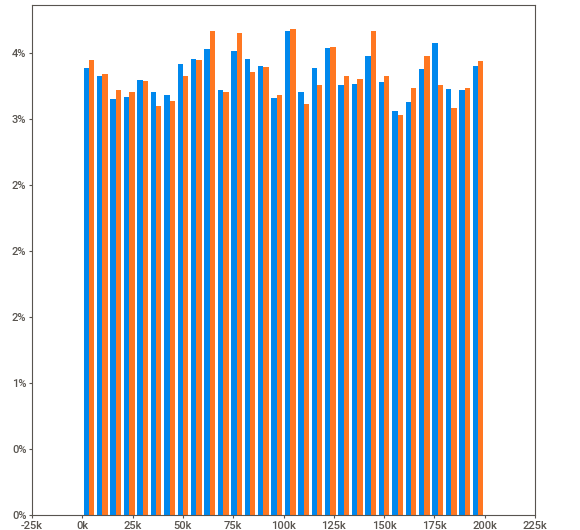
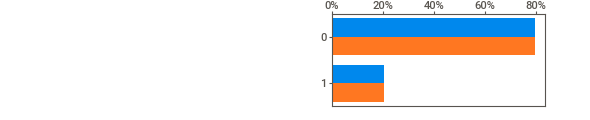
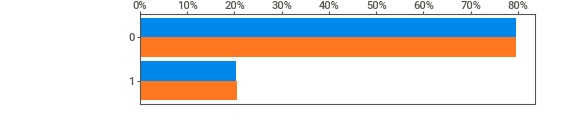
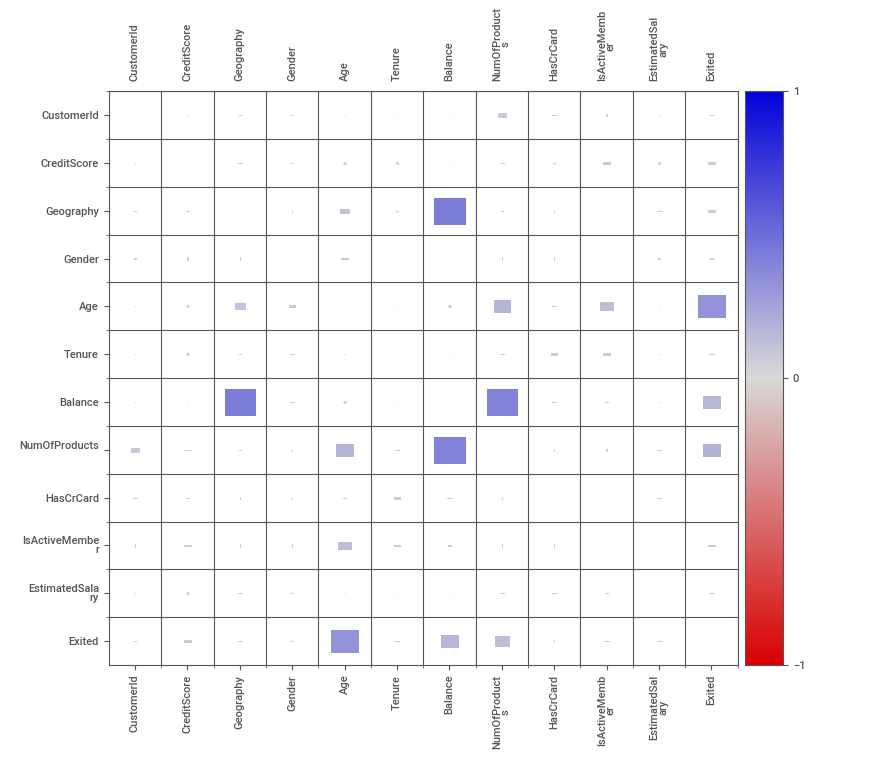
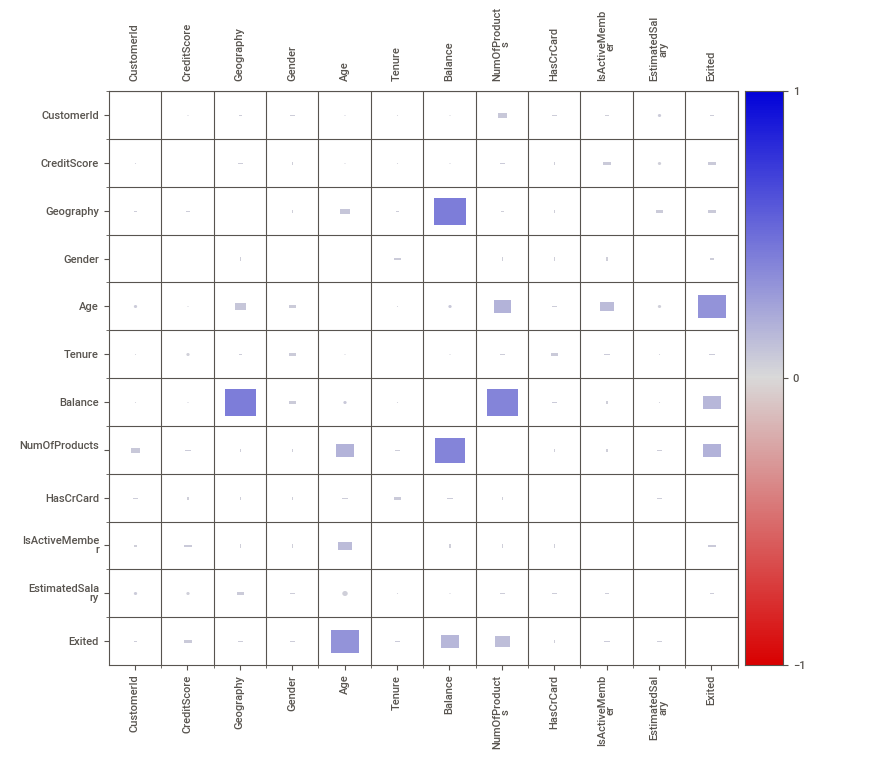

In [18]:
data_removido = data_NA.dropna()
report = sv.compare([data,"Original"],[data_removido,"Removido"])
report.show_notebook()

# 5.2 Utilizando fillna para reemplazar los datos faltantes con un valor

En este caso la mediana

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



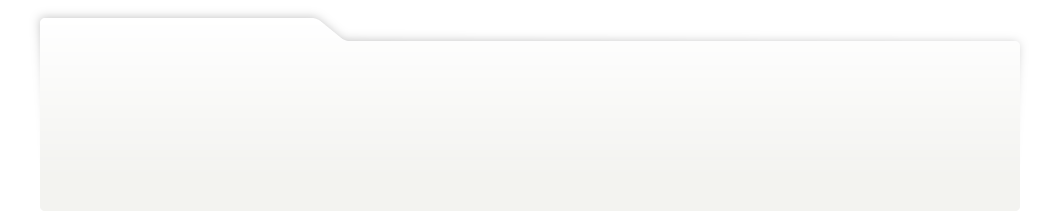
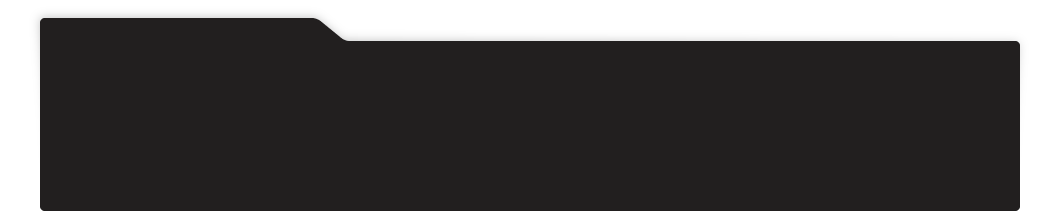
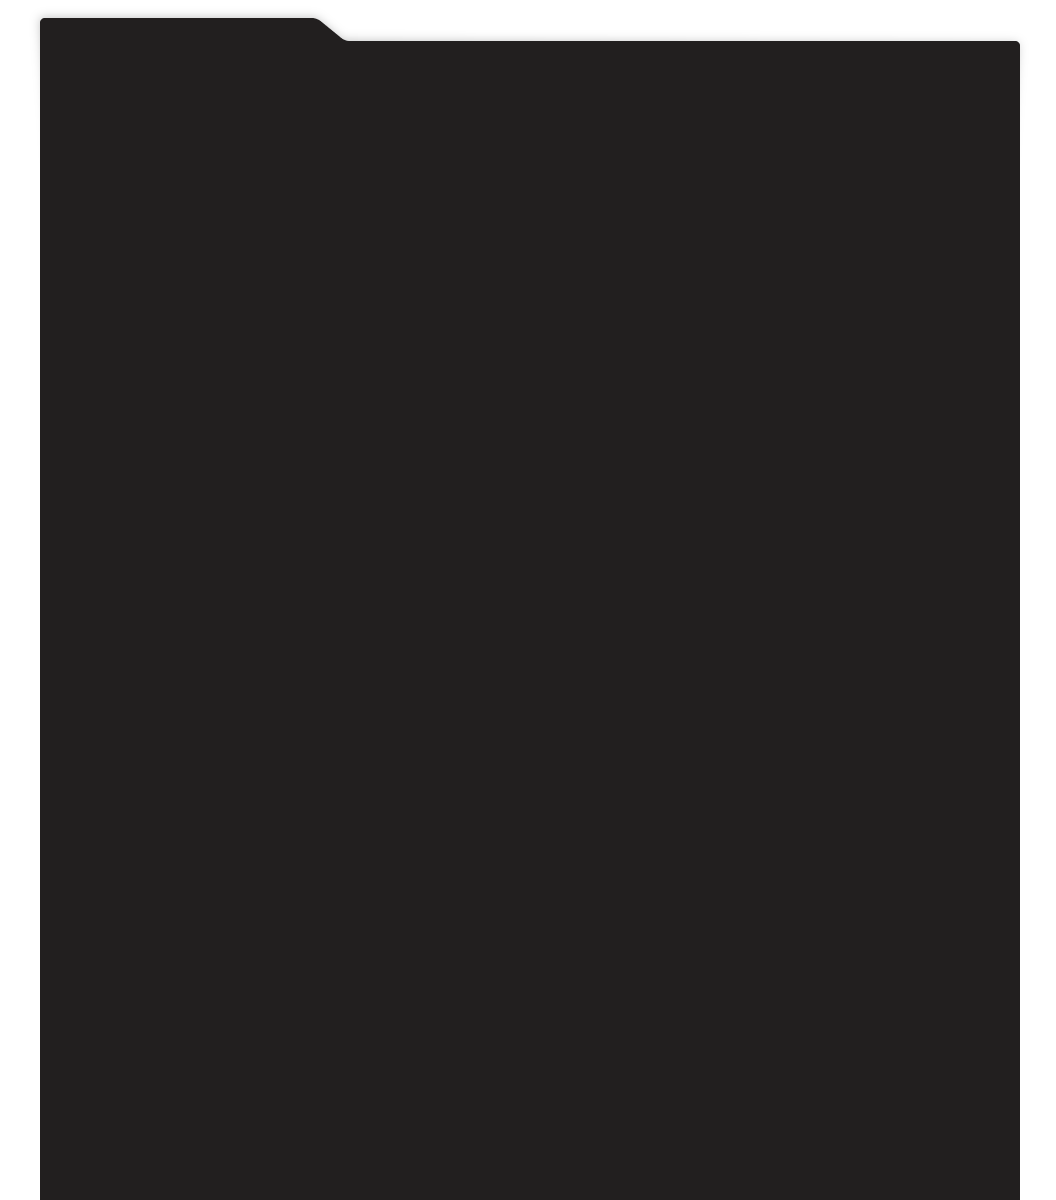
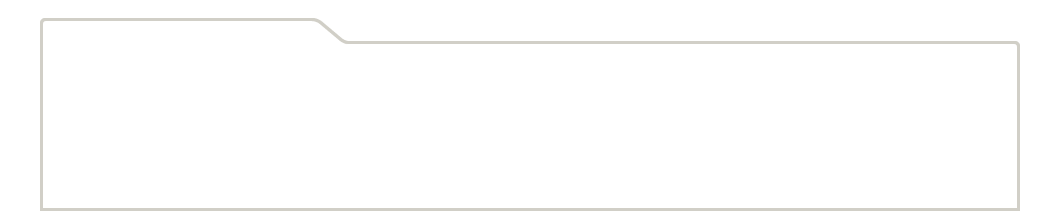
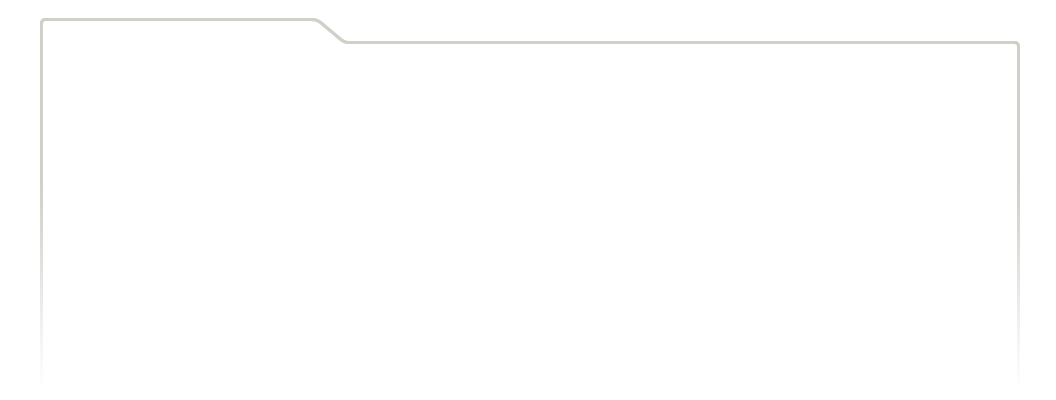
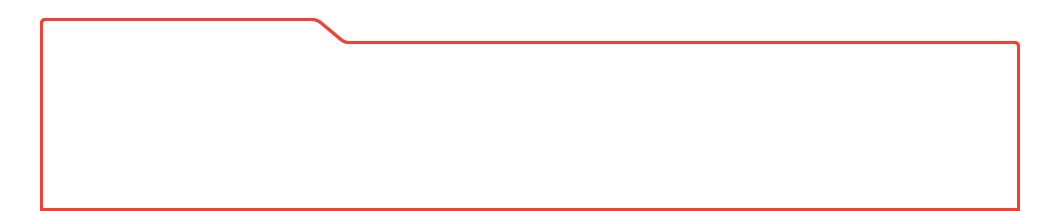
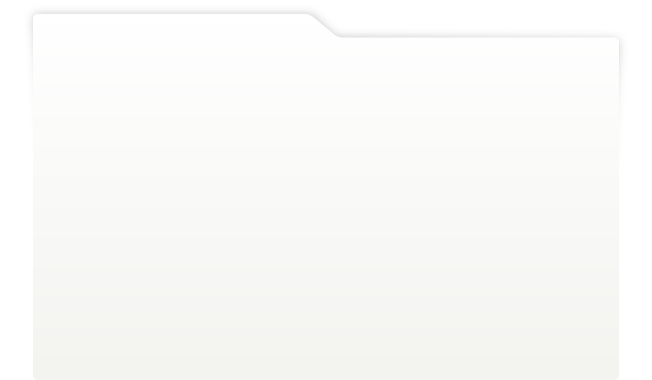
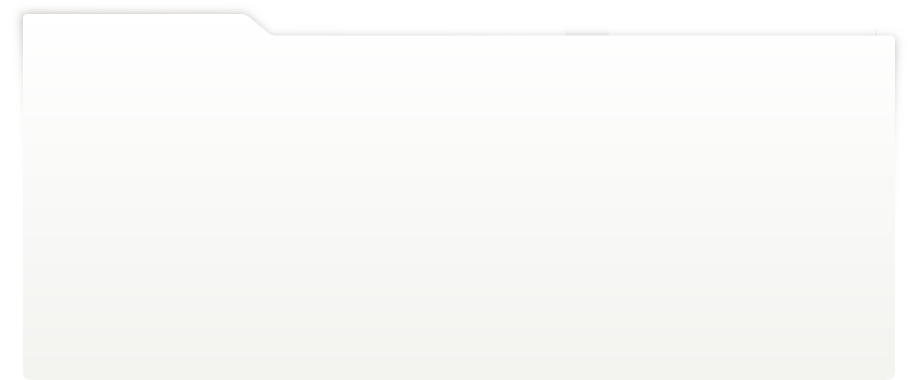
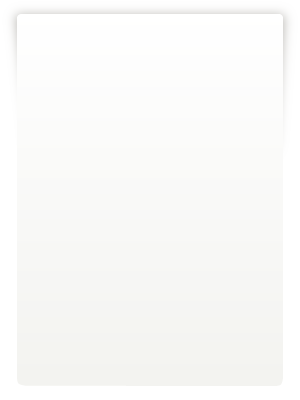
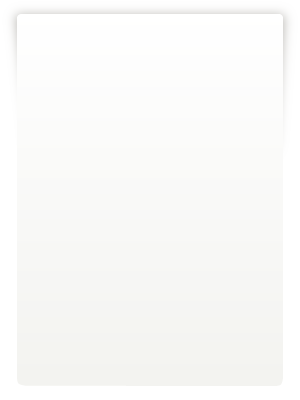
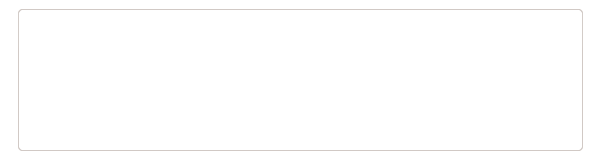
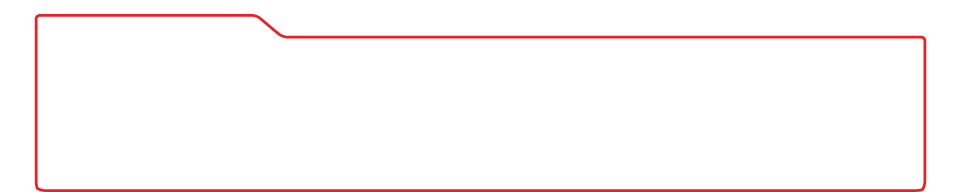
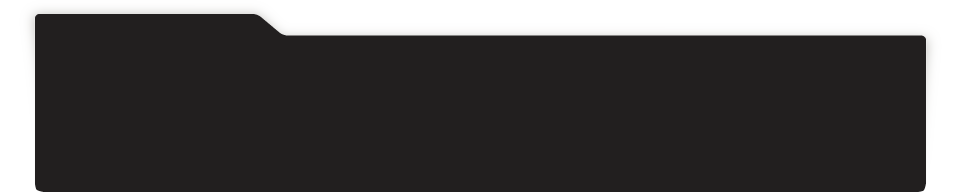
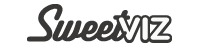
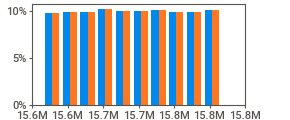
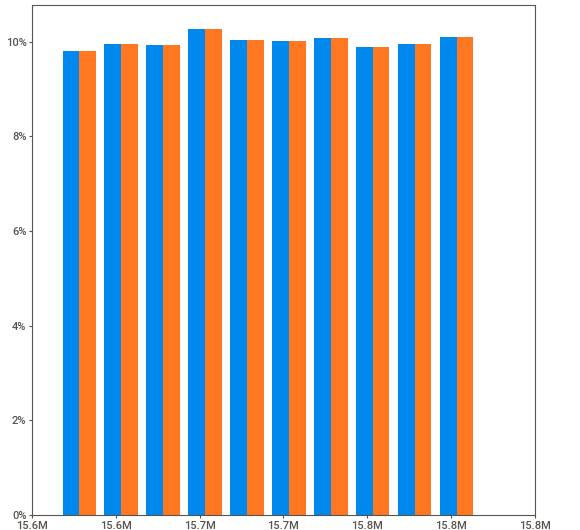
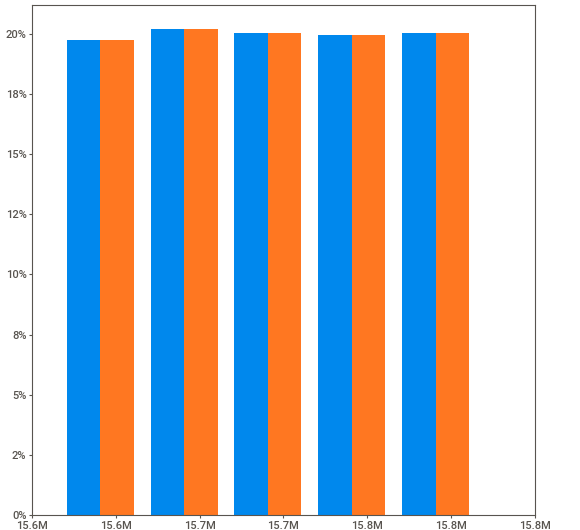
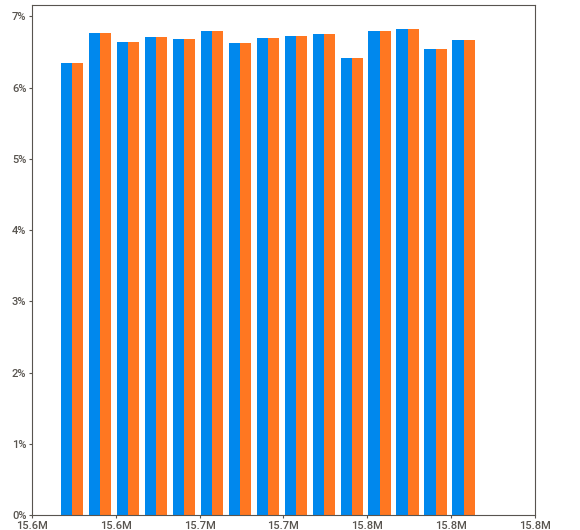
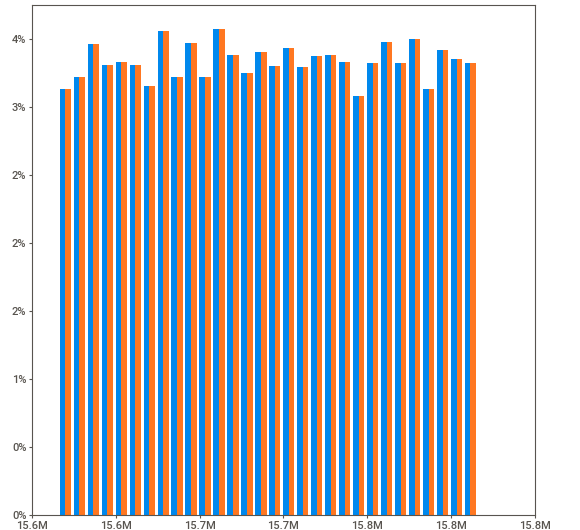
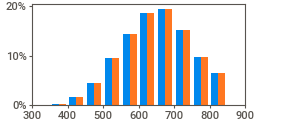
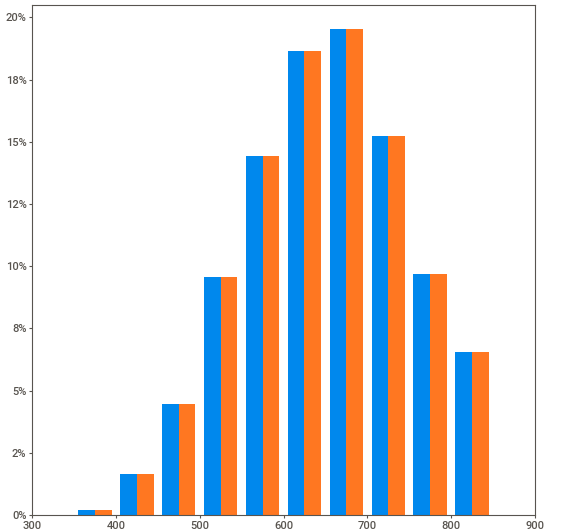
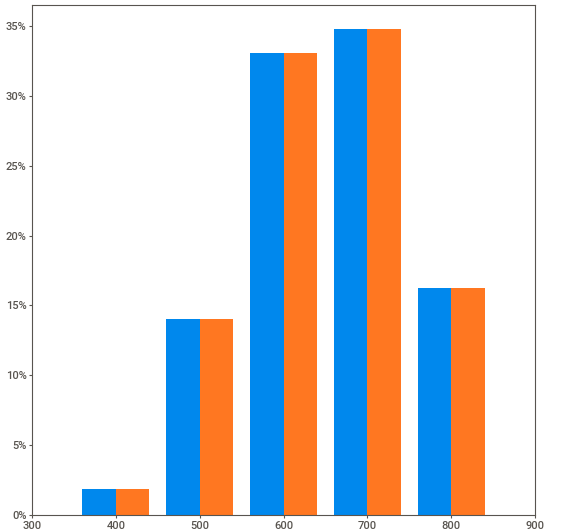
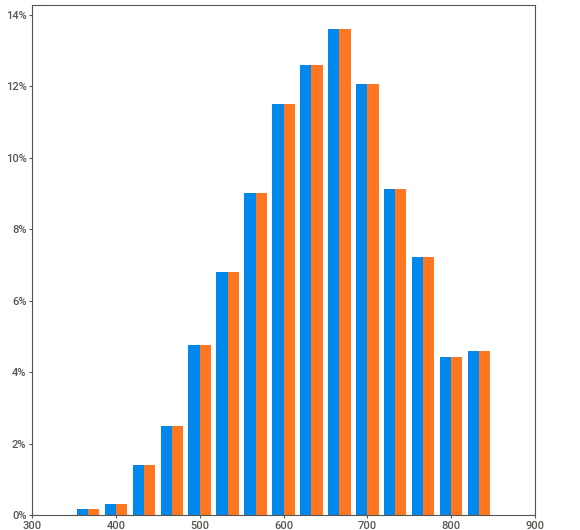
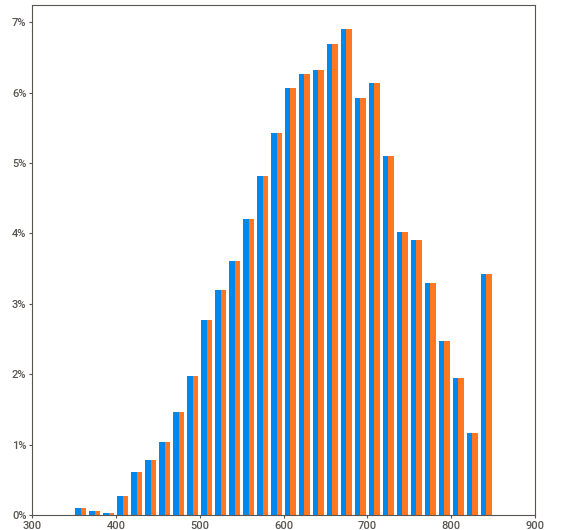
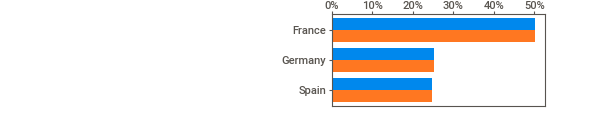
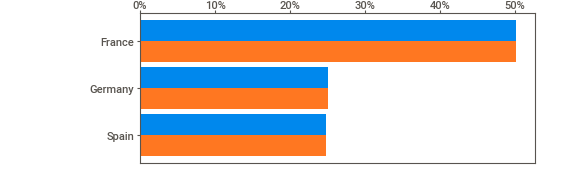
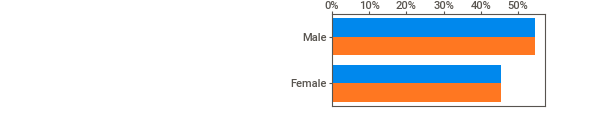
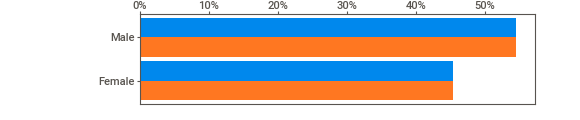
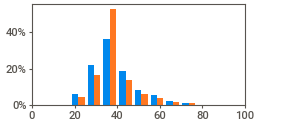
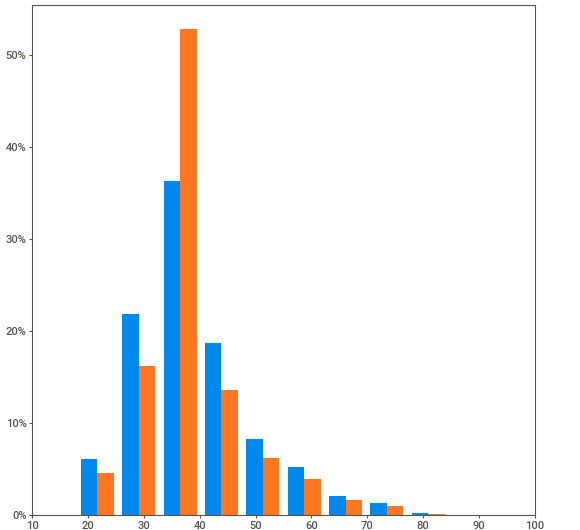
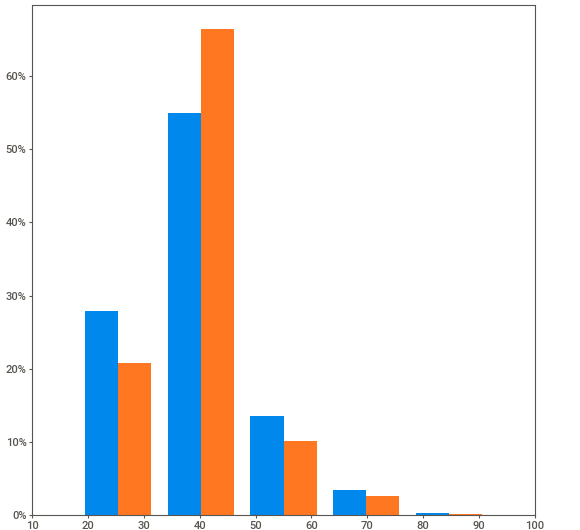
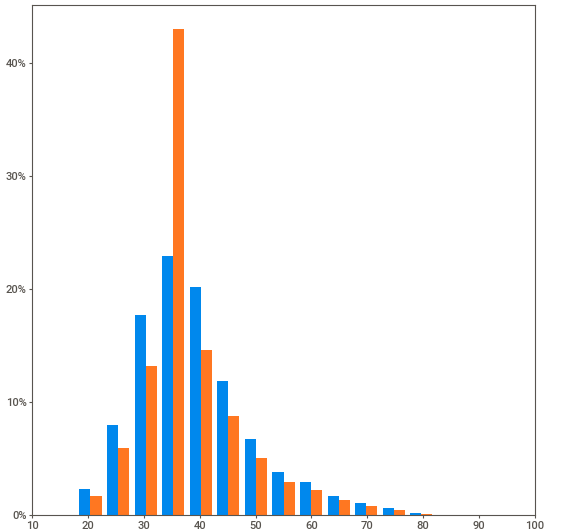
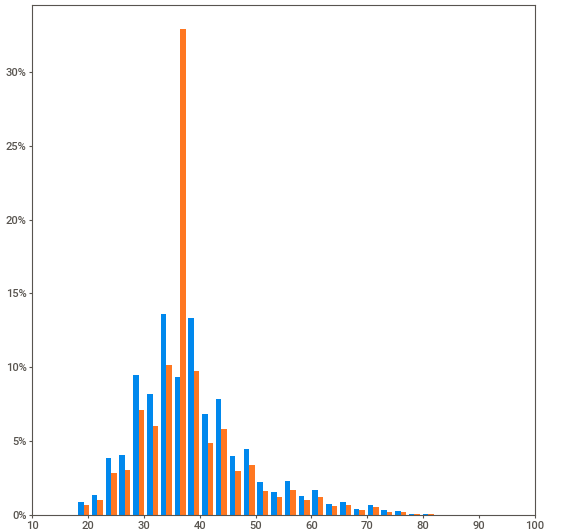
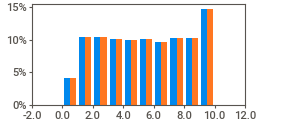
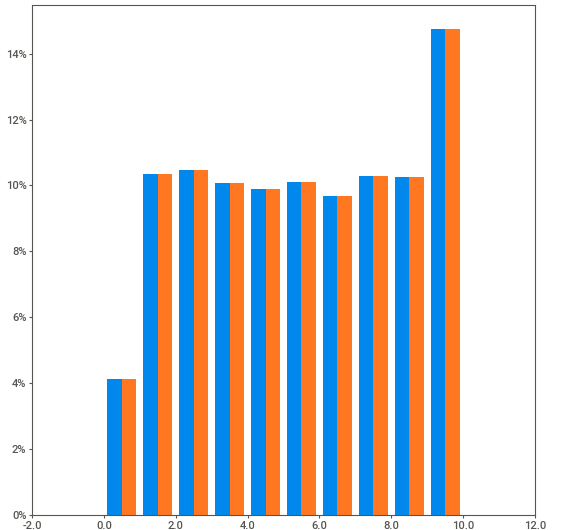
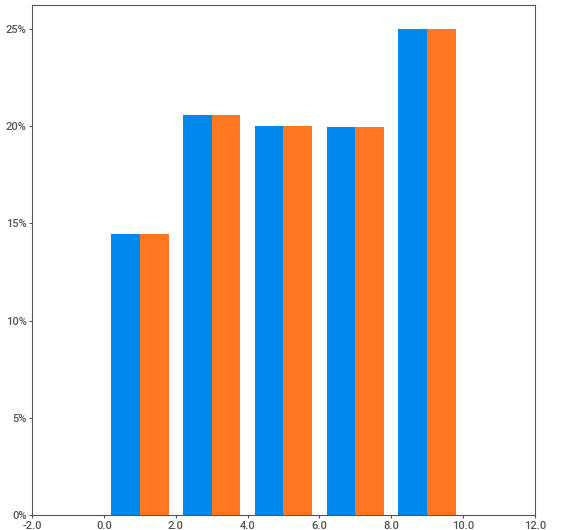
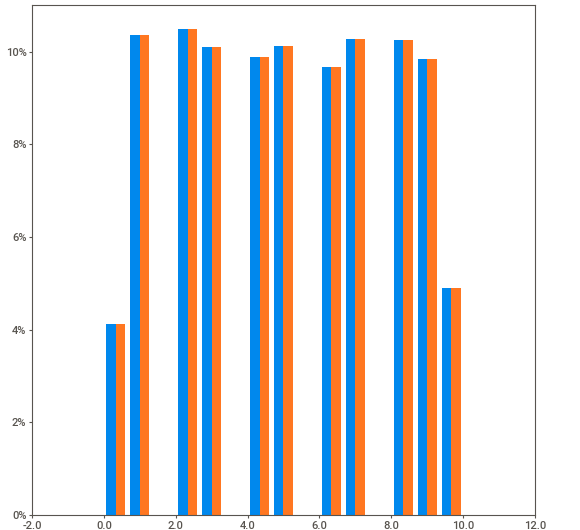
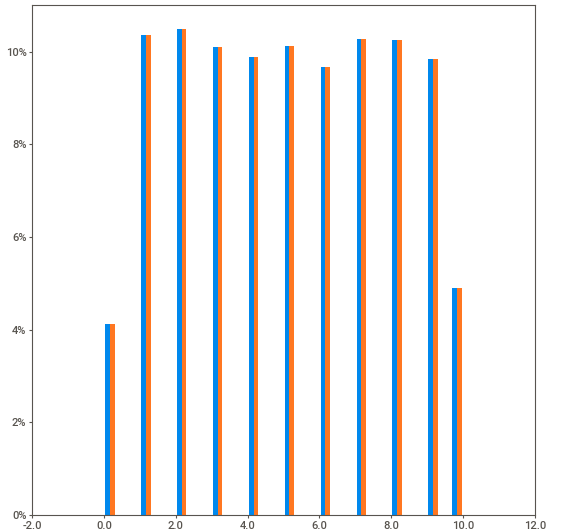
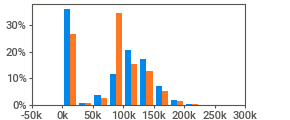
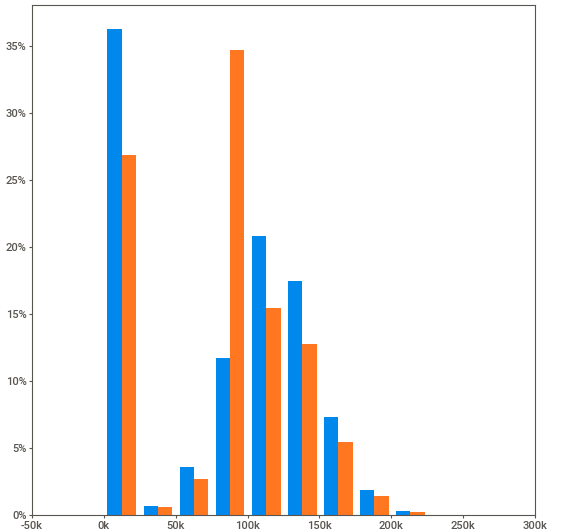
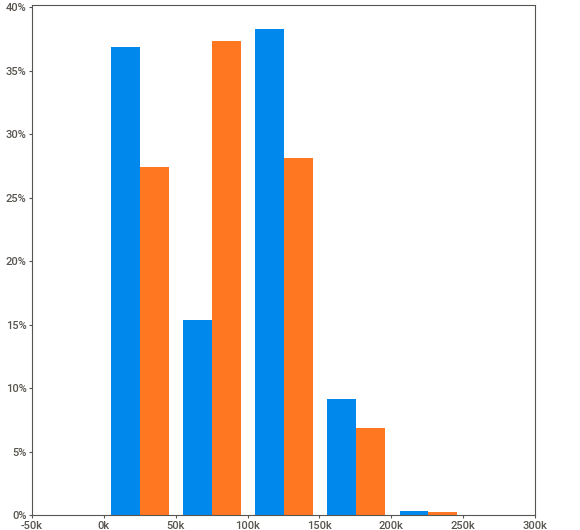
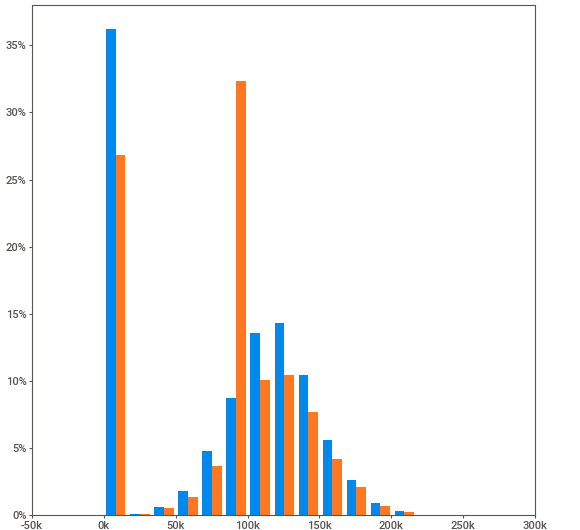
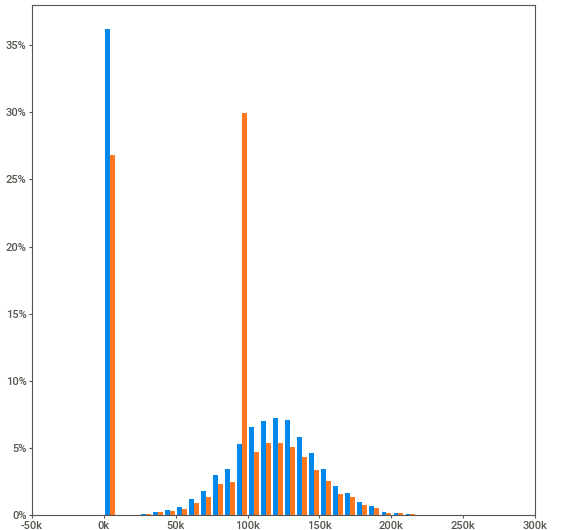
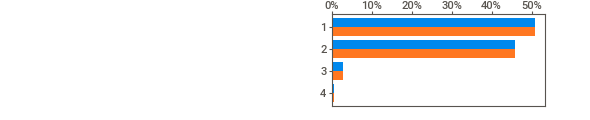
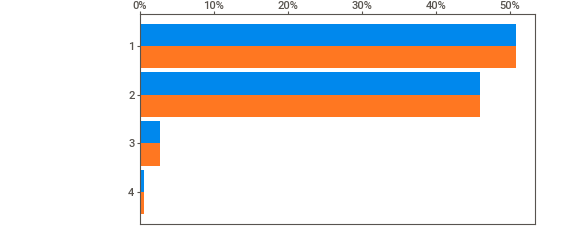
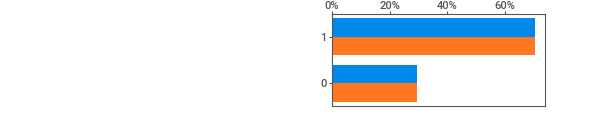
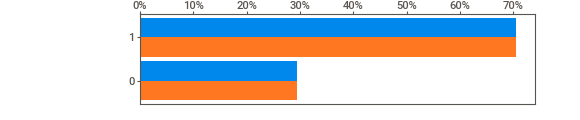
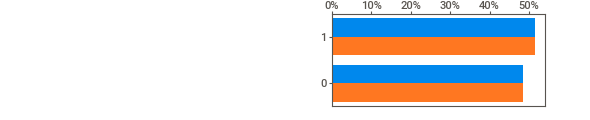
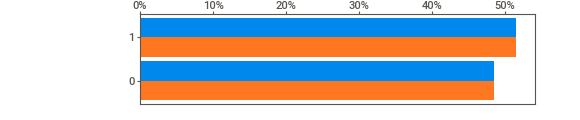
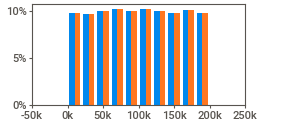
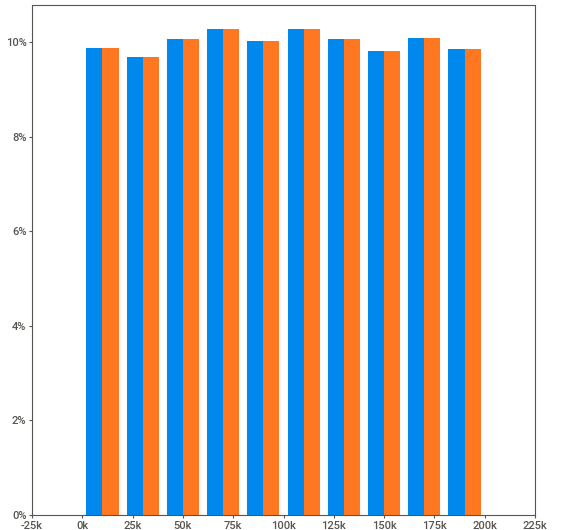
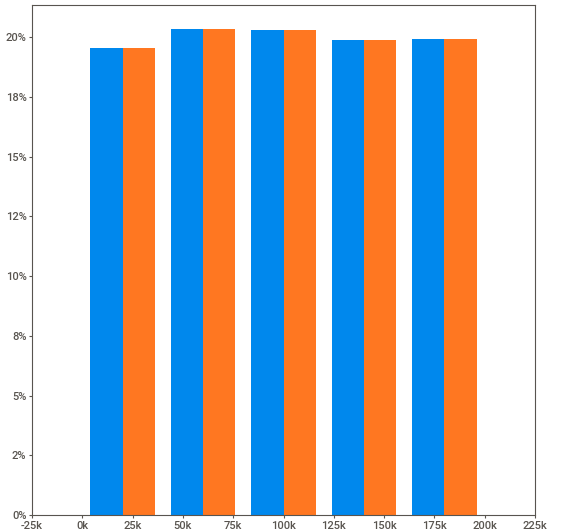
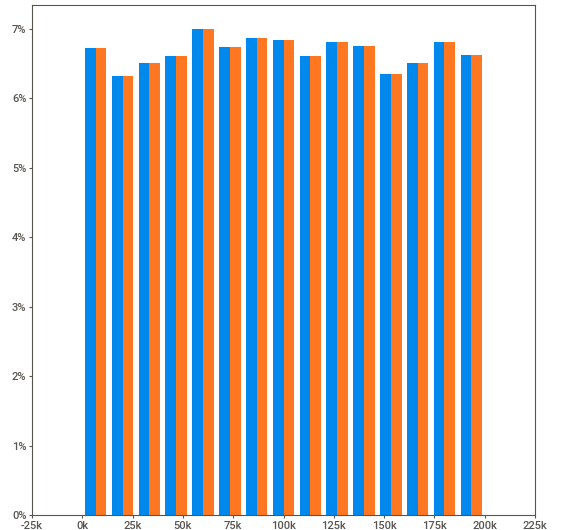
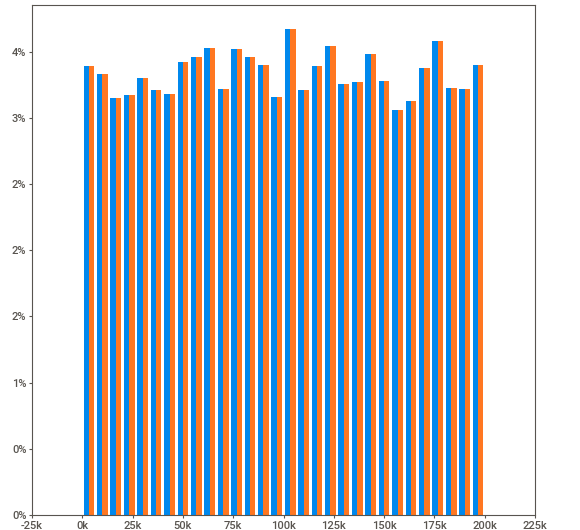
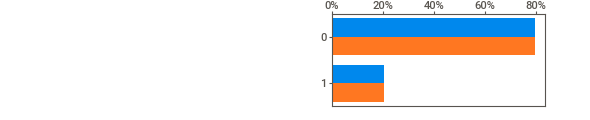
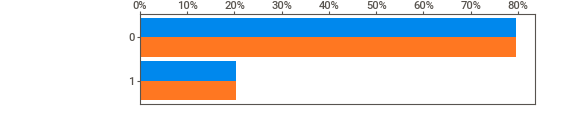
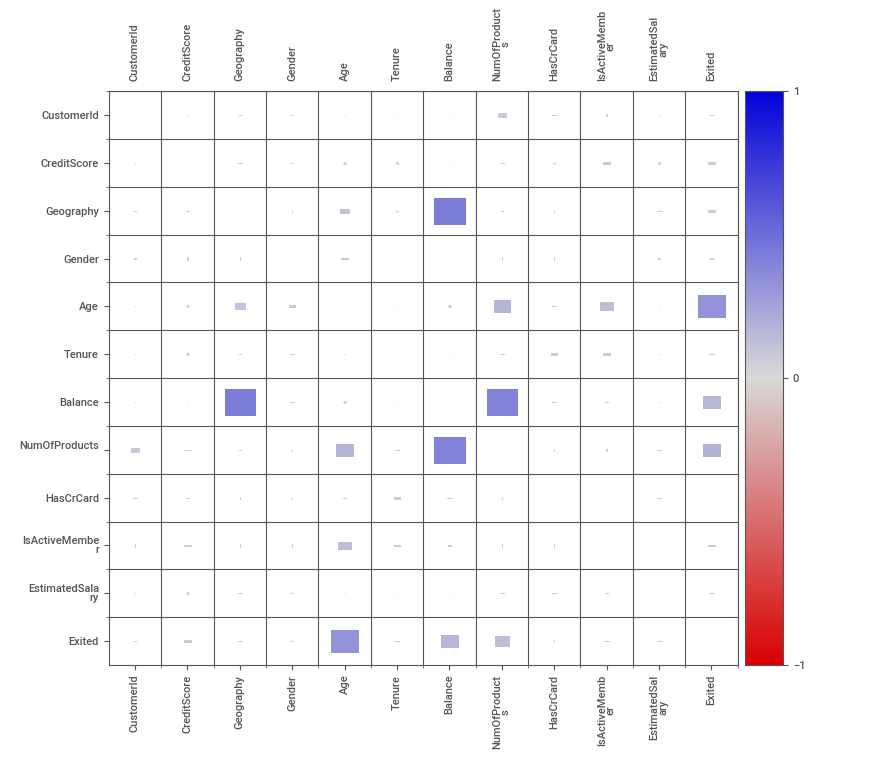
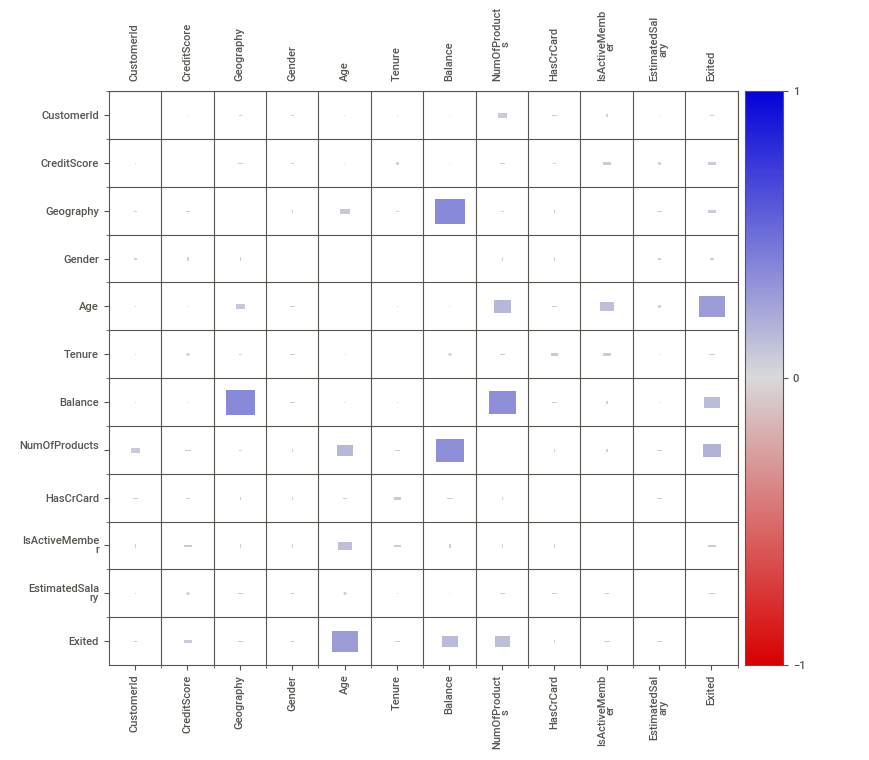

In [19]:
data_input = data_NA.fillna(data_NA.median())
report = sv.compare([data,"Original"],[data_input,"Inputado"])
report.show_notebook() 